In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/samiazirar/Sustainability_Analytics/Sustainability_Analytics/Sami/Close_ESG_Combined/All_Companies.csv', index_col=0)

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3388094427.py:1: DtypeWarning: Columns (35,133,139,223,265,290,311,332,373,608,654,680,780,952,959) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/samiazirar/Sustainability_Analytics/Sustainability_Analytics/Sami/Close_ESG_Combined/All_Companies.csv', index_col=0)


In [3]:
df_esg_only = df[["ESG Score", "Close", "Company", "Date"]]

In [4]:
df_esg_only.shape

(4649, 4)

In [5]:
df_esg_only.dropna(inplace=True,subset=["ESG Score", "Close"])

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/4135448713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esg_only.dropna(inplace=True,subset=["ESG Score", "Close"])


In [6]:
df_esg_only.shape

(3531, 4)

In [7]:
#sort by date and by company    
df_esg_only.sort_values(by=["Company", "Date"], inplace=True)

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1764070060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esg_only.sort_values(by=["Company", "Date"], inplace=True)


In [8]:
#calculate the pct change for each company and add it to the dataframe  
df_esg_only["Pct_Change"] = df_esg_only.groupby("Company")["Close"].pct_change()


/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2398625991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esg_only["Pct_Change"] = df_esg_only.groupby("Company")["Close"].pct_change()


In [9]:
#remove companie that have a pct change of more that 10 times the standard deviation 
df_esg_only_filtered = df_esg_only.groupby("Company").filter(lambda x: x["Pct_Change"].max() < x["Pct_Change"].std()*3)

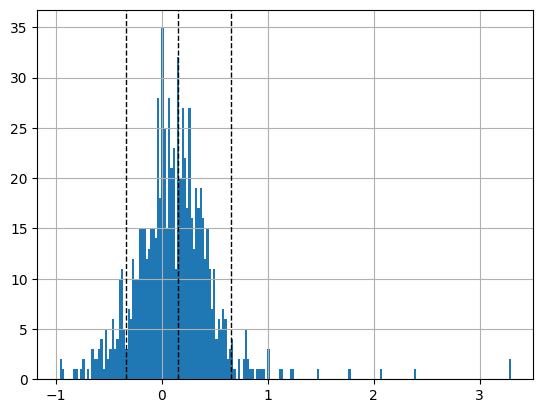

In [10]:
import matplotlib.pyplot as plt

#show only the companies between the mean and 2 standard deviations
df_esg_only_filtered.groupby("Company").filter(lambda x: x["Pct_Change"].max() < x["Pct_Change"].std()*2)["Pct_Change"].hist(bins=200)
#show the mean and standard deviation in the plot
plt.axvline(df_esg_only_filtered["Pct_Change"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_esg_only_filtered["Pct_Change"].mean() + df_esg_only_filtered["Pct_Change"].std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_esg_only_filtered["Pct_Change"].mean() - df_esg_only_filtered["Pct_Change"].std(), color='k', linestyle='dashed', linewidth=1)
plt.show()




Man erkennt hier klar das die Clsins leicht schräg relativ normalverteilt um den mittelwert sind

<AxesSubplot: >

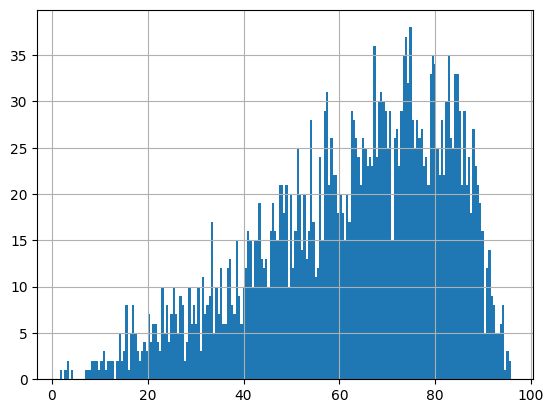

In [11]:
df_esg_only_filtered["ESG Score"].hist(bins=200)

In [12]:
#calculate correlation between ESG score and pct change
df_esg_only_filtered.dropna(inplace=True,subset=["ESG Score", "Pct_Change"])
df_esg_only_filtered["Close"].corr(df_esg_only_filtered["ESG Score"])


-0.0898924595451979

In [13]:
df_esg_only_filtered["Close"].iloc[0]**3

5029.572754416636

In [14]:
!pip install yesg


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


Ok this does not seem to correlate well...

In [15]:
#lets try it with a ESG Data from yahoo
import yesg
dax_tickers = [
    "ADS.DE",
    "ALV.DE",
    "BAS.DE",
    "BAYN.DE",
    "BEI.DE",
    "BMW.DE",
    "CON.DE",
    "DAI.DE",
    "DB1.DE",
    "DBK.DE",
    "DPW.DE",
    "DTE.DE",
    "EOAN.DE",
    "FME.DE",
    "FRE.DE",
    "HEI.DE",
    "HEN3.DE",
    "IFX.DE",
    "LHA.DE",
    "LIN.DE",
    "MRK.DE",
    "MUV2.DE",
    "RWE.DE",
    "SAP.DE",
    "SIE.DE",
    "VOW3.DE",
    "WDI.DE"
]
us_tickers = [
    "AAPL", # Apple Inc.
    "AMZN", # Amazon.com, Inc.
    "GOOG", # Alphabet Inc. (Google)
    "MSFT", # Microsoft Corporation
    "FB", # Facebook, Inc.
    "BRK.A", # Berkshire Hathaway Inc.
    "JNJ", # Johnson & Johnson
    "V", # Visa Inc.
    "PG", # Procter & Gamble Co.
    "JPM", # JPMorgan Chase & Co.
    "XOM", # Exxon Mobil Corporation
    "BA", # Boeing Company
    "WMT", # Walmart Inc.
    "KO", # The Coca-Cola Company
    "DIS", # The Walt Disney Company
    "T", # AT&T Inc.
    "VZ", # Verizon Communications Inc.
    "PFE", # Pfizer Inc.
    "HD", # The Home Depot, Inc.
    "INTC", # Intel Corporation
    "CSCO", # Cisco Systems, Inc.
    "UNH", # UnitedHealth Group Inc.
    "MRK", # Merck & Co., Inc.
]


In [16]:
#now append the close price to the ESG Score
import yfinance as yf

In [17]:
def get_data(list_ticker):
    """Gets the data from yahoo finance and returns a dataframe with the ESG Score and the Adj Close Price"""
    df_big = pd.DataFrame(columns=["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"])
    for ticker_name in tqdm(list_ticker):
        df=None
        df = yesg.get_historic_esg(ticker_name)
        if df is None:
            continue
        df["Date"] = pd.to_datetime(df.index)
        #before 01 Novemeber 2019 the ESG Score was calculated differently, a low ESG Score was good, a high ESG Score was bad, so for the companies before that date we need to invert the ESG Score (100 - ESG Score)
        #df.loc[df["Date"] < "2019-12-01", "Total-Score"] = 100 - df.loc[df["Date"] < "2019-12-01", "Total-Score"]   
        #df.loc[df["Date"] < "2019-12-01", "E-Score"] = 100 - df.loc[df["Date"] < "2019-12-01", "E-Score"]
        #df.loc[df["Date"] < "2019-12-01", "S-Score"] = 100 - df.loc[df["Date"] < "2019-12-01", "S-Score"]
        #df.loc[df["Date"] < "2019-12-01", "G-Score"] = 100 - df.loc[df["Date"] < "2019-12-01", "G-Score"]
        start_date = df["Date"].min()
        end_date = df["Date"].max()
        df_close = yf.download(ticker_name, start=start_date, end=end_date, progress=False,show_errors=False)
        df["Adj Close"] = df_close["Adj Close"]
        #remove all rows where the ESG Score is NaN or the Adj Close is NaN
        df.dropna(inplace=True, subset=["Total-Score", "Adj Close"])
        df["Company"] = ticker_name
        df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
    return df_big

In [18]:
from tqdm import tqdm
df_dax_esg = get_data(dax_tickers)

  0%|          | 0/27 [00:00<?, ?it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
  4%|▎         | 1/27 [00:00<00:23,  1.10it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
  7%|▋         | 2/27 [00:01<00:16,  1.51it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big 

In [19]:
#fit a logistic regression model to the ESG Score over the time 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report   
from sklearn.metrics import roc_auc_score

df_dax_esg["Total-Score"].unique()

array([77.  , 76.  , 75.56, 76.54, 75.69, 78.47, 79.97, 79.12, 78.12,
       78.37, 79.92, 78.89, 76.76, 76.06, 75.96, 75.22, 74.81, 73.61,
       73.57, 73.74, 13.88, 13.42, 85.  , 84.  , 87.39, 86.34, 87.04,
       83.85, 85.37, 82.93, 83.32, 83.22, 83.14, 17.03, 16.22, 15.9 ,
       14.77, 15.93, 15.92, 75.  , 74.  , 73.  , 71.  , 73.4 , 73.21,
       72.68, 71.18, 72.02, 71.23, 71.41, 70.5 , 70.96, 71.96, 71.86,
       73.62, 74.17, 71.98, 73.13, 29.66, 28.47, 28.58, 25.76, 25.59,
       75.72, 75.89, 74.75, 74.27, 75.49, 75.62, 66.37, 68.75, 67.92,
       66.29, 66.23, 66.5 , 65.21, 38.2 , 34.39, 28.62, 29.06, 66.  ,
       65.  , 64.  , 67.  , 67.22, 66.17, 69.45, 69.72, 77.42, 77.99,
       73.89, 73.76, 73.69, 73.24, 23.41, 24.13, 24.06, 28.97, 82.  ,
       81.  , 80.  , 78.  , 78.38, 77.6 , 77.05, 75.2 , 75.58, 73.79,
       73.44, 72.55, 72.52, 72.42, 72.25, 72.33, 74.99, 27.21, 27.46,
       27.12, 23.38, 23.84, 76.3 , 74.34, 73.06, 72.66, 72.06, 73.68,
       74.08, 74.01,

In [20]:
#remove rows, where the ESG Score unchanged
df_dax_esg = df_dax_esg[df_dax_esg["Total-Score"].shift(1) != df_dax_esg["Total-Score"]]

In [21]:
df_dax_esg.dropna(inplace=True, subset=["Total-Score", "Adj Close"])

In [22]:
#get correlation between ESG Score and Adj Close Price
df_2020_plus = df_dax_esg[df_dax_esg["Date"] > "2020-01-01"]
df_2019_minus = df_dax_esg[df_dax_esg["Date"] < "2019-10-01"]

In [23]:
#correlation between ESG Score and Adj Close Price for both periods
df_2020_plus["Adj Close"].corr(df_2020_plus["Total-Score"])
#Ok after the corona crash the correlation is strongly negative, wich means that the ESG Score is a good indicator for the stock price
#a very very good indicator because a low ESG means a high stock price and a high ESG means a low stock price (los ESG == good stock price)

-0.32016320096156475

In [24]:
df_2019_minus["Adj Close"].corr(df_2019_minus["Total-Score"])

0.26958688978716977

In [25]:
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_2020_plus["Adj Close"],df_2020_plus["Total-Score"])

print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

Spearman's rank correlation coefficient:  -0.3326243406612011
p-value:  0.0003393238257042423


In [26]:
df_us_esg = get_data(us_tickers)

  0%|          | 0/23 [00:00<?, ?it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
  4%|▍         | 1/23 [00:00<00:14,  1.54it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
 13%|█▎        | 3/23 [00:01<00:07,  2.74it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
 17%|█▋        | 4/23 [00:01<00:08,  2.23it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
 26%|██▌       | 6/23 [00:02<00:05,  3.06it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
 30%|███       | 7/23 [00:02<00:06,  2.56it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-Score","S-Score","G-Score", "Adj Close", "Date", "Company"]])
 35%|███▍      | 8/23 [00:03<00:06,  2.42it/s]/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/3550015080.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df[["Total-Score","E-S

In [27]:
#remove rows, where the ESG Score unchanged
df_dax_us = df_us_esg[df_us_esg["Total-Score"].shift(1) != df_us_esg["Total-Score"]]

In [28]:
#get correlation between ESG Score and Adj Close Price
df_us_2020_plus = df_us_esg[df_us_esg["Date"] > "2020-01-01"]
df_us_2019_minus = df_us_esg[df_us_esg["Date"] < "2019-10-01"]

In [29]:
#correlation between ESG Score and Adj Close Price for both periods
df_us_2020_plus["Adj Close"].corr(df_us_2020_plus["Total-Score"])

-0.15797615419050184

In [30]:
df_us_2019_minus["Adj Close"].corr(df_us_2019_minus["Total-Score"])

-0.30986639115823683

In [31]:
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["Total-Score"])

print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

Spearman's rank correlation coefficient:  -0.12644117269002142
p-value:  0.16878268935000884


both correlations seem highly significant and strong, so may it is worth it to take a look after 2020

In [32]:
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["E-Score"])

print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

Spearman's rank correlation coefficient:  -0.32164640367822805
p-value:  0.00034063287123593886


The Enviroment Score seems to be anticorrelating, wich means not a good indicator

In [33]:
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["G-Score"])

print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

Spearman's rank correlation coefficient:  -0.11758434372058041
p-value:  0.20088586183337048


In [34]:
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["S-Score"])

print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

Spearman's rank correlation coefficient:  0.07205933866225538
p-value:  0.4341406909214599


Now lets take a look at the pre pandemic data

In [35]:
# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_us_2019_minus["Adj Close"],df_us_2019_minus["Total-Score"])
print("Pre Pandemic Total Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

rho, p = spearmanr(df_us_2019_minus["Adj Close"],df_us_2019_minus["E-Score"])
print("Pre Pandemic E Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

rho, p = spearmanr(df_us_2019_minus["Adj Close"],df_us_2019_minus["G-Score"])
print("Pre Pandemic G Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

rho, p = spearmanr(df_us_2019_minus["Adj Close"],df_us_2019_minus["S-Score"])
print("Pre Pandemic S Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

print("Shape Pre Pandemic US: ", df_us_2019_minus.shape)

Pre Pandemic Total Score US
Spearman's rank correlation coefficient:  -0.2675386760938615
p-value:  2.9863542076596063e-14
Pre Pandemic E Score US
Spearman's rank correlation coefficient:  -0.15901259460463812
p-value:  8.10925495898077e-06
Pre Pandemic G Score US
Spearman's rank correlation coefficient:  -0.09225693476371015
p-value:  0.009938449265629997
Pre Pandemic S Score US
Spearman's rank correlation coefficient:  -0.2893461360938993
p-value:  1.6510220137798613e-16
Shape Pre Pandemic US:  (780, 7)


In [36]:
# Calculate the Spearman rank correlation coefficient and p-value
rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["Total-Score"])
print("Post Pandemic Total Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["E-Score"])
print("Post Pandemic E Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["G-Score"])
print("PostPost Pandemic G Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

rho, p = spearmanr(df_us_2020_plus["Adj Close"],df_us_2020_plus["S-Score"])
print("Post Pandemic S Score US")
print("Spearman's rank correlation coefficient: ", rho)
print("p-value: ", p)

print("Shape Post Pandemic US: ", df_us_2020_plus.shape)
#number of NaN values in the ESG Score
print("Number of NaN values in the ESG Score: ", df_us_2020_plus["Total-Score"].isna().sum())
print("Number of NaN values in the E Score: ", df_us_2020_plus["E-Score"].isna().sum())
print("Number of NaN values in the G Score: ", df_us_2020_plus["G-Score"].isna().sum())
print("Number of NaN values in the S Score: ", df_us_2020_plus["S-Score"].isna().sum()) 

Post Pandemic Total Score US
Spearman's rank correlation coefficient:  -0.12644117269002142
p-value:  0.16878268935000884
Post Pandemic E Score US
Spearman's rank correlation coefficient:  -0.32164640367822805
p-value:  0.00034063287123593886
PostPost Pandemic G Score US
Spearman's rank correlation coefficient:  -0.11758434372058041
p-value:  0.20088586183337048
Post Pandemic S Score US
Spearman's rank correlation coefficient:  0.07205933866225538
p-value:  0.4341406909214599
Shape Post Pandemic US:  (120, 7)
Number of NaN values in the ESG Score:  0
Number of NaN values in the E Score:  0
Number of NaN values in the G Score:  0
Number of NaN values in the S Score:  0


Post Pandemic US
                                 OLS Regression Results                                 
Dep. Variable:     df_us_2020_plus['Adj Close']   R-squared:                       0.025
Model:                                      OLS   Adj. R-squared:                  0.017
Method:                           Least Squares   F-statistic:                     3.020
Date:                          Sat, 04 Mar 2023   Prob (F-statistic):             0.0848
Time:                                  14:59:51   Log-Likelihood:                -710.77
No. Observations:                           120   AIC:                             1426.
Df Residuals:                               118   BIC:                             1431.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2371207152.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Adj Close Predicted"] = model.predict(df_us_2020_plus["Total-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2371207152.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/237120715

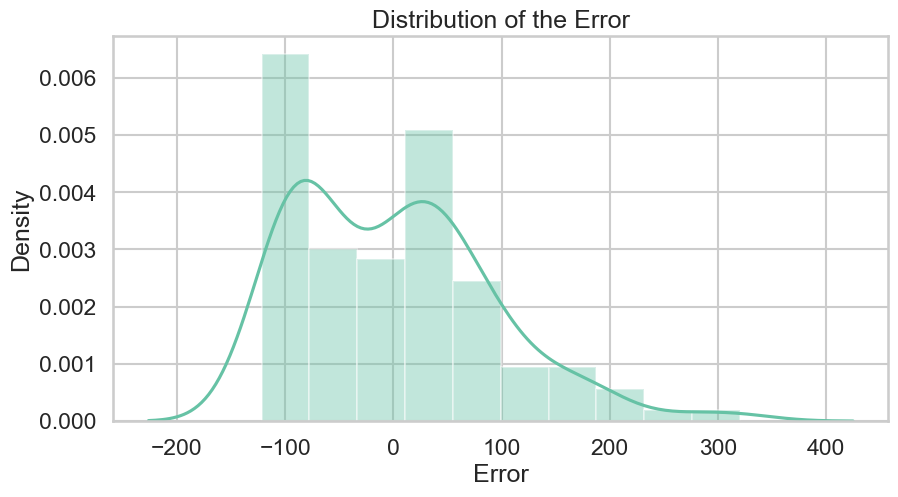

In [37]:
#make a Regression from the ESG Score to the Adj Close Price
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Post Pandemic US")
#make Regression 
model = ols("df_us_2020_plus['Adj Close'] ~ df_us_2020_plus['Total-Score']", data=df_us_2020_plus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_us_2020_plus["Adj Close Predicted"] = model.predict(df_us_2020_plus["Total-Score"])
#calculate Error
df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_us_2020_plus["Error"], bins=10)
plt.title("Distribution of the Error")
plt.show()

Pre Pandemic US
                                  OLS Regression Results                                 
Dep. Variable:     df_us_2019_minus['Adj Close']   R-squared:                       0.096
Model:                                       OLS   Adj. R-squared:                  0.095
Method:                            Least Squares   F-statistic:                     82.64
Date:                           Sat, 04 Mar 2023   Prob (F-statistic):           8.06e-19
Time:                                   14:59:51   Log-Likelihood:                -4242.2
No. Observations:                            780   AIC:                             8488.
Df Residuals:                                778   BIC:                             8498.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                      coef    std err          t      P>|t|      [0.

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1398894509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2019_minus["Adj Close Predicted"] = model.predict(df_us_2019_minus["Total-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1398894509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2019_minus["Error"] = df_us_2019_minus["Adj Close"] - df_us_2019_minus["Adj Close Predicted"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1398

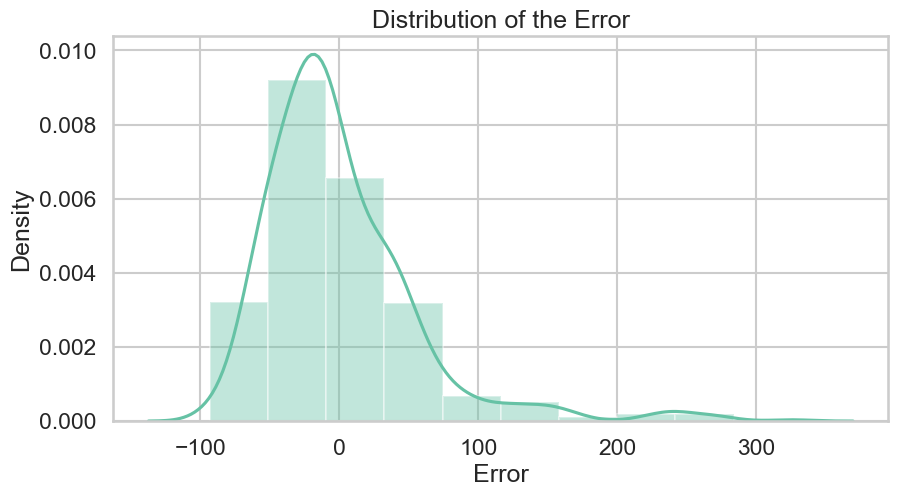

In [38]:
#make a Regression from the ESG Score to the Adj Close Price for the Pre Pandemic Data
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Pre Pandemic US")
#make Regression
model = ols("df_us_2019_minus['Adj Close'] ~ df_us_2019_minus['Total-Score']", data=df_us_2019_minus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_us_2019_minus["Adj Close Predicted"] = model.predict(df_us_2019_minus["Total-Score"])
#calculate Error
df_us_2019_minus["Error"] = df_us_2019_minus["Adj Close"] - df_us_2019_minus["Adj Close Predicted"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_us_2019_minus["Error"], bins=10)
plt.title("Distribution of the Error")
plt.show()



Post Pandemic US E Score
                                 OLS Regression Results                                 
Dep. Variable:     df_us_2020_plus['Adj Close']   R-squared:                       0.061
Model:                                      OLS   Adj. R-squared:                  0.053
Method:                           Least Squares   F-statistic:                     7.723
Date:                          Sat, 04 Mar 2023   Prob (F-statistic):            0.00635
Time:                                  14:59:52   Log-Likelihood:                -708.48
No. Observations:                           120   AIC:                             1421.
Df Residuals:                               118   BIC:                             1427.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025   

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2167360878.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Adj Close Predicted E"] = model.predict(df_us_2020_plus["E-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2167360878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted E"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/21673608

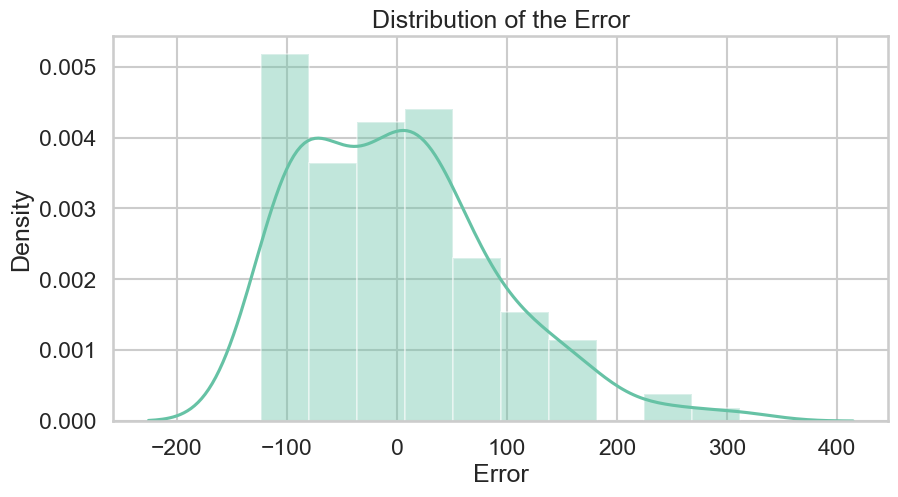

In [39]:
#now the same for the E Score, the G Score and the S Score
#make a Regression from the E Score to the Adj Close Price
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Post Pandemic US E Score")
#make Regression
model = ols("df_us_2020_plus['Adj Close'] ~ df_us_2020_plus['E-Score']", data=df_us_2020_plus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_us_2020_plus["Adj Close Predicted E"] = model.predict(df_us_2020_plus["E-Score"])
#calculate Error
df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted E"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_us_2020_plus["Error"], bins=10) 
plt.title("Distribution of the Error")
plt.show()


Post Pandemic US G Score
                                 OLS Regression Results                                 
Dep. Variable:     df_us_2020_plus['Adj Close']   R-squared:                       0.063
Model:                                      OLS   Adj. R-squared:                  0.055
Method:                           Least Squares   F-statistic:                     7.964
Date:                          Sat, 04 Mar 2023   Prob (F-statistic):            0.00560
Time:                                  14:59:53   Log-Likelihood:                -708.37
No. Observations:                           120   AIC:                             1421.
Df Residuals:                               118   BIC:                             1426.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025   

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/4196519187.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Adj Close Predicted G"] = model.predict(df_us_2020_plus["G-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/4196519187.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted G"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/41965191

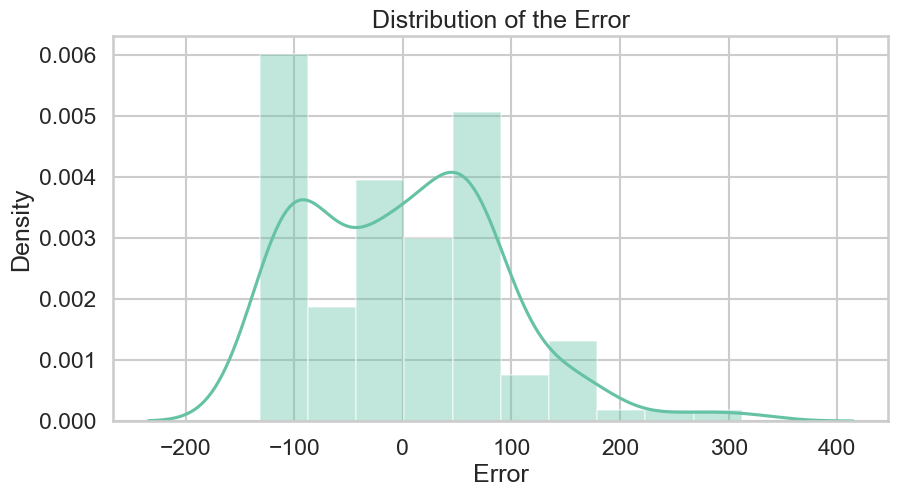

In [40]:
#now the same for the E Score, the G Score and the S Score
#make a Regression from the E Score to the Adj Close Price
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Post Pandemic US G Score")
#make Regression
model = ols("df_us_2020_plus['Adj Close'] ~ df_us_2020_plus['G-Score']", data=df_us_2020_plus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_us_2020_plus["Adj Close Predicted G"] = model.predict(df_us_2020_plus["G-Score"])
#calculate Error
df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted G"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_us_2020_plus["Error"], bins=10) 
plt.title("Distribution of the Error")
plt.show()

Post Pandemic US E Score
                                 OLS Regression Results                                 
Dep. Variable:     df_us_2020_plus['Adj Close']   R-squared:                       0.010
Model:                                      OLS   Adj. R-squared:                  0.001
Method:                           Least Squares   F-statistic:                     1.147
Date:                          Sat, 04 Mar 2023   Prob (F-statistic):              0.286
Time:                                  14:59:56   Log-Likelihood:                -711.71
No. Observations:                           120   AIC:                             1427.
Df Residuals:                               118   BIC:                             1433.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025   

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2233542510.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Adj Close Predicted S"] = model.predict(df_us_2020_plus["S-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2233542510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted S"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/22335425

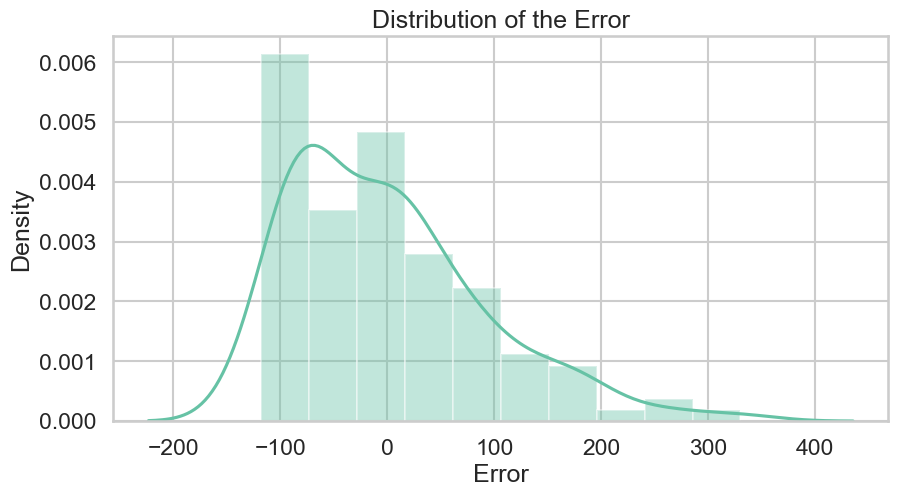

In [41]:
#now the same for the E Score, the G Score and the S Score
#make a Regression from the E Score to the Adj Close Price
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Post Pandemic US E Score")
#make Regression
model = ols("df_us_2020_plus['Adj Close'] ~ df_us_2020_plus['S-Score']", data=df_us_2020_plus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_us_2020_plus["Adj Close Predicted S"] = model.predict(df_us_2020_plus["S-Score"])
#calculate Error
df_us_2020_plus["Error"] = df_us_2020_plus["Adj Close"] - df_us_2020_plus["Adj Close Predicted S"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_us_2020_plus["Error"], bins=10) 
plt.title("Distribution of the Error")
plt.show()

Pre Pandemic DAX ESG Score
                                OLS Regression Results                                
Dep. Variable:     df_2019_minus['Adj Close']   R-squared:                       0.073
Model:                                    OLS   Adj. R-squared:                  0.070
Method:                         Least Squares   F-statistic:                     33.00
Date:                        Sat, 04 Mar 2023   Prob (F-statistic):           1.77e-08
Time:                                14:59:56   Log-Likelihood:                -2191.9
No. Observations:                         423   AIC:                             4388.
Df Residuals:                             421   BIC:                             4396.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1450280286.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_minus["Adj Close Predicted"] = model.predict(df_2019_minus["Total-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1450280286.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_minus["Error"] = df_2019_minus["Adj Close"] - df_2019_minus["Adj Close Predicted"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/1450280286.py:20: U

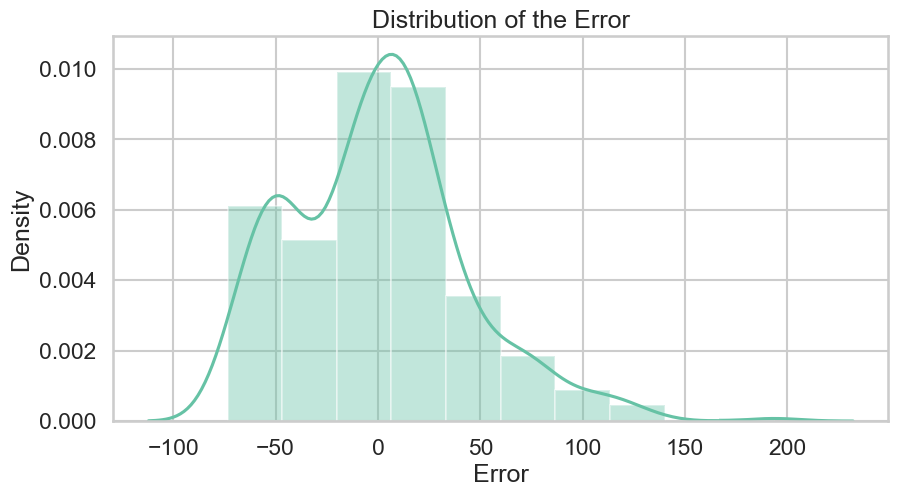

In [42]:
#make a Regression from the ESG Score to the Adj Close Price for the Pre Pandemic Data
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Pre Pandemic DAX ESG Score")
#make Regressiondf_dax_esg
model = ols("df_2019_minus['Adj Close'] ~ df_2019_minus['Total-Score']", data=df_2019_minus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_2019_minus["Adj Close Predicted"] = model.predict(df_2019_minus["Total-Score"])
#calculate Error
df_2019_minus["Error"] = df_2019_minus["Adj Close"] - df_2019_minus["Adj Close Predicted"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_2019_minus["Error"], bins=10)
plt.title("Distribution of the Error")
plt.show()


Post Pandemic DAX ESG Score
                                OLS Regression Results                               
Dep. Variable:     df_2020_plus['Adj Close']   R-squared:                       0.103
Model:                                   OLS   Adj. R-squared:                  0.094
Method:                        Least Squares   F-statistic:                     12.56
Date:                       Sat, 04 Mar 2023   Prob (F-statistic):           0.000579
Time:                               14:59:57   Log-Likelihood:                -615.26
No. Observations:                        112   AIC:                             1235.
Df Residuals:                            110   BIC:                             1240.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------

/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2984793556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_plus["Adj Close Predicted"] = model.predict(df_2020_plus["Total-Score"])
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2984793556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_plus["Error"] = df_2020_plus["Adj Close"] - df_2020_plus["Adj Close Predicted"]
/var/folders/vj/vwvlnlt51hd1nd3t5t5vpcqh0000gn/T/ipykernel_3085/2984793556.py:20: UserWa

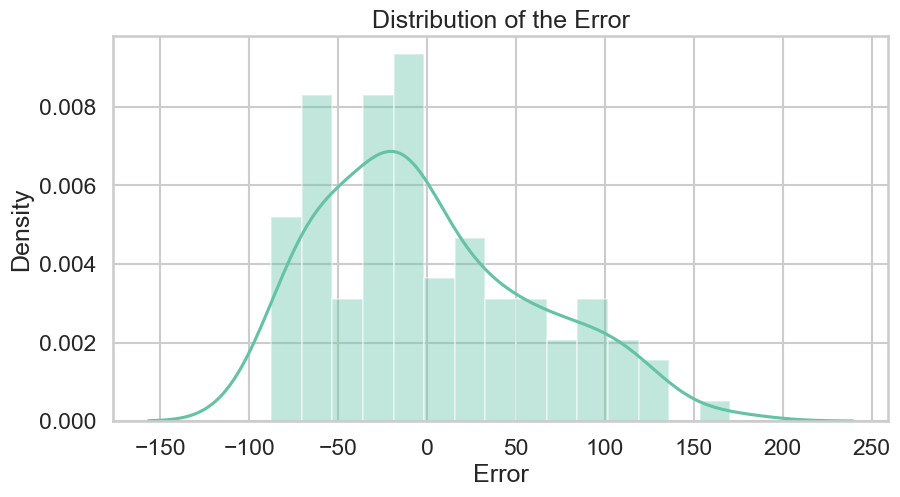

In [43]:
#make a Regression from the ESG Score to the Adj Close Price for the Pre Pandemic Data
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("Post Pandemic DAX ESG Score")
#make Regressiondf_dax_esg
model = ols("df_2020_plus['Adj Close'] ~ df_2020_plus['Total-Score']", data=df_2020_plus).fit()
print(model.summary())
#add a column with the predicted Adj Close Price
df_2020_plus["Adj Close Predicted"] = model.predict(df_2020_plus["Total-Score"])
#calculate Error
df_2020_plus["Error"] = df_2020_plus["Adj Close"] - df_2020_plus["Adj Close Predicted"]

#lets plot the distribution of the Error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.distplot(df_2020_plus["Error"], bins=15)
plt.title("Distribution of the Error")
plt.show()


It seems that a poisson distrubution could module the Error very good

In [44]:
#lets get much more data
tickers = [    "AAPL", "GOOG", "MSFT", "AMZN", "FB",    "BABA", "BRK.A", "BRK.B", "JNJ", "V",    "PG", "JPM", "XOM", "WFC", "VZ",    "T", "HD", "INTC", "CSCO", "PFE",    "BAC", "KO", "MRK", "DIS", "NVDA",    "TSM", "ORCL", "IBM", "MCD", "PEP",    "UNH", "MA", "BA", "CAT", "LMT",    "DWDP", "NKE", "HD", "SBUX", "AXP",    "GS", "CVX", "CMCSA", "UNP", "TRV",    "MMM", "AMGN", "MDT", "TMO", "AGN",    "CRM", "ABBV", "AVGO", "ACN", "BIIB",    "LLY", "GILD", "HON", "RTX", "PNC",    "USB", "BK", "MET", "ADBE", "TJX",    "WBA", "DUK", "LOW", "D", "VFC",    "NEE", "UTX", "HUM", "ANTM", "MCO",    "SO", "ED", "WEC", "EIX", "DTE",    "DUK", "EXC", "AEP", "PPL", "PCG",    "AEE", "XEL", "CNP", "PNW", "ES",    "EVRG", "FE", "DRE", "EQT", "NBL",    "OKE", "PEG", "PNC.WS", "AWK", "CMS",    "NI", "SRE", "AIG", "ALL", "HAL",    "HFC", "MPC", "OXY", "VLO", "PSX",    "SLB", "COP", "WMB", "DVN", "APA",    "HES", "XOM", "KMI", "TXT", "BHF",    "LNC", "PRU", "TMK", "AFL", "FRC",    "AON", "AMP", "CINF", "AJG", "CB",    "C", "GS", "PNC", "JPM", "WFC"]
tickers_2 = [    "TSLA", "RIL", "CHL", "NOKIA", "TM",    "SNE", "VOD", "BCE", "TEL", "BT",    "ORAN", "S", "VIV", "HMC", "F",    "GM", "FORD", "HONDA", "TOYOTA", "DAI",    "BMW", "DAF", "PEUG", "RACE", "VOW3",    "NSANY", "HMC", "SUV", "FP", "EN",    "UL", "SAN", "BBVA", "ITUB", "BBD",    "BSBR", "ABCB", "BC", "SAN", "BBVA",    "ITUB", "BBD", "BSBR", "ABCB", "BC",    "BAC", "C", "WFC", "JPM", "GS",    "AAPL", "MSFT", "AMZN", "GOOGL", "FB",    "BABA", "BIDU", "JD", "MELI", "UBER",    "LULU", "PINS", "SQ", "TSCO", "BTS",    "CTSH", "INFY", "WIT", "TATAMOTORS", "HCLTECH",    "TCS", "IBULHSGFIN", "HDFCBANK", "KOTAKBANK", "AXISBANK",    "SBIN", "MARUTI", "ASHOKLEY", "ONGC", "BPCL",    "IOC", "GAIL", "DRREDDY", "SUNPHARMA", "CIPLA",    "HINDUNILVR", "ITC", "BRITANNIA", "M&M", "TCS",    "RELIANCE", "HDFC", "HOUSING", "INFRATEL", "BHARTIARTL",    "IDEA", "VODAFONE", "JIO", "BHEL", "NTPC",    "POWERGRID", "COALINDIA", "ONGC", "OIL", "GAIL",    "ICICIBANK", "AXISBANK", "HDFCBANK", "KOTAKBANK", "SBIN",    "BAJAJ-AUTO", "HEROMOTOCO", "MARUTI", "TCS", "INFY",    "WIPRO", "HCLTECH", "TATAMOTORS", "HDFC", "RELIANCE",    "ITC", "HINDUNILVR", "SUNPHARMA", "DRREDDY", "CIPLA"]
tickers_3 = ["ADS", "ALV", "BAS", "BAYN", "BEI", "BMW", "CON", "DAI", "DB1", "DBK", "DPW", "LHA", "SAP", "VOW3"]
tickers_4 = tickers = [     "MMM", "ABT", "ABBV", "ABMD", "ACN",     "ATVI", "ADBE", "AMD", "AAP", "AES",     "AFL", "A", "APD", "AKAM", "ALK",     "ALB", "ARE", "ALXN", "ALGN", "ALLE",     "ADS", "LNT", "ALL", "GOOGL", "GOOG",     "MO", "AMZN", "AMCR", "AEE", "AAL",     "AEP", "AXP", "AIG", "AMT", "AWK",     "AMP", "ABC", "AME", "AMGN", "APH",     "ADI", "ANSS", "ANTM", "AON", "AOS",     "APA", "AIV", "AAPL", "AMAT", "APTV",     "ADM", "ANET", "AJG", "AIZ", "T",     "ATO", "ADSK", "ADP", "AZO", "AVB",     "AVY", "BHGE", "BLL", "BAC", "BK",     "BAX", "BBT", "BDX", "BRK.B", "BBY",     "BIIB", "BLK", "HRB", "BA", "BKNG",     "BWA", "BXP", "BSX", "BMY", "AVGO",     "BF.B", "CHRW", "COG", "CDNS", "CPB",     "COF", "CPRI", "CAH", "KMX", "CCL",     "CAT", "CBOE", "CBRE", "CDW", "CE",     "CELG", "CNC", "CNP", "CTL", "CERN",     "CF", "SCHW", "CHTR", "CVX", "CMG",     "CB", "CHD", "CI", "XEC", "CINF",     "CTAS", "CSCO", "C", "CFG", "CTXS",     "CLX", "CME", "CMS", "KO", "CTSH",     "CL", "CMCSA", "CMA", "CAG", "CXO",     "COP", "ED", "STZ", "GLW", "COST",     "COTY", "CCI", "CSX", "CMI", "CVS",     "DHI", "DHR", "DRI", "DVA", "DE",     "DAL", "XRAY", "DVN", "DLR", "DFS",     "DISCA", "DISCK", "DISH", "DG", "DLTR",     "D", "DOV", "DWDP", "DTE", "DUK",     "DRE", "DXC", "ETFC", "EMN", "ETN",     "EBAY", "ECL", "EIX ... EL", "EVRG", "EOG", "EQT", "EFX",     "EQIX", "EQR", "ESS", "ELAN", "EVR",     "ES", "RE", "EXC", "EXPE", "EXPD",     "EXR", "XOM", "FFIV", "FB", "FAST",     "FRT", "FDX", "FIS", "FITB", "FE",     "FRC", "FISV", "FLT", "FLIR", "FLS",     "FMC", "F", "FTNT", "FTV", "FBHS",     "FOXA", "FOX", "BEN", "FCX", "GPS",     "GRMN", "IT", "GD", "GE", "GIS",     "GM", "GPC", "GILD", "GL", "GPN",     "GS", "GWW", "HRB", "HAL", "HBI",     "HOG", "HIG", "HAS", "HCA", "PEAK",     "HSIC", "HSY", "HES", "HPE", "HLT",     "HFC", "HOLX", "HD", "HON", "HRL",     "HST", "HPQ", "HUM", "HBAN", "HII",     "IEX", "IDXX", "INFO", "ITW", "ILMN",     "IR", "INTC", "ICE", "IBM", "INCY",     "IP", "IPG", "IFF", "INTU", "ISRG",     "IVZ", "IPGP", "IQV", "IRM", "JEC",     "JBHT", "SJM", "JNJ", "JCI", "JPM",     "JNPR", "KSU", "K", "KEY", "KEYS",     "KMB", "KIM", "KMI", "KLAC", "KSS",     "KHC", "KR", "LB", "LHX", "LH",     "LRCX", "LW", "LVS", "LEG", "LDOS",     "LEN", "LLY", "LNC", "LIN", "LKQ",     "LMT", "L", "LOW", "LYB", "MTB",     "MRO", "MPC", "MAR", "MMC", "MLM",     "MAS", "MA", "MKC", "MXIM", "MCD",     "MCK", "MDT", "MRK", "MET", "MTD",     "MGM", "MCHP", "MU", "MSFT", "MAA",     "MHK", "TAP", "MDLZ", "MNST", "MCO",     "MS", "MSI", "MSCI", "MYL", "NDAQ",     "NOV", "NKTR", "NTAP", "NFLX", "NWL",     "NEM", "NWSA", "NWS", "NEE", "NLSN",     "NKE", "NI", "NBL", "JWN", "NSC",     "NTRS", "NOC", "NLOK... OXY", "ODFL", "OMC", "OKE", "ORCL",     "PCAR", "PKG", "PH", "PAYX", "PAYC",     "PYPL", "PNR", "PNC", "RL", "PPG",     "PPL", "PFG", "PG", "PGR", "PLD",     "PRU", "PEG", "PSA", "PHM", "PVH",     "QRVO", "PWR", "QCOM", "DGX", "RJF",     "RTX", "O", "REG", "REGN", "RF",     "RSG", "RMD", "RHI", "ROK", "COL",     "ROP", "ROST", "RCL", "CRM", "SBAC",     "SLB", "STX", "SEE", "SRE", "SHW",     "SPG", "SWKS", "SLG", "SNA", "SO",     "LUV", "SWK", "SBUX", "STT", "SYK",     "STI", "SIVB", "SYF", "SNPS", "SYY",     "TMUS", "TROW", "TTWO", "TPR", "TGT",     "TEL", "FTI", "TFX", "TXN", "TXT",     "TMO", "TIF", "TJX", "TSCO", "TDG",     "TRV", "TRIP", "TSN", "UDR", "ULTA",     "USB", "UAA", "UA", "UNP", "UAL",     "UNH", "UPS", "URI", "UTX", "UHS",     "UNM", "VFC", "VLO", "VAR", "VTR",     "VRSN", "VRSK", "VZ", "VRTX", "VIAB",     "V", "VNO", "VMC", "WAB", "WMT",     "WBA", "DIS", "WM", "WAT", "WEC",     "WFC", "WELL", "WDC", "WU", "WRK",     "WY", "WHR", "WMB", "WLTW", "WYNN",     "XEL", "XRX", "XLNX", "XYL", "YUM",     "ZBH", "ZION", "ZTS" ] 
tickers = tickers + tickers_2 + tickers_3 + tickers_4

In [45]:
tickers = list(set(tickers))

In [46]:
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
df_companys = get_data(set(tickers))

  1%|          | 7/564 [00:03<04:22,  2.12it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


  2%|▏         | 13/564 [00:08<04:42,  1.95it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


  3%|▎         | 15/564 [00:08<03:38,  2.52it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


  4%|▍         | 24/564 [00:13<03:59,  2.25it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


  7%|▋         | 37/564 [00:20<03:00,  2.92it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


  7%|▋         | 40/564 [00:21<03:13,  2.71it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


  8%|▊         | 47/564 [00:24<03:39,  2.36it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 11%|█         | 60/564 [00:31<03:57,  2.12it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 13%|█▎        | 72/564 [00:36<02:47,  2.94it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 14%|█▍        | 79/564 [00:39<02:54,  2.77it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 15%|█▍        | 83/564 [00:41<02:16,  3.53it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 15%|█▌        | 87/564 [00:42<02:46,  2.87it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 16%|█▌        | 90/564 [00:44<02:39,  2.98it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 17%|█▋        | 97/564 [00:47<02:57,  2.63it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 18%|█▊        | 99/564 [00:47<02:40,  2.90it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 20%|██        | 114/564 [00:56<03:46,  1.98it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 21%|██        | 116/564 [00:57<03:06,  2.40it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 23%|██▎       | 130/564 [01:04<02:24,  3.01it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 24%|██▍       | 138/564 [01:08<03:01,  2.34it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 25%|██▌       | 143/564 [01:10<03:11,  2.20it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 26%|██▋       | 149/564 [01:13<02:53,  2.39it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 27%|██▋       | 152/564 [01:14<02:37,  2.62it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 27%|██▋       | 154/564 [01:15<02:08,  3.18it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 29%|██▉       | 165/564 [01:21<02:54,  2.28it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 30%|██▉       | 167/564 [01:21<02:29,  2.65it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 30%|██▉       | 169/564 [01:22<02:26,  2.69it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 32%|███▏      | 179/564 [01:27<02:26,  2.63it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 33%|███▎      | 186/564 [01:30<02:06,  2.98it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 33%|███▎      | 188/564 [01:31<02:06,  2.98it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 35%|███▌      | 200/564 [01:38<04:27,  1.36it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 37%|███▋      | 207/564 [01:44<05:12,  1.14it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 38%|███▊      | 215/564 [01:48<02:50,  2.05it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 39%|███▊      | 218/564 [01:49<02:10,  2.65it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 40%|███▉      | 225/564 [01:54<03:23,  1.67it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 40%|████      | 228/564 [01:55<02:50,  1.97it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 41%|████      | 231/564 [01:56<02:05,  2.66it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 41%|████▏     | 234/564 [01:58<02:26,  2.25it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 42%|████▏     | 238/564 [02:02<03:37,  1.50it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 44%|████▎     | 246/564 [02:08<02:51,  1.85it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 45%|████▍     | 253/564 [02:12<02:34,  2.01it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 46%|████▌     | 257/564 [02:14<02:18,  2.22it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 47%|████▋     | 265/564 [02:18<02:08,  2.33it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 48%|████▊     | 270/564 [02:21<01:52,  2.61it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 49%|████▉     | 276/564 [02:24<02:05,  2.30it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 49%|████▉     | 278/564 [02:24<01:46,  2.68it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 50%|████▉     | 280/564 [02:25<01:46,  2.67it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 51%|█████     | 285/564 [02:27<01:28,  3.14it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 52%|█████▏    | 291/564 [02:29<01:25,  3.20it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 52%|█████▏    | 292/564 [02:30<01:13,  3.72it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 53%|█████▎    | 298/564 [02:33<02:05,  2.13it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 54%|█████▍    | 304/564 [02:36<01:51,  2.33it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 55%|█████▍    | 309/564 [02:39<02:34,  1.65it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 56%|█████▌    | 317/564 [02:44<01:55,  2.14it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 57%|█████▋    | 321/564 [02:46<01:58,  2.06it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 57%|█████▋    | 322/564 [02:46<01:37,  2.49it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 59%|█████▊    | 330/564 [02:51<02:28,  1.58it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 60%|█████▉    | 337/564 [02:55<01:49,  2.07it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 62%|██████▏   | 348/564 [03:02<02:08,  1.68it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 63%|██████▎   | 355/564 [03:06<02:08,  1.62it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 65%|██████▍   | 366/564 [03:14<01:20,  2.47it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 67%|██████▋   | 379/564 [03:22<01:24,  2.20it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 68%|██████▊   | 385/564 [03:26<01:19,  2.25it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 69%|██████▉   | 388/564 [03:27<01:10,  2.50it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 70%|███████   | 395/564 [03:31<01:05,  2.60it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 70%|███████   | 396/564 [03:31<00:52,  3.19it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 71%|███████▏  | 402/564 [03:35<01:16,  2.13it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 72%|███████▏  | 407/564 [03:37<01:14,  2.12it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 72%|███████▏  | 408/564 [03:37<01:03,  2.45it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 74%|███████▍  | 420/564 [03:44<01:02,  2.30it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 77%|███████▋  | 435/564 [03:52<01:01,  2.11it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 78%|███████▊  | 440/564 [03:54<00:43,  2.85it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 79%|███████▉  | 446/564 [03:57<00:48,  2.43it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 79%|███████▉  | 448/564 [03:57<00:41,  2.79it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 80%|████████  | 452/564 [03:59<00:33,  3.38it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 80%|████████  | 453/564 [03:59<00:29,  3.73it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 82%|████████▏ | 461/564 [04:03<00:40,  2.55it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 82%|████████▏ | 465/564 [04:04<00:29,  3.39it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 84%|████████▎ | 472/564 [04:07<00:35,  2.62it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 85%|████████▌ | 480/564 [04:11<00:35,  2.40it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 85%|████████▌ | 482/564 [04:12<00:29,  2.80it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 86%|████████▌ | 484/564 [04:13<00:28,  2.83it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 87%|████████▋ | 488/564 [04:14<00:27,  2.81it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 87%|████████▋ | 490/564 [04:15<00:27,  2.73it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 87%|████████▋ | 492/564 [04:16<00:23,  3.08it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 90%|█████████ | 508/564 [04:28<00:28,  1.94it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 92%|█████████▏| 520/564 [04:34<00:20,  2.12it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 94%|█████████▍| 529/564 [04:39<00:15,  2.22it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 94%|█████████▍| 531/564 [04:40<00:12,  2.54it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 95%|█████████▍| 533/564 [04:41<00:11,  2.60it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 95%|█████████▍| 535/564 [04:41<00:10,  2.72it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 96%|█████████▋| 544/564 [04:47<00:09,  2.18it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 97%|█████████▋| 545/564 [04:47<00:07,  2.41it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 97%|█████████▋| 548/564 [04:48<00:04,  3.38it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 98%|█████████▊| 550/564 [04:49<00:04,  3.17it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 99%|█████████▉| 557/564 [04:54<00:03,  2.04it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


 99%|█████████▉| 558/564 [04:54<00:02,  2.33it/s]

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.


100%|██████████| 564/564 [04:58<00:00,  1.89it/s]


In [47]:
#split the data on a date and get the means of the total score from before and after the date
#then iterate over 2019-2020 and get the date that shows the biggest difference in the means

def split_data(df, date):
    df_before = df[df.index < date]
    df_after = df[df.index >= date]
    mean_before = df_before.mean()
    mean_after = df_after.mean()
    return mean_before, mean_after

def get_date(df, date):
    mean_before, mean_after = split_data(df, date)
    return mean_before - mean_after

def get_dates(df, start_date, end_date):
    dates = pd.date_range(start_date, end_date)
    results = []
    for date in tqdm(dates):
        results.append(get_date(df, date))
    return results

def get_max_date(df, start_date, end_date):
    results = get_dates(df, start_date, end_date)
    results = pd.DataFrame(results)
    results.index = pd.date_range(start_date, end_date)
    return results.idxmax()

date_split = get_max_date(df_companys, '2019-01-01', '2020-01-01')


100%|██████████| 366/366 [00:16<00:00, 21.69it/s]


In [48]:
df_companys_sicherheitskopie = df_companys.copy()

In [49]:
#get two dataframes, one with the data before the date and one with the data after the date
#then get the mean of the total score for each company and then get the difference between the two

def get_dataframes(df, date):
    df_before = df[df.index < date]
    df_after = df[df.index >= date]
    return df_before, df_after

df_before, df_after = get_dataframes(df_companys, date_split["Total-Score"])


In [50]:
df_before.drop_duplicates(subset=["Total-Score", "E-Score", "S-Score", "G-Score", "Company"], keep="first", inplace=True)
#sort by company and then by Date
df_before.sort_values(by=["Company", "Date"], inplace=True)

In [51]:
df_before.corr()

Total-Score   E-Score   S-Score   G-Score  Adj Close
Total-Score     1.000000  0.839427  0.824872  0.641357  -0.136959
E-Score         0.839427  1.000000  0.474317  0.361252  -0.044004
S-Score         0.824872  0.474317  1.000000  0.423335  -0.189679
G-Score         0.641357  0.361252  0.423335  1.000000  -0.077232
Adj Close      -0.136959 -0.044004 -0.189679 -0.077232   1.000000

In [52]:
df_after.drop_duplicates(subset=["Total-Score", "E-Score", "S-Score", "G-Score", "Company"], keep="first", inplace=True)
#combine rows with the same company and the same total score and get the mean of the other scores
df_after.corr()

Total-Score   E-Score   S-Score   G-Score  Adj Close
Total-Score     1.000000  0.683964  0.672140  0.423615  -0.110300
E-Score         0.683964  1.000000  0.006485 -0.163598  -0.160797
S-Score         0.672140  0.006485  1.000000  0.405337   0.044477
G-Score         0.423615 -0.163598  0.405337  1.000000  -0.049184
Adj Close      -0.110300 -0.160797  0.044477 -0.049184   1.000000

In [53]:
#rescale the data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

df_before[["Total-Score", "E-Score", "S-Score", "G-Score"]] = 100 - df_before[["Total-Score", "E-Score", "S-Score", "G-Score"]]
          
df_before_scaled = scaler.fit_transform(df_before[["Total-Score", "E-Score", "S-Score", "G-Score"]])
df_after_scaled = scaler.fit_transform(df_after[["Total-Score", "E-Score", "S-Score", "G-Score"]])
#add the company column back
df_before_scaled = pd.DataFrame(df_before_scaled, columns=["Total-Score", "E-Score", "S-Score", "G-Score"])
df_before_scaled["Company"] = df_before["Company"].values

df_after_scaled = pd.DataFrame(df_after_scaled, columns=["Total-Score", "E-Score", "S-Score", "G-Score"])
df_after_scaled["Company"] = df_after["Company"].values

#add the date column back
df_before_scaled["Date"] = df_before["Date"].values
df_after_scaled["Date"] = df_after["Date"].values

#add the Adj Close column back
df_before_scaled["Adj Close"] = df_before["Adj Close"].values
df_after_scaled["Adj Close"] = df_after["Adj Close"].values


#combine the dataframes to df_companys
df_companys = pd.concat([df_before_scaled, df_after_scaled], axis=0)
#sort by company and then by Date
df_companys.sort_values(by=["Company", "Date"], inplace=True)
df_companys.index = df_companys["Date"]
df_companys.drop(columns=["Date"], inplace=True)



<AxesSubplot: xlabel='Date'>

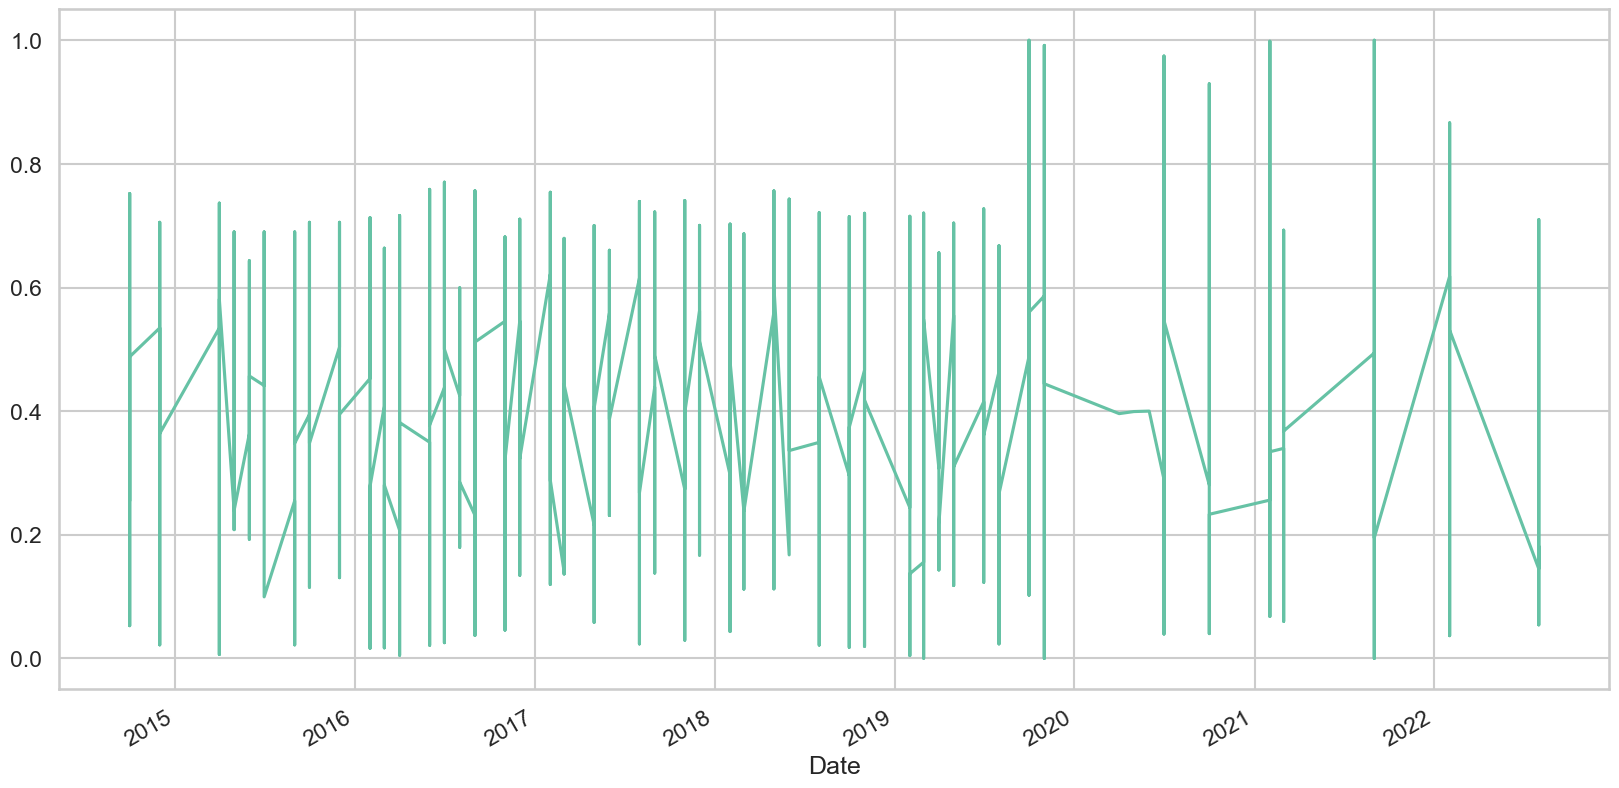

In [54]:
df_companys["Total-Score"].plot(figsize=(20,10))

In [55]:
df_companys.shape

(8228, 6)

In [56]:
#drop duplicate rows and columns (if Total-Score and E-Score and S-Score and G-Score and Company are the same)
df_companys = df_companys.drop_duplicates(subset=["Total-Score", "E-Score", "S-Score", "G-Score", "Company"], keep="first")

In [57]:
len(set(df_companys["Adj Close"]))

8211

In [58]:
#lets group the companies based on ESG Score and factors with K Means
#first sort by Company Name then by Date
df_companys = df_companys.sort_values(by=["Company", "Date"])
from sklearn.cluster import KMeans
#cluster the companies based on the mean of the ESG Score and factors
#group data mean
df_companys_grouped = df_companys.groupby("Company").mean()
#cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_companys_grouped)
#add the cluster to the dataframe
df_companys_grouped["Cluster"] = kmeans.labels_
#sort by cluster
df_companys_grouped = df_companys_grouped.sort_values(by="Cluster")
#add the cluster to the original dataframe
df_companys_new = df_companys.copy()
df_companys_new["Cluster"] = df_companys_new["Company"].map(df_companys_grouped["Cluster"])
#lets get the correlation matrix
#get a lineplot for every cluster, with the lines are the Adj Close Price, Total-Score  E-Score  S-Score  G-Score


In [59]:
#get a correlation matrix for the clusters
print("Correlation for the cluster 1")
print(df_companys_new[df_companys_new["Cluster"] == 0].corr())
print("shape of the cluster 1")
print(df_companys_new[df_companys_new["Cluster"] == 0].shape)
print("Correlation for the cluster 2")
print(df_companys_new[df_companys_new["Cluster"] == 1].corr())
print("shape of the cluster 2")
print(df_companys_new[df_companys_new["Cluster"] == 1].shape)
print("Correlation for the cluster 3")
print(df_companys_new[df_companys_new["Cluster"] == 2].corr())
print("shape of the cluster 3")
print(df_companys_new[df_companys_new["Cluster"] == 2].shape)
print("Correlation for the cluster 4")
print(df_companys_new[df_companys_new["Cluster"] == 3].corr())
print("shape of the cluster 4")
print(df_companys_new[df_companys_new["Cluster"] == 3].shape)
print("Correlation for the cluster 5")
print(df_companys_new[df_companys_new["Cluster"] == 4].corr())
print("shape of the cluster 5")
print(df_companys_new[df_companys_new["Cluster"] == 4].shape)

Correlation for the cluster 1
             Total-Score   E-Score   S-Score   G-Score  Adj Close  Cluster
Total-Score     1.000000  0.758416  0.758369  0.489992  -0.049932      NaN
E-Score         0.758416  1.000000  0.274995  0.057634  -0.186294      NaN
S-Score         0.758369  0.274995  1.000000  0.402947   0.032606      NaN
G-Score         0.489992  0.057634  0.402947  1.000000   0.032395      NaN
Adj Close      -0.049932 -0.186294  0.032606  0.032395   1.000000      NaN
Cluster              NaN       NaN       NaN       NaN        NaN      NaN
shape of the cluster 1
(4968, 7)
Correlation for the cluster 2
             Total-Score   E-Score   S-Score   G-Score  Adj Close  Cluster
Total-Score     1.000000  0.781153  0.763588  0.555086  -0.247240      NaN
E-Score         0.781153  1.000000  0.302127  0.216783  -0.420069      NaN
S-Score         0.763588  0.302127  1.000000  0.319743  -0.065138      NaN
G-Score         0.555086  0.216783  0.319743  1.000000  -0.055093      NaN
Adj Clo

In [60]:
df_cluster_0 = df_companys_new[df_companys_new["Cluster"] == 0]
df_cluster_1 = df_companys_new[df_companys_new["Cluster"] == 1]
df_cluster_2 = df_companys_new[df_companys_new["Cluster"] == 2]
df_cluster_3 = df_companys_new[df_companys_new["Cluster"] == 3]
df_cluster_4 = df_companys_new[df_companys_new["Cluster"] == 4]


In [61]:
list_all = df_companys["Adj Close"].tolist()

In [62]:
len((list_all))

8228

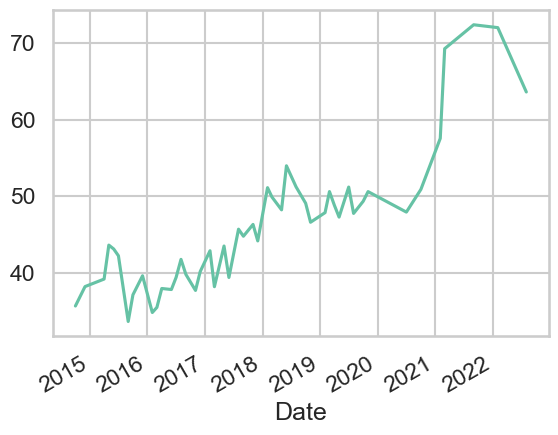

-0.18352295033013175
-0.7282987530180297
0.16239034361785912
0.05290180226659767



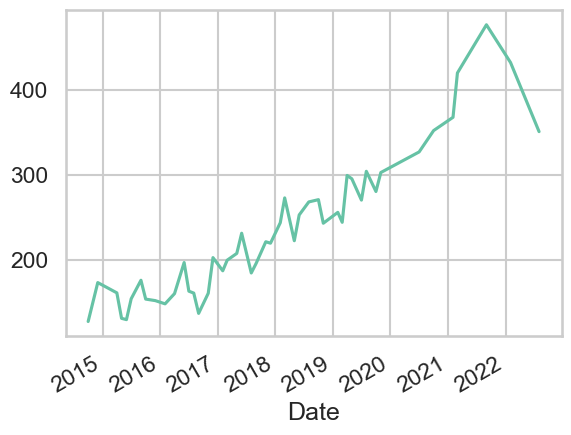

-0.4751636443798479
-0.7229691233713563
-0.1641069496705285
0.10469629824692114



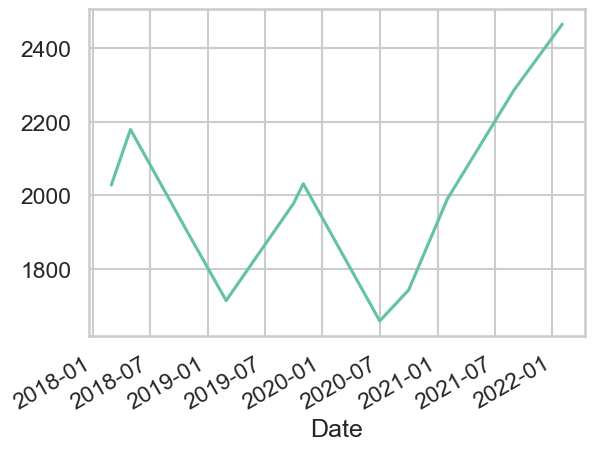

-0.07611578469038552
-0.17426795370447554
0.15142402296579707
0.06874141992392897



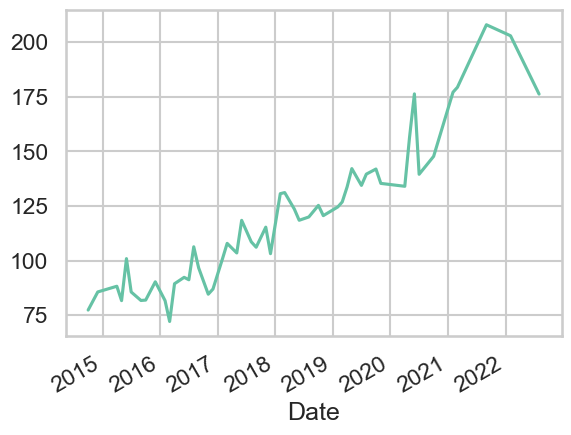

-0.4414781568140266
-0.7050226924679484
-0.11260197824183481
-0.330162362077868



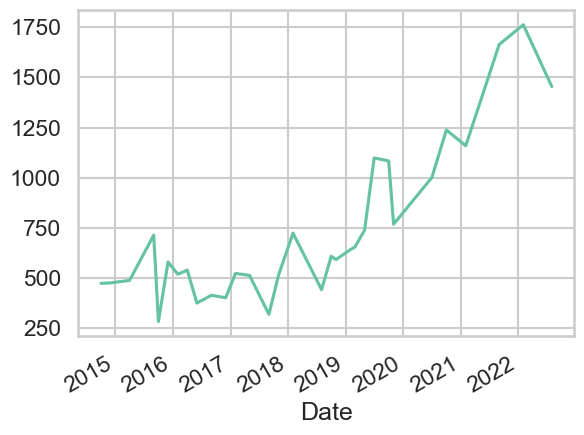

-0.695795257099622
-0.595562278719628
-0.42243354525315113
-0.7551662375082476



In [63]:
list_df_clusters = [df_cluster_0, df_cluster_1, df_cluster_2, df_cluster_3, df_cluster_4]
for df_cluster in list_df_clusters:
    df_cluster["Date"] = df_cluster.index
    df_cluster["Adj Close"].groupby(df_cluster["Date"]).mean().plot()
    plt.show()
    print(df_cluster["Adj Close"].groupby(df_cluster["Date"]).mean().corr(df_cluster["Total-Score"].groupby(df_cluster["Date"]).mean()))
    print(df_cluster["Adj Close"].groupby(df_cluster["Date"]).mean().corr(df_cluster["E-Score"].groupby(df_cluster["Date"]).mean()))
    print(df_cluster["Adj Close"].groupby(df_cluster["Date"]).mean().corr(df_cluster["S-Score"].groupby(df_cluster["Date"]).mean()))
    print(df_cluster["Adj Close"].groupby(df_cluster["Date"]).mean().corr(df_cluster["G-Score"].groupby(df_cluster["Date"]).mean()))
    print("")

In [64]:
#get a correlation matrix for the clusters
print("Correlation for the cluster 1")
print(df_companys_new[df_companys_new["Cluster"] == 0].corr())
print("shape of the cluster 1")
print(df_companys_new[df_companys_new["Cluster"] == 0].shape)
print("Correlation for the cluster 2")
print(df_companys_new[df_companys_new["Cluster"] == 1].corr())
print("shape of the cluster 2")
print(df_companys_new[df_companys_new["Cluster"] == 1].shape)
print("Correlation for the cluster 3")
print(df_companys_new[df_companys_new["Cluster"] == 2].corr())
print("shape of the cluster 3")
print(df_companys_new[df_companys_new["Cluster"] == 2].shape)
print("Correlation for the cluster 4")
print(df_companys_new[df_companys_new["Cluster"] == 3].corr())
print("shape of the cluster 4")
print(df_companys_new[df_companys_new["Cluster"] == 3].shape)
print("Correlation for the cluster 5")
print(df_companys_new[df_companys_new["Cluster"] == 4].corr())
print("shape of the cluster 5")
print(df_companys_new[df_companys_new["Cluster"] == 4].shape)

Correlation for the cluster 1
             Total-Score   E-Score   S-Score   G-Score  Adj Close  Cluster
Total-Score     1.000000  0.758416  0.758369  0.489992  -0.049932      NaN
E-Score         0.758416  1.000000  0.274995  0.057634  -0.186294      NaN
S-Score         0.758369  0.274995  1.000000  0.402947   0.032606      NaN
G-Score         0.489992  0.057634  0.402947  1.000000   0.032395      NaN
Adj Close      -0.049932 -0.186294  0.032606  0.032395   1.000000      NaN
Cluster              NaN       NaN       NaN       NaN        NaN      NaN
shape of the cluster 1
(4968, 7)
Correlation for the cluster 2
             Total-Score   E-Score   S-Score   G-Score  Adj Close  Cluster
Total-Score     1.000000  0.781153  0.763588  0.555086  -0.247240      NaN
E-Score         0.781153  1.000000  0.302127  0.216783  -0.420069      NaN
S-Score         0.763588  0.302127  1.000000  0.319743  -0.065138      NaN
G-Score         0.555086  0.216783  0.319743  1.000000  -0.055093      NaN
Adj Clo

Total-Score   -0.049932
E-Score       -0.186294
S-Score        0.032606
G-Score        0.032395
Adj Close      1.000000
Cluster             NaN
Name: Adj Close, dtype: float64


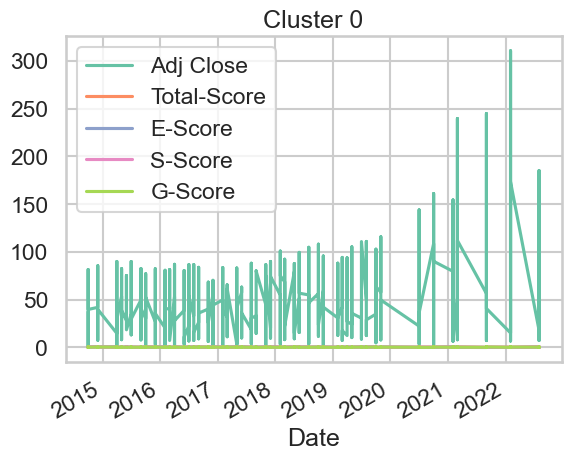

Total-Score   -0.176836
E-Score       -0.347821
S-Score       -0.008714
G-Score       -0.121149
Adj Close      1.000000
Cluster             NaN
Name: Adj Close, dtype: float64


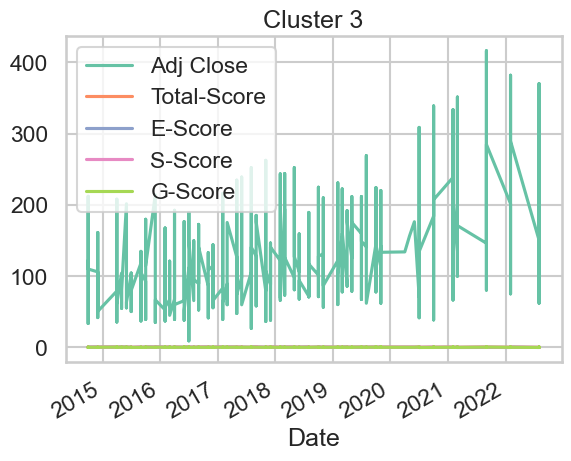

Total-Score   -0.247240
E-Score       -0.420069
S-Score       -0.065138
G-Score       -0.055093
Adj Close      1.000000
Cluster             NaN
Name: Adj Close, dtype: float64


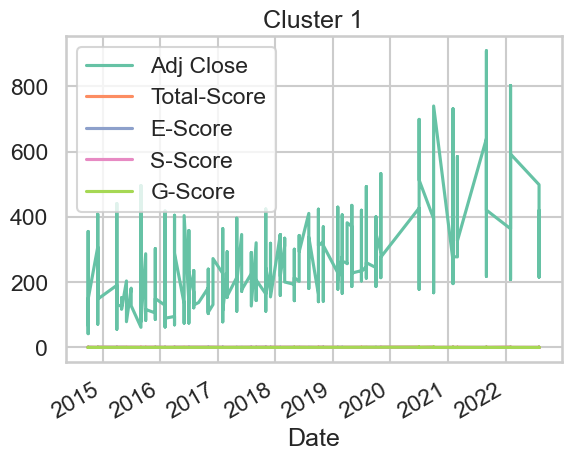

Total-Score   -0.648877
E-Score       -0.523440
S-Score       -0.380792
G-Score       -0.759489
Adj Close      1.000000
Cluster             NaN
Name: Adj Close, dtype: float64


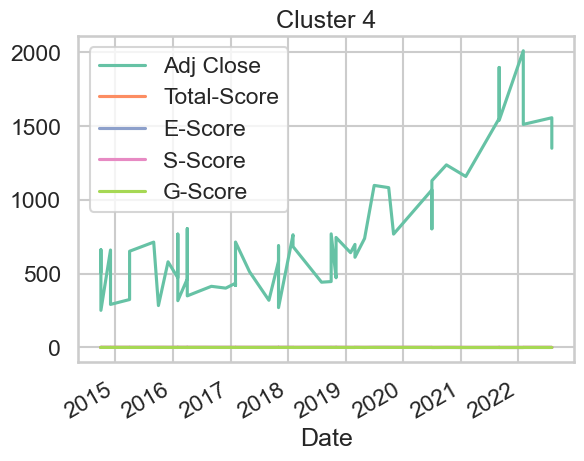

Total-Score   -0.076116
E-Score       -0.174268
S-Score        0.151424
G-Score        0.068741
Adj Close      1.000000
Cluster             NaN
Name: Adj Close, dtype: float64


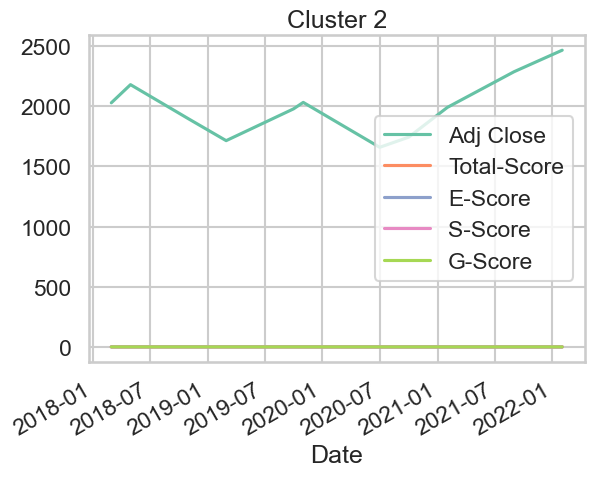

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

for cluster_number in df_companys_new["Cluster"].unique():
    df_companys_new[df_companys_new["Cluster"] == cluster_number][["Adj Close", "Total-Score", "E-Score", "S-Score", "G-Score"]].plot()
    plt.title("Cluster " + str(cluster_number))
    #print the correlation matrix
    print(df_companys_new[df_companys_new["Cluster"] == cluster_number].corr()["Adj Close"])
    plt.show()
    plt.close()

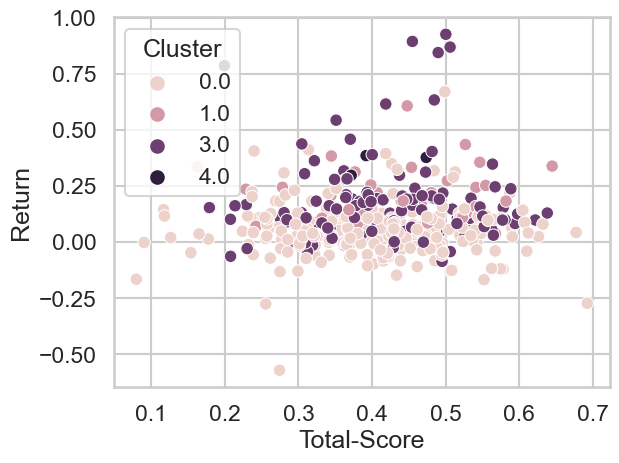

In [66]:
#make a scatterplot of the average yearly return of the companies and the average yearly ESG Score, color the points by cluster
df_companys_mean = df_companys_new.copy()
df_companys_mean["Date_"] = df_companys_mean.index
df_companys_mean.sort_values(by=["Company", "Date_"], inplace=True)
#group by company and year and get the mean of the Adj Close Price
df_companys_mean = df_companys_mean.groupby(["Company", df_companys_mean["Date_"].dt.year]).mean()
#add the return
df_companys_mean["Return"] = df_companys_mean["Adj Close"].pct_change()
#get the average yearly return for each company
df_companys_mean = df_companys_mean.groupby("Company").mean()
#visualize the data "Total-Score", "Return" as the x and y axis and color the points by cluster
#only between -1 and 1 for return
df_companys_mean = df_companys_mean[(df_companys_mean["Return"] > -1) & (df_companys_mean["Return"] < 1)]
sns.scatterplot(data=df_companys_mean, x="Total-Score", y="Return", hue="Cluster")
plt.show()



Total-Score   -0.027753
E-Score       -0.112756
S-Score        0.048393
G-Score        0.053817
Adj Close      0.425914
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


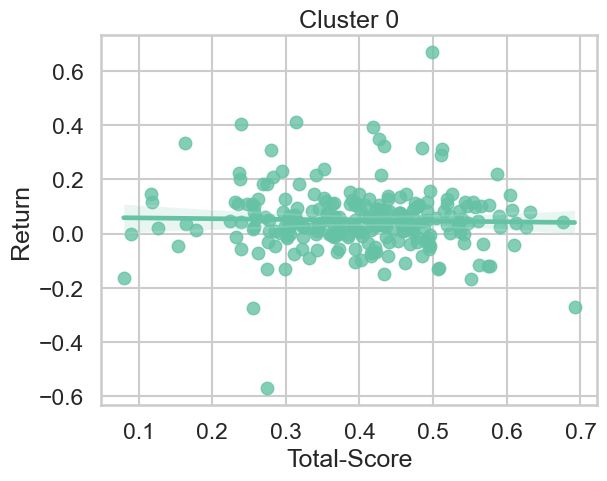

(245, 7)
Total-Score    0.040558
E-Score        0.002919
S-Score        0.103531
G-Score       -0.052713
Adj Close      0.278111
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


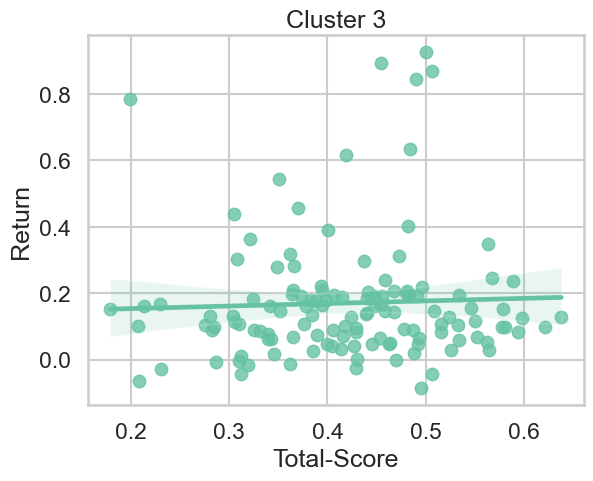

(129, 7)
Total-Score    0.192990
E-Score        0.116597
S-Score        0.142201
G-Score        0.156707
Adj Close      0.190897
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


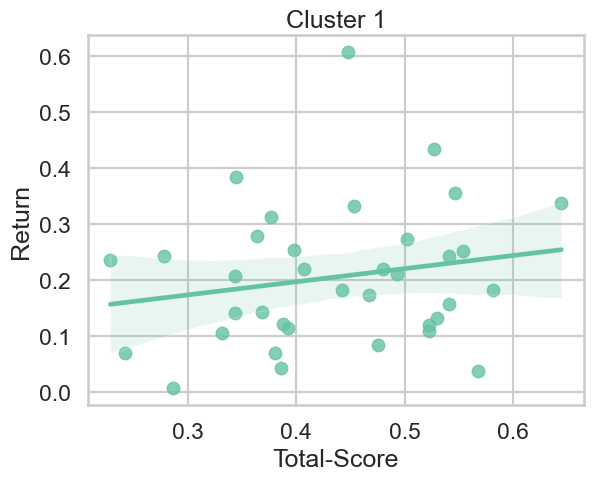

(36, 7)
Total-Score    0.587627
E-Score        0.992854
S-Score       -0.067210
G-Score       -0.952210
Adj Close      0.911945
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


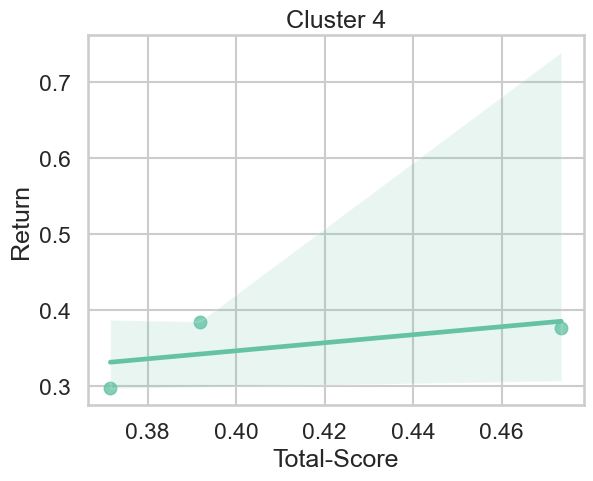

(3, 7)
Total-Score   NaN
E-Score       NaN
S-Score       NaN
G-Score       NaN
Adj Close     NaN
Cluster       NaN
Return        NaN
Name: Return, dtype: float64


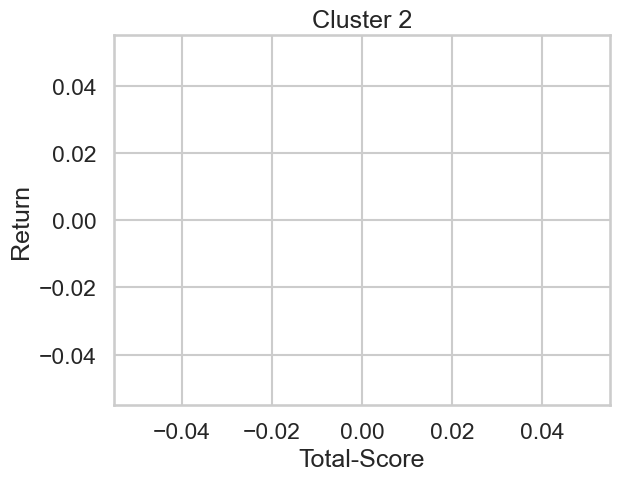

(0, 7)


In [67]:
#now add a linear regression line for each cluster
for cluster_number in df_companys_new["Cluster"].unique():
    sns.regplot(data=df_companys_mean[df_companys_mean["Cluster"] == cluster_number], x="Total-Score", y="Return")
    plt.title("Cluster " + str(cluster_number))
    #print the correlation matrix
    print(df_companys_mean[df_companys_mean["Cluster"] == cluster_number].corr()["Return"])
    plt.show()
    plt.close()
    print(df_companys_mean[df_companys_mean["Cluster"] == cluster_number].shape)
#now add a linear regression line for each cluster


Total-Score   -0.027753
E-Score       -0.112756
S-Score        0.048393
G-Score        0.053817
Adj Close      0.425914
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


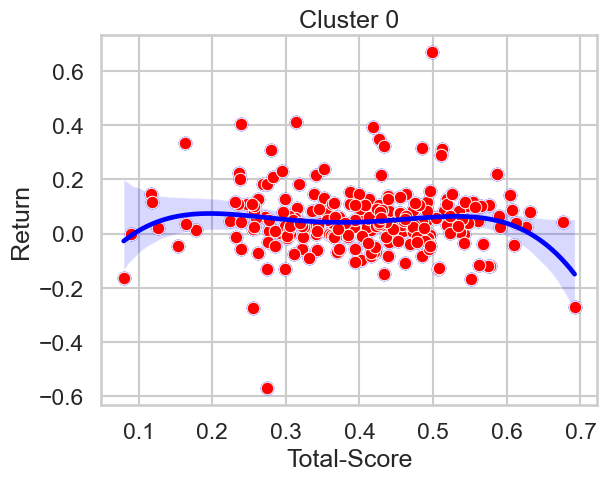

(245, 7)
Total-Score    0.040558
E-Score        0.002919
S-Score        0.103531
G-Score       -0.052713
Adj Close      0.278111
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


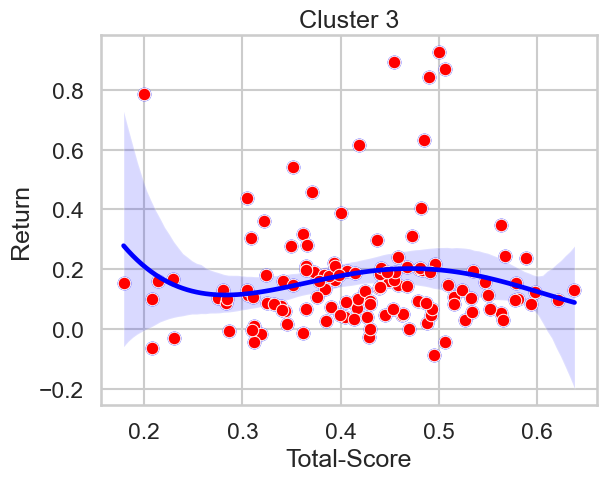

(129, 7)
Cluster 1 has less than 500 points
Cluster 4 has less than 500 points
Cluster 2 has less than 500 points


In [68]:
#now add a polynom regression line for each cluster
for cluster_number in df_companys_new["Cluster"].unique():
    #change color of the points
    #only if more than 500 points
    if df_companys_mean[df_companys_mean["Cluster"] == cluster_number].shape[0] > 100:
        sns.regplot(data=df_companys_mean[df_companys_mean["Cluster"] == cluster_number], x="Total-Score", y="Return", order=4, color="blue")
        sns.scatterplot(data=df_companys_mean[df_companys_mean["Cluster"] == cluster_number], x="Total-Score", y="Return", color="red")
        plt.title("Cluster " + str(cluster_number))
        #print the correlation matrix
        print(df_companys_mean[df_companys_mean["Cluster"] == cluster_number].corr()["Return"])
        plt.show()
        plt.close()
        print(df_companys_mean[df_companys_mean["Cluster"] == cluster_number].shape)
    else:   
        print("Cluster " + str(cluster_number) + " has less than 500 points")


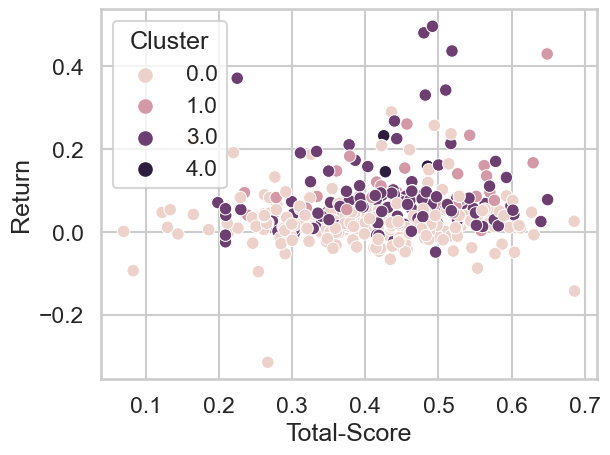

Total-Score    0.010703
E-Score       -0.068580
S-Score        0.072740
G-Score        0.046068
Adj Close      0.376976
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


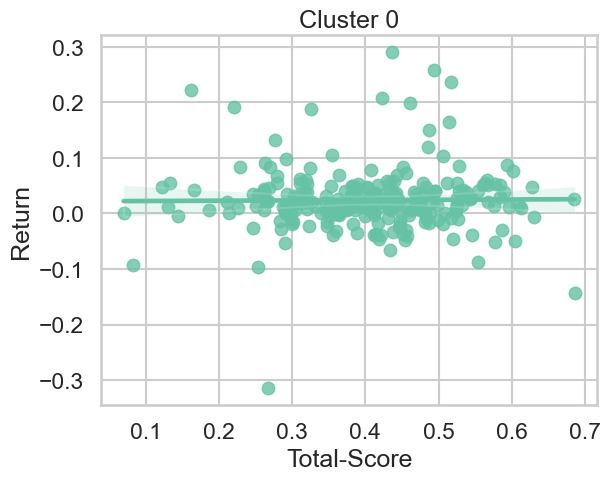

(245, 7)
Total-Score    0.096162
E-Score        0.057166
S-Score        0.146497
G-Score       -0.034625
Adj Close      0.228803
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


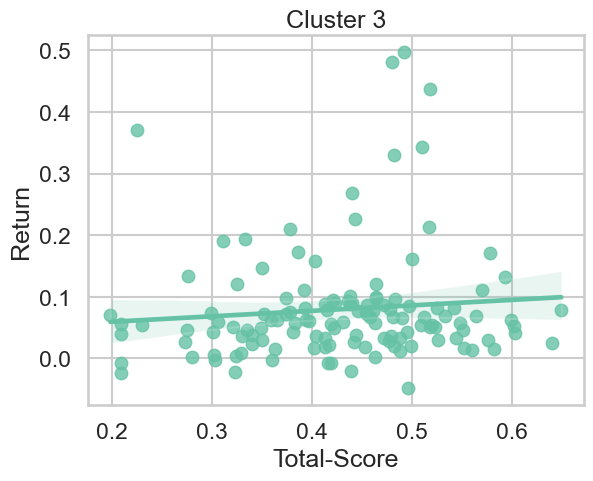

(129, 7)
Total-Score    0.421763
E-Score        0.343438
S-Score        0.279698
G-Score        0.306664
Adj Close      0.056071
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


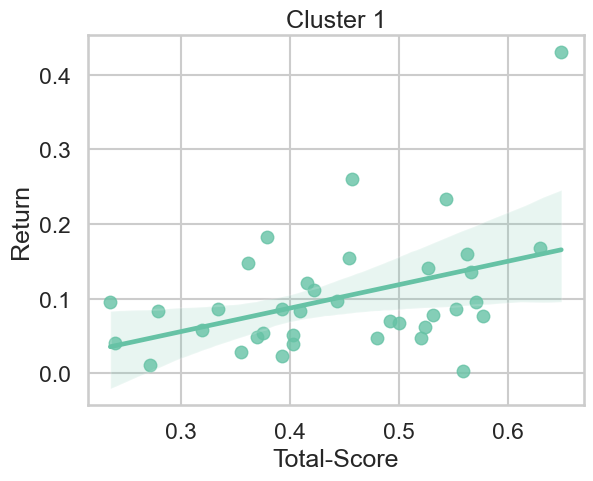

(37, 7)
Total-Score   -0.402312
E-Score        0.608238
S-Score       -0.981260
G-Score       -0.789108
Adj Close      0.977016
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


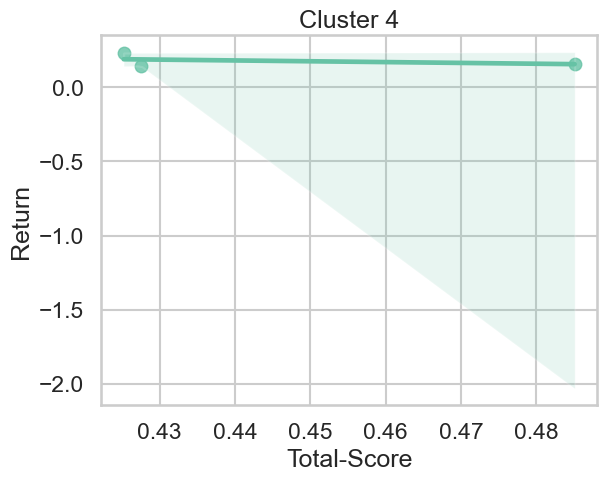

(3, 7)
Total-Score   NaN
E-Score       NaN
S-Score       NaN
G-Score       NaN
Adj Close     NaN
Cluster       NaN
Return        NaN
Name: Return, dtype: float64


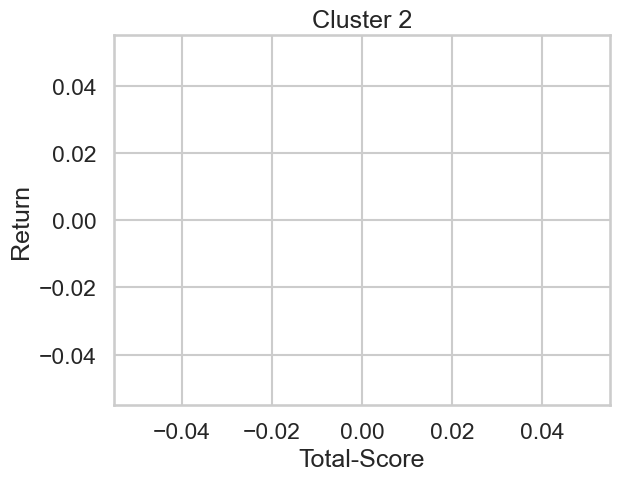

(0, 7)


In [69]:
#now make a monthly mean with return and ESG Score
df_companys_mean_monthly = df_companys_new.copy()

df_companys_mean_monthly["Date_"] = df_companys_mean_monthly.index
df_companys_mean_monthly.sort_values(by=["Company", "Date_"], inplace=True)
#group by company and year and get the mean of the Adj Close Price
df_companys_mean_monthly = df_companys_mean_monthly.groupby(["Company", df_companys_mean_monthly["Date_"].dt.year, df_companys_mean_monthly["Date_"].dt.month]).mean()
#add the return
df_companys_mean_monthly["Return"] = df_companys_mean_monthly["Adj Close"].pct_change()
#get the average yearly return for each company
df_companys_mean_monthly = df_companys_mean_monthly.groupby("Company").mean()
#visualize the data "Total-Score", "Return" as the x and y axis and color the points by cluster
#only between -1 and 1 for return
df_companys_mean_monthly = df_companys_mean_monthly[(df_companys_mean_monthly["Return"] > -1) & (df_companys_mean_monthly["Return"] < 1)]
sns.scatterplot(data=df_companys_mean_monthly, x="Total-Score", y="Return", hue="Cluster")
plt.show()

#now add a linear regression line for each cluster
for cluster_number in df_companys_new["Cluster"].unique():

    sns.regplot(data=df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number], x="Total-Score", y="Return")
    plt.title("Cluster " + str(cluster_number))
    #print the correlation matrix
    print(df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number].corr()["Return"])
    plt.show()
    plt.close()
    print(df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number].shape)
#now add a linear regression line for each cluster




Total-Score    0.010703
E-Score       -0.068580
S-Score        0.072740
G-Score        0.046068
Adj Close      0.376976
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


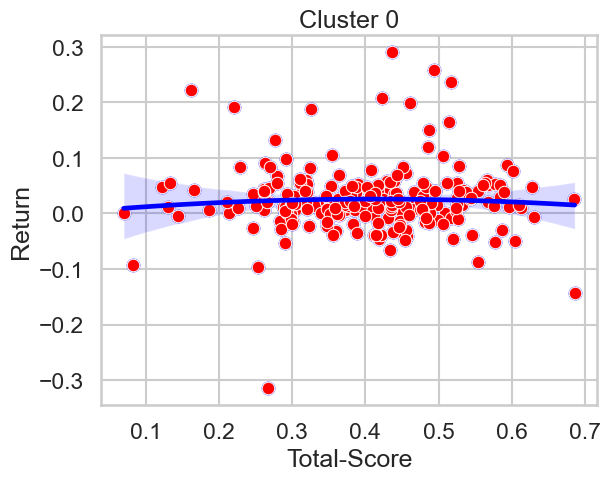

(245, 7)
Total-Score    0.096162
E-Score        0.057166
S-Score        0.146497
G-Score       -0.034625
Adj Close      0.228803
Cluster             NaN
Return         1.000000
Name: Return, dtype: float64


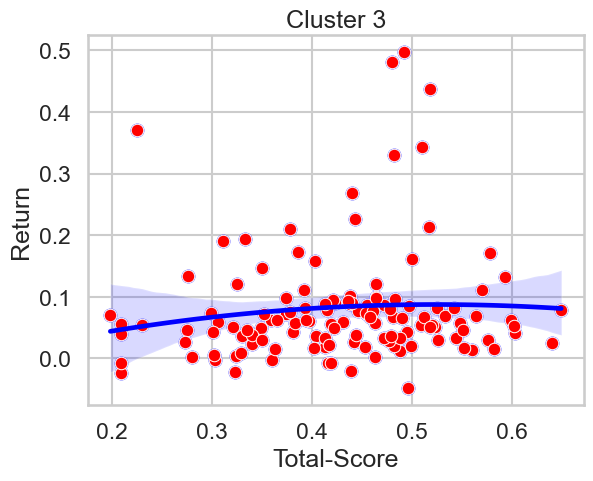

(129, 7)
Cluster 1 has less than 500 points
Cluster 4 has less than 500 points
Cluster 2 has less than 500 points


In [70]:
#now add a polynom regression line for each cluster
for cluster_number in df_companys_new["Cluster"].unique():
    #change color of the points
    #only if more than 500 points
    if df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number].shape[0] > 100:
        sns.regplot(data=df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number], x="Total-Score", y="Return", order=2, color="blue")
        sns.scatterplot(data=df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number], x="Total-Score", y="Return", color="red")
        plt.title("Cluster " + str(cluster_number))
        #print the correlation matrix
        print(df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number].corr()["Return"])
        plt.show()
        plt.close()
        print(df_companys_mean_monthly[df_companys_mean_monthly["Cluster"] == cluster_number].shape)
    else:   
        print("Cluster " + str(cluster_number) + " has less than 500 points")


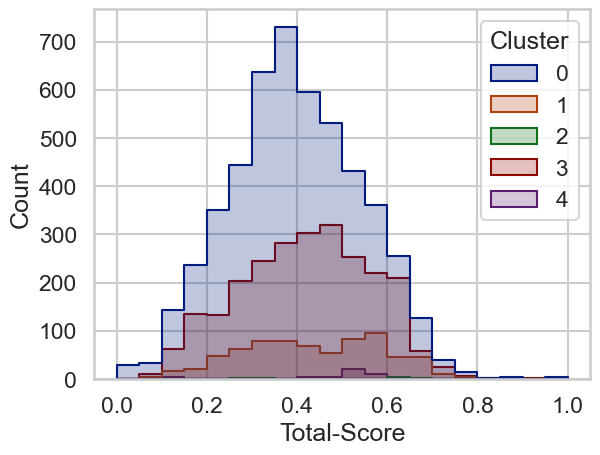

In [71]:
#get a histogram Total-Score
#use strong colors  
sns.histplot(data=df_companys_new, x="Total-Score", hue="Cluster", bins=20, palette="dark", element="step")
plt.show()
#get a histogram Total-Score


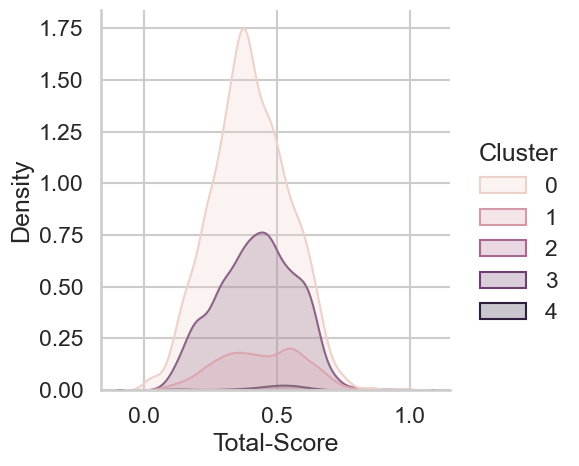

In [72]:
#now a distribution plot
sns.displot(data=df_companys_new, x="Total-Score", hue="Cluster", kind="kde", fill=True)
plt.show()


That looks OK, lets work with cluster 5 (4)

In [73]:
df_working = df_companys_new[df_companys_new["Cluster"] == 4].copy()


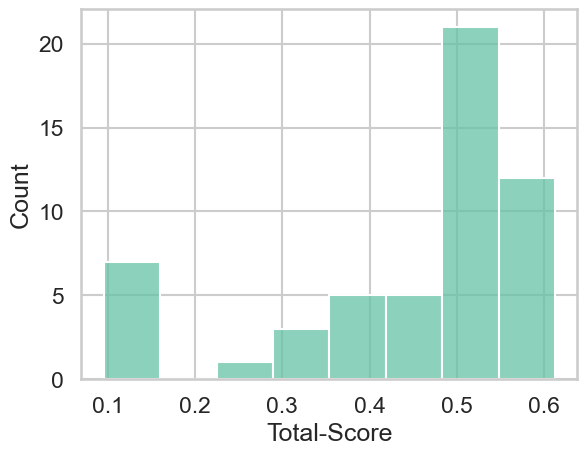

In [74]:
#get a histogram Total-Score
sns.histplot(data=df_working, x="Total-Score")
plt.show()
#get a histogram Total-Score


<AxesSubplot: xlabel='Total-Score', ylabel='Density'>

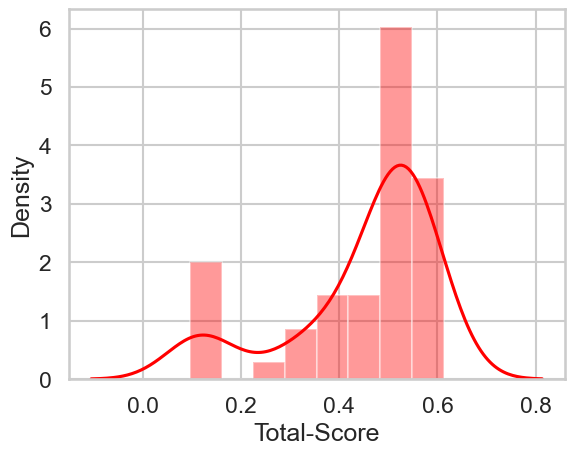

In [75]:
#get a histogram Total-Score
sns.distplot(df_working["Total-Score"],color="red")
#get a histogram Total-Score


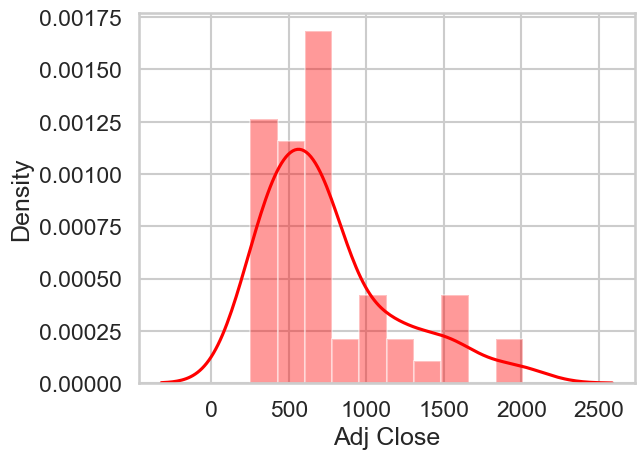

In [76]:
#now for the Adj Close Price
sns.distplot(df_working["Adj Close"],color="red")
plt.show()


In [77]:
#scale the Adj Close Price but for every company
df_working["Adj Close"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

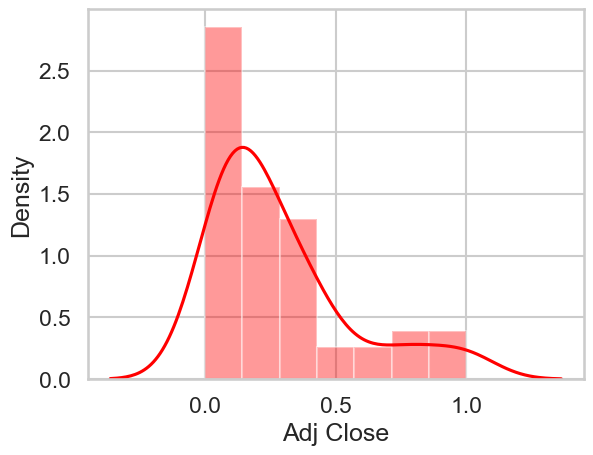

In [78]:
#now for the Adj Close Price
sns.distplot(df_working["Adj Close"],color="red")
plt.show()


In [79]:
df_working["Year"] = df_working.index.year


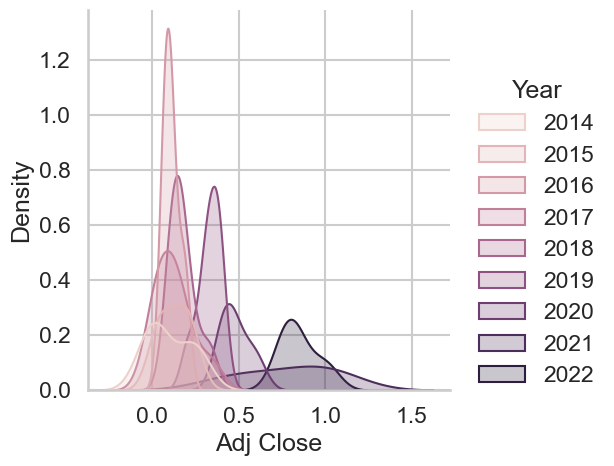

In [80]:
#show distribution of the Adj Close Price for every year
sns.displot(data=df_working, x="Adj Close", hue="Year", kind="kde", fill=True)
plt.show()


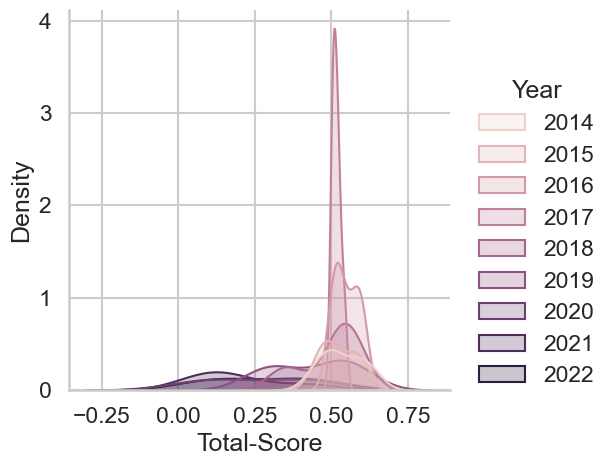

In [81]:
#show distribution of the Adj Close Price for every year
sns.displot(data=df_working, x="Total-Score", hue="Year", kind="kde", fill=True)
plt.show()


In [82]:
#add a column with the unscaled Adj Close Price from df_companys_new (based on company and date)
df_working["Adj Close_"] = df_companys_new[df_companys_new["Cluster"] == 4]["Adj Close"]

In [83]:
df_working["Adj Close Scaled"] = df_working["Adj Close"]
df_working["Adj Close"] = df_working["Adj Close_"]

In [84]:
df_working


Total-Score   E-Score   S-Score   G-Score Company    Adj Close  \
Date                                                                         
2014-10-01     0.503495  0.598991  0.418740  0.318994     AZO   508.010010   
2015-09-01     0.503495  0.598991  0.406603  0.330527     AZO   714.369995   
2016-02-01     0.508311  0.603705  0.401991  0.328797     AZO   768.549988   
2016-04-01     0.560510  0.603705  0.503823  0.328797     AZO   805.400024   
2017-02-01     0.541246  0.566104  0.502731  0.328797     AZO   714.989990   
2017-11-01     0.526798  0.548893  0.480519  0.344943     AZO   584.880005   
2018-02-01     0.555072  0.600526  0.501032  0.321878     AZO   764.380005   
2018-10-01     0.567966  0.600526  0.529797  0.316111     AZO   770.349976   
2018-11-01     0.547615  0.572353  0.519723  0.312651     AZO   745.869995   
2019-07-01     0.563151  0.603705  0.519723  0.312651     AZO  1098.790039   
2019-10-01     0.560043  0.603705  0.519723  0.303425     AZO  1083.670044   
2020-07-01     0.119560  0.003116  0.331749  0.052752     AZO  1130.479980   
2021-02-01     0.121473  0.003116  0.331749  0.058869     AZO  1159.329956   
2021-09-01     0.095887  0.001558  0.286597  0.053517     AZO  1540.089966   
2022-02-01     0.104017  0.001558  0.286597  0.079511     AZO  2011.569946   
2014-10-01     0.456890  0.533216  0.394465  0.284396     CMG   662.229980   
2014-12-01     0.503495  0.555141  0.406603  0.353592     CMG   660.880005   
2015-04-01     0.472425  0.533216  0.394465  0.318994     CMG   652.530029   
2015-12-01     0.472425  0.522254  0.455152  0.261331     CMG   580.739990   
2016-02-01     0.513283  0.525652  0.504187  0.299965     CMG   472.640015   
2016-04-01     0.543576  0.525543  0.572035  0.299965     CMG   464.809998   
2016-09-01     0.519497  0.525543  0.518145  0.299965     CMG   414.679993   
2016-12-01     0.504738  0.525543  0.518145  0.256141     CMG   402.380005   
2017-02-01     0.509243  0.533655  0.518145  0.256141     CMG   420.230011   
2017-09-01     0.501010  0.508770  0.518145  0.273440     CMG   319.950012   
2017-11-01     0.505204  0.509209  0.499211  0.310345     CMG   270.200012   
2018-08-01     0.536119  0.531791  0.528341  0.325337     CMG   442.630005   
2018-10-01     0.529284  0.519733  0.528341  0.325337     CMG   446.970001   
2018-11-01     0.527730  0.519733  0.528341  0.320724     CMG   472.619995   
2019-03-01     0.534566  0.531791  0.528341  0.320724     CMG   611.630005   
2019-11-01     0.480193  0.387854  0.528341  0.401453     CMG   768.630005   
2020-07-01     0.424438  0.146864  0.648289  0.237003     CMG  1068.359985   
2020-10-01     0.414634  0.146864  0.648289  0.205657     CMG  1238.020020   
2021-09-01     0.412243  0.189716  0.613593  0.170489     CMG  1898.339966   
2022-02-01     0.414395  0.195559  0.613593  0.165902     CMG  1512.449951   
2022-08-01     0.411286  0.213868  0.585076  0.165138     CMG  1557.380005   
2014-10-01     0.612242  0.303004  0.673625  0.480452     MTD   251.789993   
2014-12-01     0.596707  0.313966  0.673625  0.480452     MTD   292.040009   
2015-04-01     0.581171  0.270116  0.673625  0.480452     MTD   325.089996   
2015-10-01     0.581171  0.281079  0.673625  0.480452     MTD   284.190002   
2016-02-01     0.593600  0.320763  0.661124  0.492446     MTD   317.320007   
2016-04-01     0.596085  0.320763  0.665372  0.492331     MTD   349.899994   
2016-06-01     0.589250  0.320763  0.665372  0.475378     MTD   375.940002   
2017-02-01     0.519031  0.333808  0.616701  0.359474     MTD   435.500000   
2017-05-01     0.516234  0.333808  0.616701  0.352670     MTD   513.710022   
2017-11-01     0.502874  0.262333  0.608448  0.394072     MTD   689.109985   
2018-02-01     0.348144  0.180553  0.491929  0.249106     MTD   684.109985   
2018-11-01     0.354513  0.180553  0.491929  0.264560     MTD   559.690002   
2019-02-01     0.320336  0.186692  0.417648  0.280590     MTD   642.820007   
2019-03-01     0.315675  0.186692 

The Companys in this cluster actually loose ESG Points, wich make sense since in this methodollogy a smaller 
ESG Score is better

In [85]:
#make a regression for the Adj Close Price based on the ESG Score
import statsmodels.api as sm
import statsmodels.formula.api as smf

#add a constant to the model
df_working["const"] = 1
#make the model
model = sm.OLS(df_working["Adj Close"], df_working[["const", "ESG Score"]])
#fit the model
results = model.fit()
#show the results
print(results.summary())

KeyError: "['ESG Score'] not in index"

In [ ]:
#rename the columns Total-Score to ESG Score
df_working.rename(columns={"Total-Score": "ESG Score"}, inplace=True)

In [ ]:
df_working

In [ ]:
#now try polynom regression
df_working["ESG Score^2"] = df_working["ESG Score"] ** 2
#add a constant to the model
df_working["ESG Score^3"] = df_working["ESG Score"] ** 3
#make the model
model = sm.OLS(df_working["Adj Close"], df_working[["const", "ESG Score", "ESG Score^2", "ESG Score^3"]])
#fit the model
results = model.fit()
#show the results
print(results.summary())



In [ ]:
#append a column with the oldest price for every company
df_working["Oldest Price"] = df_companys_new[df_companys_new["Cluster"] == 4].groupby("Company")["Adj Close"].transform("min")

#remove the rows with the oldest price
df_working = df_working[df_working["Adj Close"] != df_working["Oldest Price"]]
df_working

In [ ]:
#make a regression for the Adj Close Price based on the ESG Score and the oldest price
import statsmodels.api as sm
import statsmodels.formula.api as smf

#add a constant to the model
df_working["const"] = 1
#make the model
model = sm.OLS(df_working["Adj Close"], df_working[["const", "ESG Score","ESG Score^2", "ESG Score^3", "Oldest Price"]])
#fit the model
results = model.fit()
#show the results
print(results.summary())


In [ ]:
#add a column with the predicted Adj Close Price
df_working["Predicted Adj Close"] = results.predict(df_working[["const", "ESG Score","ESG Score^2", "ESG Score^3", "Oldest Price"]])
#calculate the difference between the predicted and the actual Adj Close Price
df_working["Difference"] = df_working["Predicted Adj Close"] - df_working["Adj Close"]
#show the difference
df_working["Difference"].describe()


In [ ]:
#calculate the percentage difference between the predicted and the actual Adj Close Price
df_working["Percentage Difference"] = df_working["Difference"] / df_working["Adj Close"] * 100
#show the percentage difference
df_working["Percentage Difference"].describe()


In [ ]:
sns.distplot(df_working["Percentage Difference"],color="red", bins=120)

Again loogs like a Poisson distribution

Now try to predict the ESG based on the performance

In [ ]:
#regression for ESG Score based on past Adj Close Prices
#add a constant to the model
df_working = df_companys_new.copy()
df_working.rename(columns={"Total-Score": "ESG Score"}, inplace=True)
df_working["ESG Score^2"] = df_working["ESG Score"] ** 2
df_working["ESG Score^3"] = df_working["ESG Score"] ** 3
#add a row with the last Last 5 Adj Close Prices,add a NaN if there are less than 10 Adj Close Prices
df_working["Last Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1))
df_working["Last 2 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(2))
df_working["Last 3 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(3))
df_working["Last 4 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(4))
df_working["Last 5 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(5))
df_working["Oldest Price"] = df_working.groupby("Company")["Adj Close"].transform("min")
#Also add the last ESG Scores
df_working["Last ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(1))
df_working["Last 2 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(2))
df_working["Last 3 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(3))
df_working["Last 4 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(4))
df_working["Last 5 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(5))
df_working.dropna(inplace=True)


#Now predict the Adj Close Price based on the last 5 Adj Close Prices and the ESG Score

#add a constant to the model
df_working["const"] = 1
#make the model
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price"]])
#fit the model
results = model.fit()
#show the results
print("Model without ESG Score")
print(results.summary())
#now add the ESG Score
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price", "ESG Score"]])
#fit the model
results = model.fit()
#show the results
print("Model with ESG Score")
print(results.summary())
#now add the polynomial ESG Score
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price", "ESG Score", "ESG Score^2", "ESG Score^3"]])
#fit the model
results = model.fit()
#show the results
print("Model with ESG Score and ESG Score^2")

#now add the historical ESG Scores
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price", "Last ESG Score", "Last 2 ESG Score", "Last 3 ESG Score", "Last 4 ESG Score", "Last 5 ESG Score"]])
#fit the mode
results = model.fit()
#show the results
print("Model with ESG Score and ESG Score^2")
print(results.summary())
#now only all the ESG Data and only the oldest Adj Close Price
model = sm.OLS(df_working["Adj Close"], df_working[["const","Oldest Price", "Last ESG Score", "Last 2 ESG Score", "Last 3 ESG Score", "Last 4 ESG Score", "Last 5 ESG Score"]])
#fit the mode
results = model.fit()
#show the results
print("Model with only ESG Score and only the oldest Adj Close Price")
print(results.summary())
#now only all the ESG Data 
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last ESG Score", "Last 2 ESG Score", "Last 3 ESG Score", "Last 4 ESG Score", "Last 5 ESG Score"]])
#fit the mode
results = model.fit()
#show the results
print("Model with only ESG Score")
print(results.summary())
#now only the oldest Adj Close Price
model = sm.OLS(df_working["Adj Close"], df_working[["const","Oldest Price"]])
#fit the mode
results = model.fit()
#show the results
print("Model with only the oldest Adj Close Price")
print(results.summary())



In [ ]:
#regression for ESG Score based on past Adj Close Prices
#add a constant to the model

#add a row with the last Last 5 Adj Close Prices,add a NaN if there are less than 10 Adj Close Prices
df_working["Last Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1))
df_working["Last 2 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(2))
df_working["Last 3 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(3))
df_working["Last 4 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(4))
df_working["Last 5 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(5))
df_working.dropna(inplace=True)
#Now predict the Adj Close Price based on the last 5 Adj Close Prices and the ESG Score

#add a constant to the model
df_working["const"] = 1
#make the model
model = sm.OLS(df_working["Adj Close"], df_working[["const", "Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price"]])
#fit the model
results = model.fit()
#show the results
print(results.summary())

In [ ]:
#now lets focus on the after data 
df_working = df_after.copy()

In [ ]:
#regression for ESG Score based on past Adj Close Prices
#add a constant to the model
df_working.rename(columns={"Total-Score": "ESG Score"}, inplace=True)
df_working["ESG Score^2"] = df_working["ESG Score"] ** 2
df_working["ESG Score^3"] = df_working["ESG Score"] ** 3
#add a row with the last Last 5 Adj Close Prices,add a NaN if there are less than 10 Adj Close Prices
df_working["Last Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1))
df_working["Last 2 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(2))
df_working["Last 3 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(3))
df_working["Last 4 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(4))
df_working["Last 5 Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(5))
df_working["Oldest Price"] = df_working.groupby("Company")["Adj Close"].transform("min")
#Also add the last ESG Scores
df_working["Last ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(1))
df_working["Last 2 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(2))
df_working["Last 3 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(3))
df_working["Last 4 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(4))
df_working["Last 5 ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(5))
df_working.dropna(inplace=True)


#Now predict the Adj Close Price based on the last 5 Adj Close Prices and the ESG Score

#add a constant to the model
df_working["const"] = 1
#make the model
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price"]])
#fit the model
results = model.fit()
#show the results
print("Model without ESG Score")
print(results.summary())
#now add the ESG Score
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price", "ESG Score"]])
#fit the model
results = model.fit()
#show the results
print("Model with ESG Score")
print(results.summary())
#now add the polynomial ESG Score
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price", "ESG Score", "ESG Score^2", "ESG Score^3"]])
#fit the model
results = model.fit()
#show the results
print("Model with ESG Score and ESG Score^2")

#now add the historical ESG Scores
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last Stock Price", "Last 2 Stock Price", "Last 3 Stock Price", "Last 4 Stock Price", "Last 5 Stock Price", "Last ESG Score", "Last 2 ESG Score", "Last 3 ESG Score", "Last 4 ESG Score", "Last 5 ESG Score"]])
#fit the mode
results = model.fit()
#show the results
print("Model with ESG Score and ESG Score^2")
print(results.summary())
#now only all the ESG Data and only the oldest Adj Close Price
model = sm.OLS(df_working["Adj Close"], df_working[["const","Oldest Price", "Last ESG Score", "Last 2 ESG Score", "Last 3 ESG Score", "Last 4 ESG Score", "Last 5 ESG Score"]])
#fit the mode
results = model.fit()
#show the results
print("Model with only ESG Score and only the oldest Adj Close Price")
print(results.summary())
#now only all the ESG Data 
model = sm.OLS(df_working["Adj Close"], df_working[["const","Last ESG Score", "Last 2 ESG Score", "Last 3 ESG Score", "Last 4 ESG Score", "Last 5 ESG Score"]])
#fit the mode
results = model.fit()
#show the results
print("Model with only ESG Score")
print(results.summary())
#now only the oldest Adj Close Price
model = sm.OLS(df_working["Adj Close"], df_working[["const","Oldest Price"]])
#fit the mode
results = model.fit()
#show the results
print("Model with only the oldest Adj Close Price")
print(results.summary())



In [ ]:
df_working = df_companys_new.copy()
df_working = df_working[df_working["Cluster"] == 4]
df_working.sort_values(by=["Company", "Date"], inplace=True)
df_working["ESG Score"] = df_working["Total-Score"]
#try to predict the ESG Score based on the Adj Close Price
#add a constant to the model
df_working["const"] = 1
#make the model
#scale the Adj Close Price for every company
df_working["Adj Close"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x / x.max())
#add the last Adj Close Price
df_working["Last Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1))
#add the next Adj Close Price (if there is one)
df_working["Next Stock Price"] = df_working.groupby("Company")["Adj Close"].transform(lambda x: x.shift(-1))
#add the last ESG Score
df_working["Last ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(1))
#add the next ESG Score (if there is one)
df_working["Next ESG Score"] = df_working.groupby("Company")["ESG Score"].transform(lambda x: x.shift(-1))
df_working.dropna(inplace=True)
#remove ESG Scores where ESG Score is the same as the next ESG Score or the last ESG Score
df_working = df_working[df_working["ESG Score"] != df_working["Next ESG Score"]]
df_working = df_working[df_working["ESG Score"] != df_working["Last ESG Score"]]
#scale the ESG Score for every company
model = sm.OLS(df_working["ESG Score"], df_working[["const","Last Stock Price", "Next Stock Price", "Last ESG Score", "Next ESG Score"]])
#fit the model
results = model.fit()
#show the results
print(results.summary())



In [ ]:
#add a predicted column
df_working["Predicted ESG Score"] = results.predict(df_working[["const","Last Stock Price", "Next Stock Price", "Last ESG Score", "Next ESG Score"]])
#calculate the difference between the predicted ESG Score and the actual ESG Score
df_working["Difference"] = df_working["Predicted ESG Score"] - df_working["ESG Score"]


In [ ]:
sns.displot(df_working, x="Difference", kind="kde", fill=True, common_norm=False, height=10, aspect=1.5)

In [ ]:
#male the plot bigger
plt.figure(figsize=(20,10))
sns.histplot(data=df_working, x="Difference", bins=100, kde=True,fill=True)
#add mean and median
plt.axvline(df_working["Difference"].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_working["Difference"].median(), color='g', linestyle='dashed', linewidth=2)
#add standard deviation
plt.axvline(df_working["Difference"].mean() + df_working["Difference"].std(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_working["Difference"].mean() - df_working["Difference"].std(), color='r', linestyle='dashed', linewidth=1)


In [ ]:
#get the rows per company
df_working["Date_"] = df_working.index
df_working.groupby("Company").count()["Date_"].sort_values(ascending=False)

In [ ]:
df_working[df_working["Company"] == "CLX"]

In [ ]:
#make for 10 random companies a plot with the real ESG Score and the predicted ESG Score
for i in range(10):
    #get a random company
    company = df_working["Company"].sample(1).values[0]
    #get the data for the company
    df_company = df_working[df_working["Company"] == company]
    #make the plot
    plt.figure(figsize=(20,10))
    plt.plot(df_company["Date_"], df_company["ESG Score"], label="Real ESG Score")
    plt.plot(df_company["Date_"], df_company["Predicted ESG Score"], label="Predicted ESG Score")
    plt.legend()
    plt.title(company)
    plt.show()
    plt.close()

In [ ]:
list_companies = df_working["Company"].unique()

Data Generation

In [ ]:
#get a dataframe for ever company
#it should have as much ESG Data from the df_working as possible
#the other rows should be filled with the last ESG Score or the next ESG Score
import yfinance as yf
import datetime
df_companys_new = pd.DataFrame()
today_date = datetime.datetime.today()
for company in list_companies:
    df_company = yf.download(company, start="2015-01-01", end=today_date, show_errors=False, progress=False)
    df_company["Original"] = True 
    #add the ESG Data from the df_working if there is any  fill the other rows with the last ESG Score or the next ESG Score
    #if there is  original ESG Data for the company, fill the "Original" column with True otherwise with False
    df_company = df_company.merge(df_working[df_working["Company"] == company][["ESG Score", "Date_"]], how="left", left_index=True, right_on="Date")
    df_company["ESG Score"].fillna(method="ffill", inplace=True)   
    df_company["ESG Score"].fillna(method="bfill", inplace=True)
    df_company["Original"].fillna(False, inplace=True)
    df_company["Company"] = company
    df_companys_new = df_companys_new.append(df_company)
df_companys_new.dropna(inplace=True)
df_companys_new.sort_index(inplace=True)   

#add the last Adj Close Price
df_companys_new["Last Stock Price"] = df_companys_new.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1))
#add the next Adj Close Price (if there is one)
df_companys_new["Next Stock Price"] = df_companys_new.groupby("Company")["Adj Close"].transform(lambda x: x.shift(-1))
#add the last ESG Score
df_companys_new["Last ESG Score"] = df_companys_new.groupby("Company")["ESG Score"].transform(lambda x: x.shift(1))
#add the next ESG Score (if there is one)
df_companys_new["Next ESG Score"] = df_companys_new.groupby("Company")["ESG Score"].transform(lambda x: x.shift(-1))

In [ ]:
df_companys_new.isna().sum()/df_companys_new.shape[0]

In [ ]:
df_companys_new.sort_values(by=["Company", "Date"], inplace=True)
#fill with the Next ESG Score if there is no Last ESG Score with mean ESG Score of the company
df_companys_new["Last ESG Score"].fillna(df_companys_new.groupby("Company")["ESG Score"].transform("mean"), inplace=True)
#fill with the Last ESG Score if there is no Next ESG Score with mean ESG Score of the company 
df_companys_new["Next ESG Score"].fillna(df_companys_new.groupby("Company")["ESG Score"].transform("mean"), inplace=True)
df_companys_new.dropna(inplace=True)
df_companys_new.sort_values(by=["Company", "Date"], inplace=True)

In [ ]:
df_companys_new["Original"].value_counts()

In [ ]:
import yfinance as yf
import pandas as pd
import datetime

df_companies_new = pd.DataFrame()
today_date = datetime.datetime.today()
for company in list_companies:
    df_company = yf.download(company, start="2015-01-01", end=today_date, show_errors=False, progress=False)
    df_company["Original"] = False 
    #add the ESG Data from the df_working if there is any  fill the other rows with the last ESG Score or the next ESG Score
    #if there is original ESG Data for the company, fill the "Original" column with True otherwise with False
    df_esg = df_working[df_working["Company"] == company][["ESG Score", "Date_"]].rename(columns={"Date_": "Date__"})
    df_companys.rename(columns={"Date_": "Date__"}, inplace=True)
    df_company = df_company.merge(df_esg, how="left", left_index=True, right_on="Date__")
    df_company["ESG Score"].fillna(method="ffill", inplace=True)   
    df_company["ESG Score"].fillna(method="bfill", inplace=True)
    df_company.loc[df_company["Date__"].isin(df_esg["Date__"]), "Original"] = True
    df_company["Company"] = company
    df_companies_new = df_companies_new.append(df_company)
df_companies_new.dropna(inplace=True)
df_companies_new.sort_index(inplace=True)   

#add the last Adj Close Price
df_companies_new["Last Stock Price"] = df_companies_new.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1))
#add the next Adj Close Price (if there is one)
df_companies_new["Next Stock Price"] = df_companies_new.groupby("Company")["Adj Close"].transform(lambda x: x.shift(-1))
#add the last ESG Score
df_companies_new["Last ESG Score"] = df_companies_new.groupby("Company")["ESG Score"].transform(lambda x: x.shift(1))
#add the next ESG Score (if there is one)
df_companies_new["Next ESG Score"] = df_companies_new.groupby("Company")["ESG Score"].transform(lambda x: x.shift(-1))


In [ ]:
df_companys_new["Original"].value_counts()

In [ ]:
df_companys_new.isna().sum()/df_companys_new.shape[0]

In [ ]:
#get the size of the rows per company
df_companys_new.groupby("Company").size()

In [ ]:
df_companys_sicherheitskopie = df_companys_new.copy()

In [ ]:
#for every month from 2015-01-01 to today_date get the Adj Close Price of the company
#then fill the missing months, add a row with Original = False, get the data from yahoo
#add the last Adj Close Price   
import yfinance as yf
import datetime
df_companies_new = df_companys_new.copy()
date_today =  datetime.datetime.today()
#get a list of all months from 2015-01-01 to today_date
list_months = pd.date_range(start="2015-01-01", end=date_today, freq="MS").strftime("%Y-%m").tolist()
for company_name in df_companies_new["Company"].unique():
    df_stock_data = yf.download(company_name, start="2015-01-01", end=date_today, show_errors=False, progress=False)
    df_stock_data["Original"] = False
    df_stock_data["Company"] = company_name
    print(df_stock_data.shape)
    df_companies_new = df_companies_new.append(df_stock_data)

    
    
    

In [ ]:
df_companies_new.drop(columns=["Date_"], inplace=True)
df_companies_new.drop(columns=["Date"], inplace=True)


In [ ]:
df_companies_new.isna().sum()/df_companies_new.shape[0]

In [ ]:
#fill the Last Stock Price with previous Adj Close Price from the same company
df_companies_new["Last Stock Price"].fillna(df_companies_new.groupby("Company")["Adj Close"].transform(lambda x: x.shift(1)), inplace=True)
#fill the Next Stock Price with next Adj Close Price from the same company
df_companies_new["Next Stock Price"].fillna(df_companies_new.groupby("Company")["Adj Close"].transform(lambda x: x.shift(-1)), inplace=True)


In [ ]:
df_companies_new.isna().sum()/df_companies_new.shape[0]

In [ ]:
#fill the Missing Next Stock Price with the actual Adj Close Price from the same company
df_companies_new["Next Stock Price"].fillna(df_companies_new["Adj Close"], inplace=True)
df_companies_new.isna().sum()/df_companies_new.shape[0]

In [ ]:
#fill the Missing values of the Next ESG Score with the interpolated ESG Score from the same company
df_companies_new["Next ESG Score"].fillna(df_companies_new.groupby("Company")["ESG Score"].transform(lambda x: x.interpolate()), inplace=True)
df_companies_new.isna().sum()/df_companies_new.shape[0]


In [ ]:
#fill the Missing values of the Last ESG Score with the interpolated ESG Score from the same company    
df_companies_new["Last ESG Score"].fillna(df_companies_new.groupby("Company")["ESG Score"].transform(lambda x: x.interpolate()), inplace=True)
df_companies_new.isna().sum()/df_companies_new.shape[0]


In [ ]:
#train a linear regression model for every company to predict the ESG Score based on the Adj Close Price and the first ESG Score   
#use only Values with Original = True
import statsmodels.api as sm
train_data = df_companies_new[df_companies_new["Original"] == True]
train_data["ESG Score"] = train_data["ESG Score"].astype(float)
train_data["Adj Close"] = train_data["Adj Close"].astype(float)
#get the first available ESG Score for every company and add it to the train_data
train_data["First ESG Score"] = train_data.groupby("Company")["ESG Score"].transform(lambda x: x.iloc[0])
train_data["First ESG Score"] = train_data["First ESG Score"].astype(float)
#train the model
model = sm.OLS(train_data["ESG Score"], train_data[["Adj Close", "First ESG Score"]]).fit()
#get the the results
model.summary()

In [ ]:
#apply on the values with Original = False  
df_companies_new["ESG Score"] = df_companies_new["ESG Score"].astype(float)
df_companies_new["Adj Close"] = df_companies_new["Adj Close"].astype(float)
df_companies_new["First ESG Score"] = df_companies_new.groupby("Company")["ESG Score"].transform(lambda x: x.iloc[0])
df_companies_new["First ESG Score"] = df_companies_new["First ESG Score"].astype(float)
df_companies_new["Predicted ESG Score"] = model.predict(df_companies_new[["Adj Close", "First ESG Score"]])
df_companies_new["Predicted ESG Score"] = df_companies_new["Predicted ESG Score"].astype(float)


In [ ]:
model.summary()

In [ ]:
df_companies_new.loc[df_companies_new["Original"] == False, "ESG Score"] = df_companies_new[df_companies_new["Original"] == False]["Predicted ESG Score"]


In [ ]:
#get the distribution of the Error between the Predicted ESG Score and the ESG Score   
df_companies_new["Error"] = df_companies_new["ESG Score"] - df_companies_new["Predicted ESG Score"]
df_companies_new[df_companies_new["Original"]==True]["Error"].hist(bins=100)


This is definitly normal distributed, but with a slighly shift on the right

In [ ]:
df_companies_new[df_companies_new["Original"]==True]["Error"].mean()

In [ ]:
df_companies_new["Predicted ESG Score"] = df_companies_new["Predicted ESG Score"] + df_companies_new[df_companies_new["Original"]==True]["Error"].mean()

In [ ]:
df_companies_new["Error"] = df_companies_new["ESG Score"] - df_companies_new["Predicted ESG Score"]
df_companies_new[df_companies_new["Original"]==True]["Error"].hist(bins=100)

In [ ]:
df_companies_new[df_companies_new["Original"]==True]["Error"].mean()

In [ ]:
#plot the distribution of the ESG Score with Original = True and Original = False in the same plot
#Use the Original as hue
sns.displot(data=df_companies_new, x="ESG Score", hue="Original", kind="kde")

In [ ]:
#now plot them as two different plots, bit with relative distribution for both groups
#use the Original as hue
sns.displot(data=df_companies_new, x="ESG Score", hue="Original", kind="kde", common_norm=False)

In [ ]:
df_companies_new.isna().sum()/df_companies_new.shape[0]

In [ ]:
df_companies_new[df_companies_new["Original"]==True].isna().sum()/df_companies_new[df_companies_new["Original"]==True].shape[0]

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Heteroscedasticity Test
def heteroscedasticity_test(data, columns):
    # White's test
    name = ['Lagrange multiplier statistic', 'p-value',
            'f-value', 'f p-value']
    test = sms.het_breuschpagan(data.resid, data[columns])
    return dict(zip(name, test))

# Normality Test
def normality_test(data, columns):
    # Shapiro-Wilk test
    stat, p = shapiro(data.resid)
    result = {'statistic': stat, 'p-value': p}
    # Interpret
    alpha = 0.05
    if p > alpha:
        result['interpretation'] = 'Sample looks Gaussian (fail to reject H0)'
    else:
        result['interpretation'] = 'Sample does not look Gaussian (reject H0)'
    return result

# Autocorrelation Test
def autocorrelation_test(data, columns):
    # Durbin-Watson test
    stat = sm.stats.stattools.durbin_watson(data.resid)
    result = {'statistic': stat}
    # Interpret
    if stat < 2:
        result['interpretation'] = 'Autocorrelation present (reject H0)'
    elif stat > 2:
        result['interpretation'] = 'No autocorrelation present (fail to reject H0)'
    else:
        result['interpretation'] = 'Close to zero autocorrelation'
    return result

# Multicollinearity Test
def multicollinearity_test(data, columns):
    # Variance Inflation Factor (VIF) test
    vif = [variance_inflation_factor(data[columns].values, i) for i in range(len(columns))]
    result = {'VIF': dict(zip(columns, vif))}
    # Interpret
    for i, value in enumerate(vif):
        if value >= 10:
            result[columns[i]] = 'High collinearity present'
        else:
            result[columns[i]] = 'Low collinearity present'
    return result

# Linearity Test
def linearity_test(data, columns):
    # Plot residuals vs. fitted values
    fig, ax = plt.subplots()
    sns.residplot(data.fittedvalues, data.resid, lowess=True, color="g", ax=ax)
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    return fig

# Outlier Test
def outlier_test(data, columns):
    # Z-Score method
    z = np.abs(zscore(data[columns]))
    result = {'Z-Score': dict(zip(columns, z))}
    # Interpret
    threshold = 3
    for column in columns:
        outliers = np.where(z[column] > threshold)[0]
        if len(outliers) == 0:
            result[column] = 'No outliers'
        else:
            result[column] = 'Outliers: ' + str(outliers)
    return result

def run_all_tests(data, columns):
    results = {}
    model = sm.OLS(data['target'], data[columns])
    fitted_model = model.fit()
    results['Heteroscedasticity Test'] = heteroscedasticity_test(fitted_model)
    results['Normality Test'] = normality_test(fitted_model)
    results['Autocorrelation Test'] = autocorrelation_test(fitted_model)
    results['Multicollinearity Test'] = multicollinearity_test(fitted_model)
    results['Linearity Test'] = linearity_test(fitted_model)
    results['Outlier Test'] = outlier_test(fitted_model)
    return results



In [ ]:
df_original = df_companies_new[df_companies_new["Original"]==True]
#fit the regression model to test for the assumptions
df_original["target"] = df_original["ESG Score"]
df_original["const"] = 1


In [ ]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

# Extract the target and predicted values from the original DataFrame
Target = df_original["ESG Score"].values
column_results = df_original["Predicted ESG Score"].values

# Create a model object with the predicted values as the exogenous variable
model = sm.OLS(Target, sm.add_constant(column_results))

# Fit the model
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Calculate the squared residuals
squared_residuals = residuals**2

# Perform the Breusch-Pagan test
bp_test = smd.het_breuschpagan(squared_residuals, sm.add_constant(column_results))

print('Breusch-Pagan test p-value:', bp_test[1])


In [ ]:
#show hist of squared residuals
sns.displot(residuals, kind="kde")

In [ ]:
#sort by the value of the value and then plot
#plot two lines, one for the predicted values and one original values   
df_plot = df_original.copy()
df_plot = df_plot.reset_index()
df_plot.sort_values(by="ESG Score", inplace=True)
df_plot["ESG Score"].plot()
#plot the moving average of the predicted values over the last 50 values
df_plot["Predicted ESG Score"].rolling(50).mean().plot()

In [ ]:
#now over time  
df_plot = df_original.copy()
df_plot["ESG Score"].rolling(50).mean().plot()   
#plot the moving average of the predicted values over the last 50 values
df_plot["Predicted ESG Score"].rolling(50).mean().plot()   


In [ ]:
df_plot

this does not look like heteroscedasticity

In [ ]:
#train a linear regression model for every company to predict the ESG Score based on the Adj Close Price and the first ESG Score   
import statsmodels.api as sm
train_data = df_companies_new[df_companies_new["Original"] == True]
#ups 0.92 nur erreichbar wenn ganzer datensatz verwendet wird, OVERFIT
train_data["const"] = 1
train_data["ESG Score"] = train_data["ESG Score"].astype(float)
train_data["Adj Close"] = train_data["Adj Close"].astype(float)
#get the first available ESG Score for every company and add it to the train_data
train_data["First ESG Score"] = train_data.groupby("Company")["ESG Score"].transform(lambda x: x.iloc[0])
train_data["First ESG Score"] = train_data["First ESG Score"].astype(float)
#append log of the Adj Close Price
train_data["log Adj Close"] = np.log(train_data["Adj Close"])
#append the squared Adj Close Price
train_data["Adj Close squared"] = train_data["Adj Close"]**2
#append the squared first ESG Score
train_data["First ESG Score squared"] = train_data["First ESG Score"]**2
#append the log first ESG Score
train_data["log First ESG Score"] = np.log(train_data["First ESG Score"])
#append the log  ESG Score
train_data["log ESG Score"] = np.log(train_data["ESG Score"])
#train the model_2 with features for predicting the ESG Score
model_2 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "First ESG Score"]]).fit()
#now a third model with the log of the Adj Close Price and the log of the first ESG Score   
model_3 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit()
#now a fourth model with the log of the Adj Close Price and the log of the first ESG Score for the log of the ESG Score
model_4 = sm.OLS(train_data["log ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit()
#now add a Lasso regression model
model_4 = sm.OLS(train_data["log ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit()
#now add a Lasso regression model
model_2_2 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=1)
#now add a Ridge regression model
model_2_3 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=0)
#now add a Elastic Net regression model
model_2_4 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=0.5)
#now for all the models, add the predicted ESG Score to the train_data
model_3_2 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=1)
#now add a Ridge regression model
model_3_3 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=0)
#now add a Elastic Net regression model
model_3_4 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=0.5)
#now for all the models, add the predicted ESG Score to the train_data
model_4_2 = sm.OLS(train_data["log ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=1) 
#now add a Ridge regression model
model_4_3 = sm.OLS(train_data["log ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=0)
#now add a Elastic Net regression model
model_4_4 = sm.OLS(train_data["log ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score"]]).fit_regularized(alpha=0.1, L1_wt=0.5)

#now print the results of all the models and also print if the residuals are normally distributed and heteroscedastic
print("model with Adj Close Price and first ESG Score")
print(model_2.summary())
print("model with log Adj Close Price and first ESG Score")
print(model_3.summary())
print("model with log Adj Close Price and log first ESG Score")
print(model_4.summary())
print("model with Adj Close Price and first ESG Score Lasso")
print(model_2_2.summary())
print("model with Adj Close Price and first ESG Score Ridge")
print(model_2_3.summary())
print("model with Adj Close Price and first ESG Score Elastic Net")
print(model_2_4.summary())
print("model with log Adj Close Price and log first ESG Score Lasso")
print(model_3_2.summary())  
print("model with log Adj Close Price and log first ESG Score Ridge")
print(model_3_3.summary())
print("model with log Adj Close Price and log first ESG Score Elastic Net")
print(model_3_4.summary())
print("model with log Adj Close Price and log first ESG Score Lasso")
print(model_4_2.summary())
print("model with log Adj Close Price and log first ESG Score Ridge")
print(model_4_3.summary())
print("model with log Adj Close Price and log first ESG Score Elastic Net")
print(model_4_4.summary())


In [ ]:
#train a linear regression model for every company to predict the ESG Score based on the Adj Close Price and the first ESG Score   
import statsmodels.api as sm
train_data = df_companies_new[df_companies_new["Original"] == True]
#ups 0.92 nur erreichbar wenn ganzer datensatz verwendet wird, OVERFIT
#add the Adj Close Price, the first ESG Score and the squared Adj Close Price and the squared first ESG Score 
train_data["const"] = 1 
train_data["First ESG Score"] = train_data.groupby("Company")["ESG Score"].transform(lambda x: x.iloc[0])
train_data["First ESG Score"] = train_data["First ESG Score"].astype(float)
train_data["log Adj Close"] = np.log(train_data["Adj Close"])
train_data["log First ESG Score"] = np.log(train_data["First ESG Score"])
train_data["log ESG Score"] = np.log(train_data["ESG Score"])
train_data["Adj Close squared"] = train_data["Adj Close"]**2   
train_data["First ESG Score squared"] = train_data["First ESG Score"]**2
train_data["log Adj Close squared"] = train_data["log Adj Close"]**2
train_data["log First ESG Score squared"] = train_data["log First ESG Score"]**2
train_data["log ESG Score squared"] = train_data["log ESG Score"]**2   
#add the Last ESG Score and the squared Last ESG Score
train_data["Last ESG Score"] = train_data.groupby("Company")["ESG Score"].transform(lambda x: x.iloc[-1])
train_data["Last ESG Score"] = train_data["Last ESG Score"].astype(float)
train_data["log Last ESG Score"] = np.log(train_data["Last ESG Score"])
train_data["Last ESG Score squared"] = train_data["Last ESG Score"]**2
train_data["log Last ESG Score squared"] = train_data["log Last ESG Score"]**2
#add the ESG Score of the day before and the squared ESG Score of the day before   
train_data["ESG Score before"] = train_data.groupby("Company")["ESG Score"].transform(lambda x: x.shift(1))
train_data["ESG Score before"] = train_data["ESG Score before"].astype(float)
train_data["log ESG Score before"] = np.log(train_data["ESG Score before"])
train_data["ESG Score before squared"] = train_data["ESG Score before"]**2
train_data["log ESG Score before squared"] = train_data["log ESG Score before"]**2
#add the ESG Score of the day after and the squared ESG Score of the day after
train_data["ESG Score after"] = train_data.groupby("Company")["ESG Score"].transform(lambda x: x.shift(-1))
train_data["ESG Score after"] = train_data["ESG Score after"].astype(float)
train_data["log ESG Score after"] = np.log(train_data["ESG Score after"])  
train_data["ESG Score after squared"] = train_data["ESG Score after"]**2
train_data["log ESG Score after squared"] = train_data["log ESG Score after"]**2
print(train_data.shape)
train_data.dropna(inplace=True)
print(train_data.shape)

#split the data into train and test data, based on companies
#take a random sample of 20% of companies for testing
test_companies = train_data["Company"].sample(frac=0.1).unique()
#split the data into train and test data
test_data = train_data[train_data["Company"].isin(test_companies)]
train_data = train_data[~train_data["Company"].isin(test_companies)]
train_data_r = test_data.copy()
test_data = train_data.copy()
train_data = train_data_r.copy()
print(test_companies)

print(train_data.shape)

#perform linear regression with lasso and optimize the alpha parameter
max_r2_all = 0
from tqdm import tqdm
from sklearn.metrics import r2_score
list_r2 = []
for i in tqdm(range(1,1000)):
    model_5 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log ESG Score before", "log ESG Score after"]]).fit_regularized(alpha=i/1000, L1_wt=0)
    max_r2 = r2_score(test_data["ESG Score"], model_5.predict(test_data[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log ESG Score before", "log ESG Score after"]]))
    list_r2.append(max_r2)
    if max_r2 > max_r2_all:
        max_r2_all = max_r2
        max_r2 = i/100
        print(max_r2)
        print(model_5.params)
print(max_r2_all)


In [ ]:
#plot the r2 score for different alpha values
import matplotlib.pyplot as plt
plt.plot(list_r2)


In [ ]:
model_5 = sm.OLS(train_data["ESG Score"], train_data[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log ESG Score before", "log ESG Score after"]]).fit()
model_5.summary()

In [ ]:
#append the predictions to the data
df_original = df_companies_new[df_companies_new["Original"] == True]
df_original["const"] = 1
# create a column for log of: Last Stock Price, Next Stock Price, Last ESG Score, Next ESG Score, First ESG Score
df_original["log Adj Close"] = np.log(df_original["Adj Close"])
df_original["log First ESG Score"] = np.log(df_original["First ESG Score"])
df_original["log Last ESG Score"] = np.log(df_original["Last ESG Score"])
df_original["log Next ESG Score"] = np.log(df_original["Next ESG Score"])
#create a model based on the log of Last Stock Price, Next Stock Price, Last ESG Score, Next ESG Score, First ESG Score and Last ESG Score, Next ESG Score, First ESG Score without th logs
model_5 = sm.OLS(df_original["ESG Score"], df_original[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log Next ESG Score","Next ESG Score", "First ESG Score", "Last ESG Score"]]).fit()
#this works good, but may be a poor fit if the next and last ESG Score are not good predictors
#take only the logs 
model_6 = sm.OLS(df_original["ESG Score"], df_original[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log Next ESG Score"]]).fit()
#still not good. take only the log of the Adj Close and the  first ESG Score
model_7 = sm.OLS(df_original["ESG Score"], df_original[["const", "log Adj Close", "First ESG Score"]]).fit()

In [ ]:
model_7.summary()

In [ ]:
df_original["Predicted ESG Score"] = model_5.predict(df_original[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log Next ESG Score","Next ESG Score", "First ESG Score", "Last ESG Score"]])

In [ ]:
df_original["Predicted ESG Score only logs"] = model_6.predict(df_original[["const", "log Adj Close", "log First ESG Score", "log Last ESG Score", "log Next ESG Score"]])
df_original["Predicted ESG Score only Adj Close and First ESG Score"] = model_7.predict(df_original[["const", "log Adj Close", "First ESG Score"]])

In [ ]:
#correlation between the predicted ESG Score and the Adjusted Close Price
df_original["log Adj Close"].corr(df_original["Predicted ESG Score only Adj Close and First ESG Score"])

In [ ]:
#now only on the Adj Close Price
model_8 = sm.OLS(df_original["ESG Score"], df_original[["const", "log Adj Close","Adj Close", "First ESG Score"]]).fit()

In [ ]:
model_8.summary()

In [ ]:
df_original["Predicted ESG Score only Adj Close and First ESG Score"] = model_8.predict(df_original[["const", "log Adj Close","Adj Close", "First ESG Score"]])

In [ ]:
df_original["log Adj Close"].corr(df_original["Predicted ESG Score only Adj Close and First ESG Score"])

In [ ]:
#calculate the correlation between the  ESG Score and the Adjusted Close Price for each company
dict_companies = {}
for company in df_original["Company"].unique():
    dict_companies[company] = df_original[df_original["Company"] == company]["Adj Close"].corr(df_original[df_original["Company"] == company]["ESG Score"])

#plot the correlation between the predicted ESG Score and the Adjusted Close Price for each company
import matplotlib.pyplot as plt
plt.plot(list(dict_companies.values()))

#create a datframe with only the companies with a correlation higher than 0.5
df_original_high_corr = df_original[df_original["Company"].isin([key for key, value in dict_companies.items() if value <-0.6])]


In [ ]:
df_original_high_corr.shape

In [ ]:
#now make a model based on the companies with a high correlation
model_9 = sm.OLS(df_original_high_corr["ESG Score"], df_original_high_corr[["const","Adj Close", "First ESG Score"]]).fit()   
model_9.summary()
    

In [ ]:
df_original_high_corr[df_original_high_corr["Company"]=="ABC"]

In [ ]:
#perform a granger test for every company between the ESG Score and the Adjusted Close Price
from statsmodels.tsa.stattools import grangercausalitytests
dict_granger = {}
for company in df_original_high_corr["Company"].unique():
    dict_granger[company] = grangercausalitytests(df_original_high_corr[df_original_high_corr["Company"] == company][["ESG Score", "Adj Close"]], maxlag=1, verbose=False)
    print(company)
    #print whether the ESG Score is a good predictor for the Adjusted Close Price/ granger causes it 
    print(dict_granger[company][1][0]["ssr_ftest"][1] < 0.05)
    #print the p-value of the granger test
    print(dict_granger[company][1][0]["ssr_ftest"][1])    

In [ ]:
#now generate the Data with the predicted ESG Score for the companies with a high correlation for all the dates
df_all_high_corr = df_companies_new[df_companies_new["Company"].isin(df_original_high_corr["Company"].unique())]
df_all_high_corr["const"] = 1
df_all_high_corr["log Adj Close"] = np.log(df_all_high_corr["Adj Close"])
df_all_high_corr["log First ESG Score"] = np.log(df_all_high_corr["First ESG Score"])
df_all_high_corr["Predicted ESG Score"] = model_9.predict(df_all_high_corr[["const","Adj Close", "First ESG Score"]])
#check the correlation between the predicted ESG Score and the Adjusted Close Price for the companies with a high correlation
for company in df_all_high_corr["Company"].unique():
    dict_granger[company] = grangercausalitytests(df_all_high_corr[df_all_high_corr["Company"] == company][["ESG Score", "Adj Close"]], maxlag=1, verbose=False)
    print(company)
    #print whether the ESG Score is a good predictor for the Adjusted Close Price/ granger causes it 
    print(dict_granger[company][1][0]["ssr_ftest"][1] < 0.05)
    #print the p-value of the granger test
    print(dict_granger[company][1][0]["ssr_ftest"][1])    

In [ ]:
#get the Data from the companies csv 
import pandas as pd
data_companies = pd.read_csv("Close_ESG_Combined/All_Companies.csv")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1500)
#seems that approximatly 75% of the ESG Scores are available for the companies
#that is good
#now lets see how many rows per company we have
data_companies["Company"].value_counts()
#first lets remove rows where there was no change in the ESG Score
#group by company and date and check if there was a change in the ESG Score
#keep the first ESG Score no matter what
data_companies = data_companies.groupby(["Company", "Date"]).first().reset_index()
#now check if there was a change in the ESG Score
data_companies["Last ESG Score"] = data_companies.groupby("Company")["ESG Score"].shift(1)
data_companies["Change ESG Score"] = data_companies["ESG Score"] != data_companies["Last ESG Score"]
#now remove the rows where there was no change in the ESG Score
data_companies = data_companies[data_companies["Change ESG Score"] == True]
#now check how many rows per company we have
data_companies["Company"].value_counts()


In [ ]:
data_companies.shape

In [ ]:
#make a histogram of how many rows per company we have
data_companies["Company"].value_counts().hist(bins=45)


In [ ]:
#make a histogram of how many unique ESG Scores per company we have
data_companies.groupby("Company")["ESG Score"].nunique().hist(bins=45)


In [ ]:
#make a Boxplot of how many unique ESG Scores per company we have
#append the ESG Scores as points to the Boxplot
data_companies.groupby("Company")["ESG Score"].nunique().plot(kind="box", style="r+")   
#take only the companies with more than the median number of unique ESG Scores
data_companies = data_companies[data_companies["Company"].isin(data_companies.groupby("Company")["ESG Score"].nunique()[data_companies.groupby("Company")["ESG Score"].nunique() > data_companies.groupby("Company")["ESG Score"].nunique().median()].index)]


In [ ]:
data_companies.groupby("Company")["ESG Score"].nunique().plot(kind="box", style="r+")   

In [ ]:
data_companies.shape

This looks amazing

In [ ]:
#calculate for every company the correlation between ESG and Adjusted Close Price and 
#plot in a hist 
import matplotlib.pyplot as plt
import numpy as np
dict_correlation = {}
for company in data_companies["Company"].unique():
    dict_correlation[company] = data_companies[data_companies["Company"] == company]["Close"].corr(data_companies[data_companies["Company"] == company]["ESG Score"])
plt.hist(list(dict_correlation.values()), bins=50)


In [ ]:
#make a sns distplot of the correlation between ESG and Adjusted Close Price
import seaborn as sns  
sns.distplot(list(dict_correlation.values()), bins=50) 

In [ ]:
#calculate the overall correlation between ESG and Close Price
data_companies["Close"].corr(data_companies["ESG Score"])

In [ ]:
#get the mean absolute correaltion of all companies
#remove nan values
dict_correlation = {key: value for key, value in dict_correlation.items() if not np.isnan(value)}
#make absolute
#calculate mean
np.mean(np.abs(list(dict_correlation.values())))
#calculate the mean absolute correlation of all companies
#remove nan values
#make absolute
#calculate mean

In [ ]:
#use K means to split the companies into clusters based on ESG and Correlatin
from sklearn.cluster import KMeans
import numpy as np
#make a dataframe with the correlation and the ESG Score
df_correlation = pd.DataFrame.from_dict(dict_correlation, orient="index", columns=["Correlation"])
#value the last ESG Score much more than the first ESG Score etc.
df_correlation["ESG Score"] = data_companies.groupby("Company")["ESG Score"].last()
#normalize the ESG Score on a scale form -1 to 1
df_correlation["ESG Score"] = (df_correlation["ESG Score"] - df_correlation["ESG Score"].mean()) / df_correlation["ESG Score"].std()
#remove nan values
df_correlation = df_correlation.dropna()
#make absolute
df_correlation["Abs Correlation"] = np.abs(df_correlation["Correlation"])
#add a column with the average stock performance
#on the return of the stock not the absolute value
data_companies["Return"] = data_companies.groupby("Company")["Close"].pct_change()
df_correlation["Average Stock Performance"] = data_companies.groupby("Company")["Return"].mean() 
#make a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_correlation)
#add the cluster to the dataframe
df_correlation["Cluster"] = kmeans.labels_
#plot the clusters
sns.scatterplot(x="Correlation", y="ESG Score", hue="Cluster", data=df_correlation)


In [ ]:
#plot the same scatterplot but with the average stock performance as color
#show only values with a Average Stock Performance less than 0.1
df_correlation = df_correlation[df_correlation["Average Stock Performance"] < 0.1]
sns.scatterplot(x="Correlation", y="ESG Score", hue="Average Stock Performance", data=df_correlation)
#make the Legend more readable
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of lags
p = 10

# create a random array with the length n for n time steps
n = 1000
y = np.random.rand(n)

# calculate the mean
y_mean = np.mean(y)

# calculate lagged values
y_lagged = np.zeros((len(y) - p, p))
for i in range(p):
    y_lagged[:, i] = y[p-i-1:-i-1]

# define matrices X and Y
X = y_lagged
Y = y[p:]

# calculate coefficients using least squares
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

# make predictions for next m time steps
m = 100
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = coefficients @ (y[-p+i:-i] + y_pred[0:i-1]) 
    

# plot actual values and predicted values
plt.plot(np.arange(n), y, label='actual')
plt.plot(np.arange(n, n+m), y_pred, label='predicted')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(123)

# Generate some random data with a high correlation
n_samples = 1000
n_features = 10
#generate a vekor (1D) with 1000 random numbers
X_0 = np.ones(n_samples)*0.9
#make n_features dimensional vectors with the same random numbers and add some noise 
X = np.zeros((n_samples, n_features))
for i in range(n_features):
    X[:, i] = X_0 + 0.1 * np.random.randn(n_samples)
    
# Define the number of lags and create the lagged array
p = 2
X_lagged = np.zeros((n_samples - p, p * n_features))
for i in range(p):
    X_lagged[:, i*n_features:(i+1)*n_features] = X[p-i-1:-i-1, :]

# Split the data into training and testing sets
train_size = int(0.8 * n_samples)
X_train = X_lagged[:train_size, :]
Y_train = X[p:train_size+p, :]
X_test = X_lagged[train_size-p:-p, :]
Y_test = X[train_size+p:, :]

# Compute the coefficients using the training set
coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

# make predictions for the test set
Y_pred = X_test @ coeffs

# calculate the mean squared error
mse = np.mean((Y_test - Y_pred)**2)
#calculate the R2 score
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

from sklearn.metrics import r2_score

# Calculate the R2 score using scikit-learn's r2_score function
r2_sklearn = r2_score(Y_test, Y_pred)

# Compare the two R2 scores
print("R2 score (from formula):", r2)
print("R2 score (from scikit-learn):", r2_sklearn)

In [ ]:
import numpy as np

# Define the VAR model parameters
n_lags = 2 # number of lags
n_vars = 3 # number of variables in the system

# Generate some random data to fit the model
n_samples = 1000
data = np.random.randn(n_samples, n_vars)

# Create a lagged matrix for the data
X_lagged = np.zeros((n_samples - n_lags, n_lags * n_vars))
for i in range(n_lags):
    X_lagged[:, i*n_vars:(i+1)*n_vars] = data[n_lags-i-1:-i-1, :]

# Split the data into training and testing sets
train_size = int(0.8 * (n_samples - n_lags))
X_train = X_lagged[:train_size, :]
Y_train = data[n_lags:train_size+n_lags, :]
X_test = X_lagged[train_size:, :]
Y_test = data[train_size+n_lags:, :]

# Estimate the VAR model parameters using the training set
coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

# Make predictions for the test set
Y_pred = np.zeros_like(Y_test)
for i in range(n_lags):
    Y_pred += X_test[:, i*n_vars:(i+1)*n_vars] @ coeffs[i*n_vars:(i+1)*n_vars, :]
    
# Calculate the mean squared error
mse = np.mean((Y_test - Y_pred)**2)

# Print the results
print("Coefficients:", coeffs)
print("Mean squared error:", mse)


Lets use statsmodel to check if we have implemtet the VAR model correctly

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

#convert the data to a pandas dataframe
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3'])

# Create a VAR model with 2 lags
model = sm.tsa.VAR(df)
results = model.fit(2)

# Forecast future values
lag_order = results.k_ar
pred = results.forecast(df.values[-lag_order:], steps=5)

# Print forecasted values
print(pred)

mse = np.mean((Y_test - Y_pred)**2)
print("Mean squared error:", mse)


In [ ]:
import numpy as np

# Define the VAR model parameters
n_lags = 2 # number of lags
n_vars = 3 # number of variables in the system
n_exog = 2 # number of exogenous variables

# Generate some random data to fit the model
n_samples = 1000
data = np.random.randn(n_samples, n_vars)
exog = np.random.randn(n_samples, n_exog)

# Create a lagged matrix for the data
X_lagged = np.zeros((n_samples - n_lags, n_lags * n_vars))
for i in range(n_lags):
    X_lagged[:, i*n_vars:(i+1)*n_vars] = data[n_lags-i-1:-i-1, :]
    
# Add lagged exogenous variables to the lagged data matrix
exog = np.concatenate((np.zeros((n_lags, n_exog)), exog), axis=0)
exog_lagged = np.zeros((n_samples - n_lags, (n_lags * n_vars) + n_exog))
exog_lagged[:, :-n_exog] = X_lagged
exog_lagged[:, -n_exog:] = exog[n_lags:-n_lags, :]

# Split the data into training and testing sets
train_size = int(0.8 * (n_samples - n_lags))
X_train = exog_lagged[:train_size, :]
Y_train = data[n_lags:train_size+n_lags, :]
X_test = exog_lagged[train_size:, :]
Y_test = data[train_size+n_lags:, :]

# Estimate the VAR model parameters using the training set
coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

# Make predictions for the test set
Y_pred = np.zeros_like(Y_test)
for i in range(n_lags):
    Y_pred += X_test[:, i*n_vars:(i+1)*n_vars] @ coeffs[i*n_vars:(i+1)*n_vars, :]
    
# Calculate the mean squared error
mse = np.mean((Y_test - Y_pred)**2)

# Print the results
print("Coefficients:", coeffs)
print("Mean squared error:", mse)


In [ ]:
#SVAR Model here

Lets reverse engineer how the ESG Score is calculated

In [ ]:
#get all companies data from the csv file
df_all = pd.read_csv("Close_ESG_Combined/All_Companies.csv")

In [ ]:
#show all columns
pd.set_option('display.max_columns', None)

In [ ]:
#get the Columns with Social, Environmental and Governance in the name to extract the data
for column_name in df_all.columns:
    if "Social" in column_name or "Environmental" in column_name or "Governance" in column_name:
        print(column_name)

Lets reverse Engineer the formulas for the companys how the ESG Datais calculated

In [ ]:
#we search for Social Pillar Score, Environmental Pillar Score and Governance Pillar Score
df_company_formula = df_all[['Date', 'Social Pillar Score', 'Environmental Pillar Score', 'Governance Pillar Score',"Company","ESG Score"]]

In [ ]:
df_company_formula.isna().sum()/len(df_company_formula)

In [ ]:
df_company_formula.dropna(inplace=True)

In [ ]:
df_company_formula

In [ ]:
#find a Formula for the ESG Score for each company with the s*Social, e*Environmental and g*Governance Pillar Score
df_company_formula["e"] = 0
df_company_formula["s"] = 0
df_company_formula["g"] = 0

#make a Matrix with the Social, Environmental and Governance Pillar Score for each company and the ESG Score
import numpy as np
dict_company = {}
for company in df_company_formula["Company"].unique():
    dict_company[company] = np.array(df_company_formula[df_company_formula["Company"] == company][["Social Pillar Score", "Environmental Pillar Score", "Governance Pillar Score","ESG Score"]])
    

In [ ]:
dict_company_coeffs = {}
for company in dict_company.keys():
    try:
        X = dict_company[company][:,0:3]
        Y = dict_company[company][:,3]
        #the coefficients for the formula can not be negative
        coeffs = np.linalg.inv(X.T @ X) @ X.T @ Y
        dict_company_coeffs[company] = coeffs
    except:
        print(X.shape)
        


In [ ]:
#other method to ensure that the coefficients are not negative
import scipy.optimize as optimize

dict_company_coeffs = {}

for company in dict_company.keys():
    try:
        X = dict_company[company][:,0:3]
        Y = dict_company[company][:,3]
        coeffs, _ = optimize.nnls(X, Y)
        dict_company_coeffs[company] = coeffs
    except:
        print(X.shape)


In [ ]:
#create a DataFrame with the Coefficients for each company
df_company_coeffs = pd.DataFrame.from_dict(dict_company_coeffs, orient='index', columns=["s","e","g"])

In [ ]:
#plot the coefficients in scatterplot with s for the x-axis and e for the y-axis and g for the color
import seaborn as sns
sns.scatterplot(data=df_company_coeffs, x="s", y="e", hue="g")
#legend outside and a new zooem where the most points are
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#zoom window
plt.xlim(-0.1,0.7) 
plt.ylim(-0.1,0.7)



In [ ]:
sns.scatterplot(data=df_company_coeffs, x="s", y="e", hue="g")


In [ ]:
df_company_coeffs.shape

In [ ]:
#cluster the companies with the coefficients
#we use the KMeans algorithm
#use the number of clusters that gives the best silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 250):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_company_coeffs)
    silhouette_scores.append(silhouette_score(df_company_coeffs, kmeans.labels_))

plt.plot(range(2, 250), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")


In [ ]:
#get the one number of clusters that gives the best silhouette score
#n_clusters = np.argmax(silhouette_scores) + 2
n_clusters = 77
print("Number of clusters:", n_clusters)

In [ ]:
#perform the KMeans clustering with the number of clusters that gives the best silhouette score and add the cluster labels to the DataFrame
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_company_coeffs)
df_company_coeffs["cluster"] = kmeans.labels_

In [ ]:
df_company["cluster"] = df_company["Company"].map(df_company_coeffs["cluster"])

In [ ]:
df_company["cluster"].hist(bins=77)

In [ ]:
#recalcilette the coefficients for each cluster
dict_clusters = {}
dict_company_coeffs = {}
df_new_coefs = df_company[['Date', 'Social Pillar Score', 'Environmental Pillar Score', 'Governance Pillar Score',"Company","ESG Score","cluster"]]
print(df_new_coefs.shape)
df_new_coefs.dropna(inplace=True)
print(df_new_coefs.shape)
for cluster in df_new_coefs["cluster"].unique():
    dict_clusters[cluster] = np.array(df_new_coefs[df_new_coefs["cluster"] == cluster][["Social Pillar Score", "Environmental Pillar Score", "Governance Pillar Score","ESG Score"]])

for cluster in dict_clusters.keys():
    try:
        X = dict_clusters[cluster][:,0:3]
        Y = dict_clusters[cluster][:,3]
        coeffs, _ = optimize.nnls(X, Y)
        dict_company_coeffs[cluster] = coeffs
    except Exception as e:
        print(e)
        print(X.shape)
    
df_company["s"] = df_company["Company"].apply(lambda x: dict_company_coeffs[df_company[df_company["Company"] == x]["cluster"].values[0]][0])
df_company["e"] = df_company["Company"].apply(lambda x: dict_company_coeffs[df_company[df_company["Company"] == x]["cluster"].values[0]][1])
df_company["g"] = df_company["Company"].apply(lambda x: dict_company_coeffs[df_company[df_company["Company"] == x]["cluster"].values[0]][2])


In [ ]:
sns.displot(df_company, x="s", kind="kde", fill=True)

In [ ]:
sns.displot(df_company, x="e", kind="kde", fill=True)

In [ ]:
sns.displot(df_company, x="g", kind="kde", fill=True)

In [ ]:
#now all in one 
df_company["sum"] = df_company["s"] + df_company["e"] + df_company["g"]
sns.displot(df_company, x="sum", kind="kde", fill=True)

In [ ]:
#recalculate the factors so they sum to 1
df_company["s"] = df_company["s"] / df_company["sum"]
df_company["e"] = df_company["e"] / df_company["sum"]
df_company["g"] = df_company["g"] / df_company["sum"]
df_company["sum"] = df_company["s"] + df_company["e"] + df_company["g"]
sns.displot(df_company, x="sum", kind="kde", fill=True)

In [ ]:
#make a parallel coordinates plot with plotly
from pandas.plotting import parallel_coordinates
df_company["cluster"] = df_company["cluster"].astype(str)
parallel_coordinates(df_company[["s","e","g","cluster"]], "cluster")


In [ ]:
import plotly.express as px
df_company["cluster"] = df_company["cluster"].astype(str)
df_plot = df_company[["s","e","g","cluster"]]
df_plot["sum"] = df_plot["s"] + df_plot["e"] + df_plot["g"]
df_plot["sum"] = 1
fig = px.parallel_coordinates(df_plot[["s","e","g","sum"]])
#scale the axes so they are all the same size
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 0.25, 0.5, 0.75, 1],
        ticktext = [0, 0.25, 0.5, 0.75, 1]
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0, 0.25, 0.5, 0.75, 1],
        ticktext = [0, 0.25, 0.5, 0.75, 1]
    ),
    xaxis2 = dict(
        tickmode = 'array',
        tickvals = [0, 0.25, 0.5, 0.75, 1],
        ticktext = [0, 0.25, 0.5, 0.75, 1]
    ),
    yaxis2 = dict(
        tickmode = 'array',
        tickvals = [0, 0.25, 0.5, 0.75, 1],
        ticktext = [0, 0.25, 0.5, 0.75, 1]
    ),
)
fig.show()



Lets have a look at a high level overview of more then 2500 Companies

In [ ]:
#get the new Data with the high level factors of more than 2500 companies
import pandas as pd
df_all_comp = pd.read_excel("ESG_High_Level_Returns.xlsx")

In [ ]:
df_all_comp.head()

In [ ]:
#drop YTD Total Return\nIn the last 15 FY11
df_all_comp.drop(columns=["YTD Total Return\nIn the last 15 FY11"], inplace=True)
df_all_comp.drop(columns=["YTD Total Return\nIn the last 15 FY12"], inplace=True)
df_all_comp.drop(columns=["YTD Total Return\nIn the last 15 FY13"], inplace=True)
df_all_comp.drop(columns=["YTD Total Return\nIn the last 15 FY14"], inplace=True)
df_all_comp.drop(columns=["YTD Total Return\nIn the last 15 FY15"], inplace=True)


In [ ]:
#change all YTD Total Return\nIn the last 15 D to YTD Total Return D
df_all_comp.columns = df_all_comp.columns.str.replace("YTD Total Return\nIn the last 15 D", "YTD Total Return D")
#change all YTD Total Return\nIn the last 15 FY to YTD Total Return FY
df_all_comp.columns = df_all_comp.columns.str.replace("YTD Total Return\nIn the last 15 FY", "YTD Total Return FY")

In [ ]:
import pandas as pd

#get all columns what contain a number
#get all columns what contain a number as a last symbol
list_columns = [col for col in df_all_comp.columns if col[-1].isdigit()]
#strip the last symbol from the column names
list_columns = [col[:-1] for col in list_columns]
#if the last symbol is a number, then delete the last symbol again
list_columns = [col[:-1] if col[-1].isdigit() else col for col in list_columns]
list_columns = list(set(list_columns))
#remove the \n from the column names
list_columns = [col.replace("\n", "") for col in list_columns]

dfs = []
for colum in list_columns:
    esg_cols = []
    print(colum)
    #get a list of all columns thats starts with "ESG Score"
    esg_cols = [col for col in df_all_comp.columns if col.startswith(colum)]
    # Create a sample DataFrame
    df = df_all_comp[["Company Name"] + esg_cols].copy()

    # Melt the DataFrame to transform it into the desired format
    melted_df = df.melt(
        id_vars=["Company Name"], 
        var_name="Period", 
        value_name=colum
    )
    #change the period so  if there is no number then it is 1 and if there is a number then it is the number
    #check if the last two symbols are digits
    #if the last symbol is a 0, then it is 10
    melted_df["Period"] = melted_df["Period"].apply(lambda x: 1 if x[-1].isdigit() == False else 10 if x[-1] == "0" else int(x[-1]))
    
    dfs.append(melted_df)

# concatenate the melted DataFrames
melted_df_all = pd.concat(dfs, axis=1)
#remove duplicates
melted_df_all = melted_df_all.loc[:,~melted_df_all.columns.duplicated()]

In [ ]:
melted_df_all = melted_df_all.sort_values(by=["Company Name", "Period"])

In [ ]:
#show all columns
pd.set_option('display.max_columns', None)
melted_df_all.head(10)

In [ ]:
df_data = melted_df_all.copy()

In [ ]:
df_data.shape

In [ ]:
df_data.isna().sum()/df_data.shape[0]

In [ ]:
#drop where no Company Name is available
df_data.dropna(subset=["Company Name"], inplace=True)

In [ ]:
#create a new datframe with the same columns but with the correlation to the YTD Total Return FY
df_corr = pd.DataFrame(columns=melted_df_all.columns)
df_corr["Company Name"] = df_data["Company Name"].unique()#[:100]


In [ ]:
df_corr

Company Name Period Environmental Innovation Score  \
0                           1&1 AG    NaN                            NaN   
1            1-800-Flowers.Com Inc    NaN                            NaN   
2                     2G Energy AG    NaN                            NaN   
3                            3M Co    NaN                            NaN   
4                     3i Group PLC    NaN                            NaN   
...                            ...    ...                            ...   
2770                    ioneer Ltd    NaN                            NaN   
2771            nVent Electric PLC    NaN                            NaN   
2772                 oOh!media Ltd    NaN                            NaN   
2773  secunet Security Networks AG    NaN                            NaN   
2774               thyssenkrupp AG    NaN                            NaN   

     ESG Score Human Rights Score Community Score Management Score  \
0          NaN                NaN             NaN              NaN   
1          NaN                NaN             NaN              NaN   
2          NaN                NaN             NaN              NaN   
3          NaN                NaN             NaN              NaN   
4          NaN                NaN             NaN              NaN   
...        ...                ...             ...              ...   
2770       NaN                NaN             NaN              NaN   
2771       NaN                NaN             NaN              NaN   
2772       NaN                NaN             NaN              NaN   
2773       NaN                NaN             NaN              NaN   
2774       NaN                NaN             NaN              NaN   

     Governance Pillar Score Social Pillar Score Environmental Pillar Score  \
0                        NaN                 NaN                        NaN   
1                        NaN                 NaN                        NaN   
2                        NaN                 NaN                        NaN   
3                        NaN                 NaN                        NaN   
4                        NaN                 NaN                        NaN   
...                      ...                 ...                        ...   
2770                     NaN                 NaN                        NaN   
2771                     NaN                 NaN                        NaN   
2772                     NaN                 NaN                        NaN   
2773                     NaN                 NaN                        NaN   
2774                     NaN                 NaN                        NaN   

     YTD Total Return FY Resource Use Score Emissions Score  \
0                    NaN                NaN             NaN   
1                    NaN                NaN             NaN   
2                    NaN                NaN             NaN   
3                    NaN                NaN             NaN   
4                    NaN                NaN             NaN   
...                  ...                ...             ...   
2770                 NaN                NaN             NaN   
2771                 NaN                NaN             NaN   
2772                 NaN                NaN             NaN   
2773                 NaN                NaN             NaN   
2774                 NaN                NaN             NaN   

     YTD Total Return D Workforce Score Product Responsibility Score  \
0                   NaN             NaN                          NaN   
1                   NaN             NaN                          NaN   
2                   NaN             NaN                          NaN   
3                   NaN             NaN                          NaN   
4                   NaN             NaN                          NaN   
...                 ...             ...                          ...   
2770                NaN             NaN                   

In [ ]:
#remove the outliers (2 times the standard deviation)
df_data_clean = df_data[(df_data["YTD Total Return FY"] < df_data["YTD Total Return FY"].mean() + 2*df_data["YTD Total Return FY"].std()) & (df_data["YTD Total Return FY"] > df_data["YTD Total Return FY"].mean() - 2*df_data["YTD Total Return FY"].std())]


In [ ]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
for company_name in tqdm(df_corr["Company Name"]):
    for col in df_corr.columns:
        if col != "Company Name":
            #get the correlation and the p-value
            corr = df_data_clean[df_data_clean["Company Name"] == company_name]["YTD Total Return FY"].corr(df_data_clean[df_data_clean["Company Name"] == company_name][col])
            df_corr.loc[df_corr["Company Name"] == company_name, col] = corr


100%|██████████| 2775/2775 [06:01<00:00,  7.68it/s]


In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Define a custom function to compute the correlations for each group
def compute_correlations(group):
    # Compute the correlations between the "YTD Total Return FY" column and all other columns
    return group.corr()["YTD Total Return FY"].drop("YTD Total Return FY")

# Group the data by "Company Name" and apply the custom function to each group
corr_by_company = df_data_clean.groupby("Company Name").apply(compute_correlations)
df_corr = corr_by_company



In [ ]:
df_corr.isna().sum()/df_corr.shape[0]

YTD Total Return FY
Period                            0.001441
Environmental Innovation Score    0.367207
ESG Score                         0.008288
Human Rights Score                0.099099
Community Score                   0.008288
Management Score                  0.009369
Governance Pillar Score           0.008649
Social Pillar Score               0.008288
Environmental Pillar Score        0.009369
Resource Use Score                0.020901
Emissions Score                   0.016937
YTD Total Return D                0.015856
Workforce Score                   0.008288
Product Responsibility Score      0.029550
Shareholders Score                0.008649
CSR Strategy Score                0.008649
dtype: float64

Period
0.1960873828666321


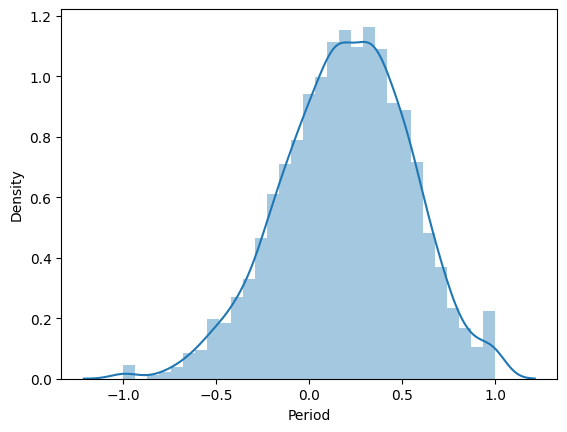

Environmental Innovation Score
-0.05254697723978655


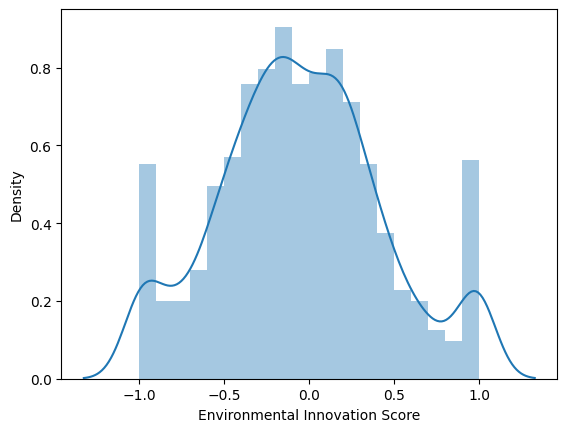

ESG Score
-0.18210710971150776


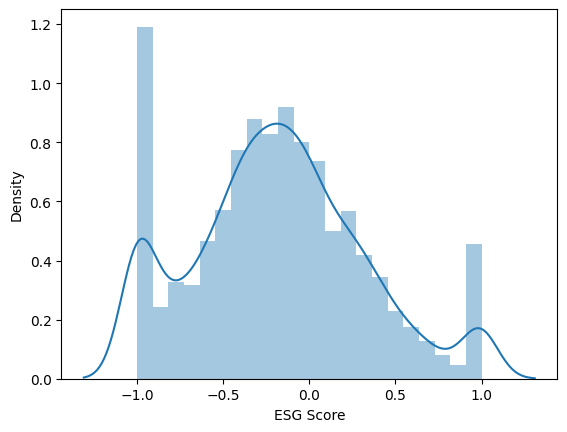

Human Rights Score
-0.07861704435593114


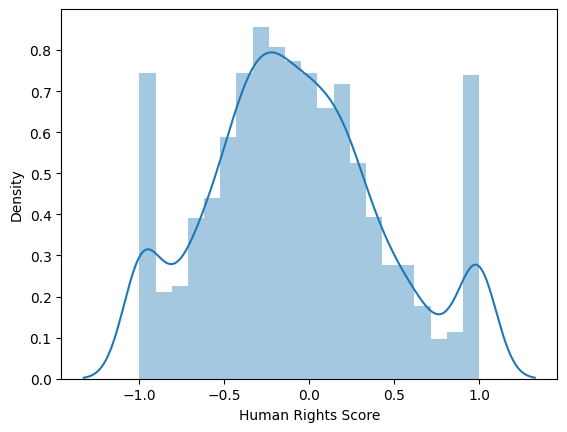

Community Score
-0.0648358821627276


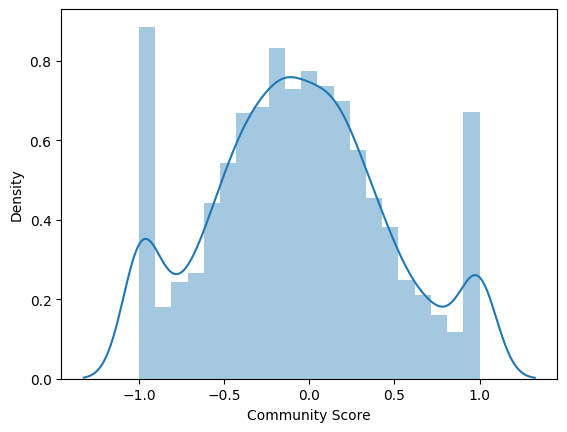

Management Score
-0.11110519455216014


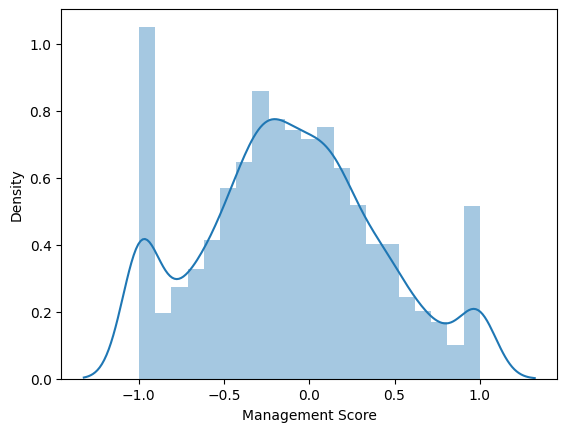

Governance Pillar Score
-0.1354628424464882


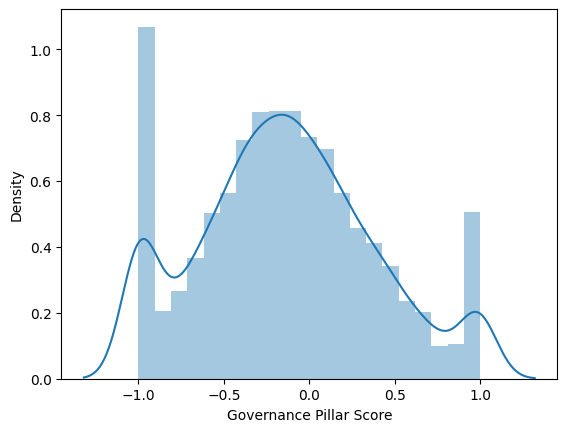

Social Pillar Score
-0.12074207419228354


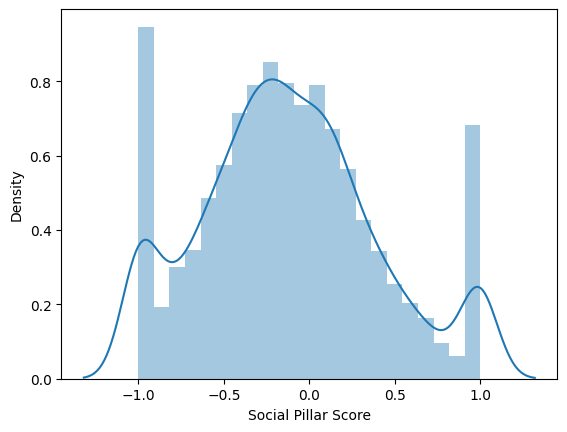

Environmental Pillar Score
-0.16130935514578756


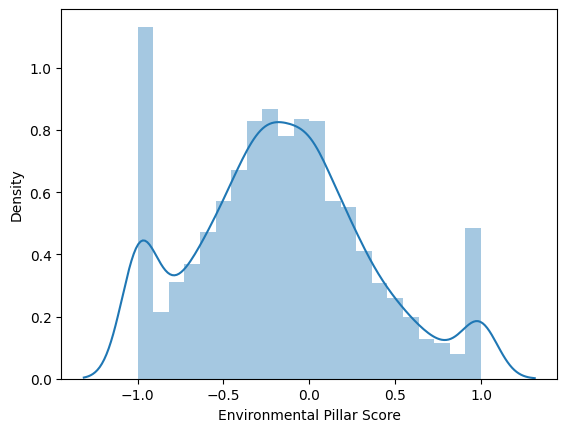

Resource Use Score
-0.13455410168204737


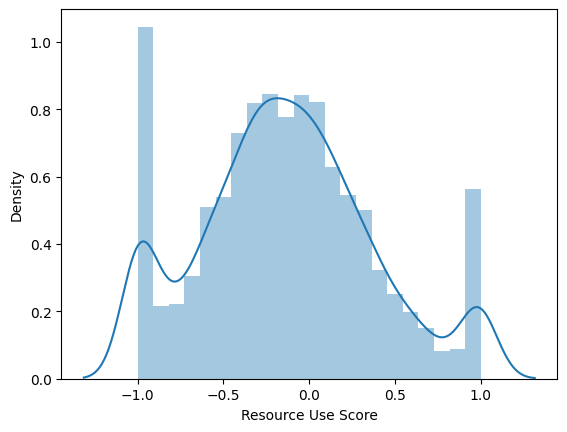

Emissions Score
-0.13279909822035635


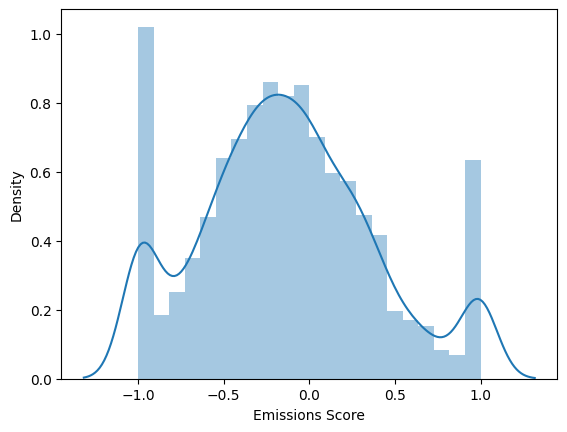

YTD Total Return D
0.01179304084895634


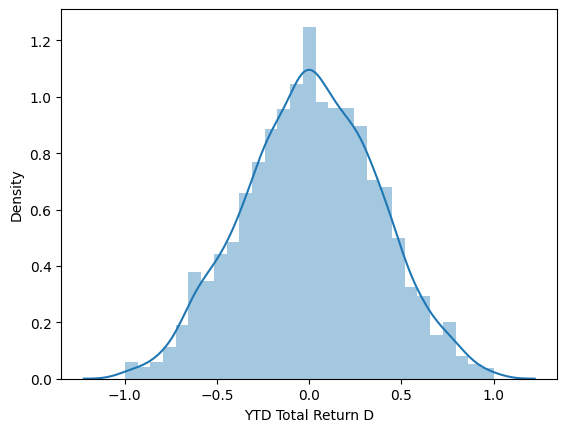

Workforce Score
-0.09634022994234032


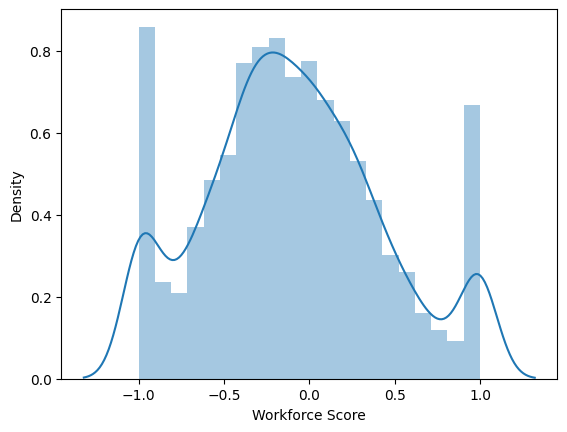

Product Responsibility Score
-0.08122342106679886


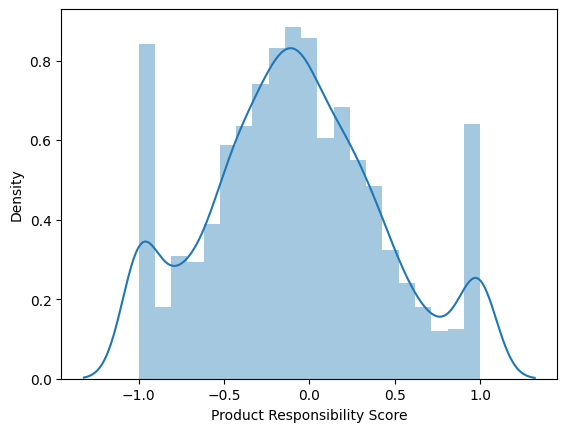

Shareholders Score
-0.06826303714809738


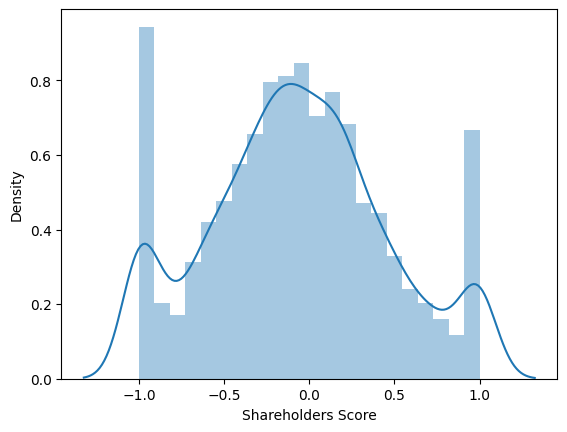

CSR Strategy Score
-0.12580540961471648


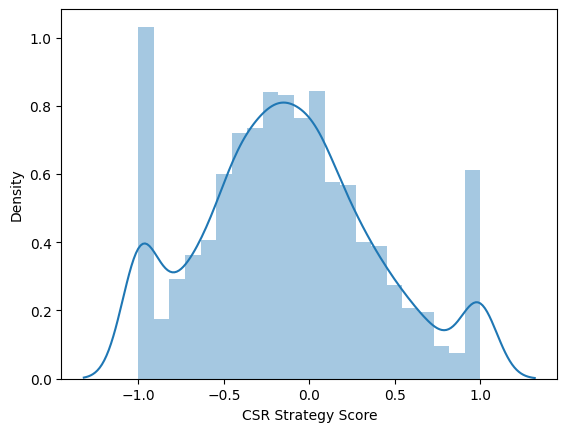

In [ ]:
#get for every column the mean of the correlation and the distplot
import seaborn as sns
import matplotlib.pyplot as plt
for col in df_corr.columns:
    if col != "Company Name":
        print(col)
        print(df_corr[col].mean())
        sns.distplot(df_corr[col])
        plt.show()
        

In [ ]:
#get the columns with a correlation of more than 0.8 for ESG Score
df_corr[df_corr["ESG Score"] > 0.8]

YTD Total Return FY                    Period  Environmental Innovation Score  \
Company Name                                                                    
ABC Technologies Holdings Inc       -1.000000                       -1.000000   
AMG Advanced Metallurgical Group NV  0.104301                       -0.196121   
ASA International Group PLC          0.707595                             NaN   
Adams Resources & Energy Inc         0.124111                             NaN   
Addtech AB                           0.016100                       -0.421457   
...                                       ...                             ...   
Wilh Wilhelmsen Holding ASA         -0.157605                             NaN   
Wilmington PLC                       0.005092                             NaN   
Xaar PLC                            -0.268556                        1.000000   
Zalaris ASA                          0.172990                             NaN   
Zooplus SE                           0.400671                             NaN   

YTD Total Return FY                  ESG Score  Human Rights Score  \
Company Name                                                         
ABC Technologies Holdings Inc         1.000000           -1.000000   
AMG Advanced Metallurgical Group NV   0.914229           -0.998095   
ASA International Group PLC           0.999796            0.761973   
Adams Resources & Energy Inc          0.959799            0.861532   
Addtech AB                            0.967839           -0.774426   
...                                        ...                 ...   
Wilh Wilhelmsen Holding ASA           1.000000           -1.000000   
Wilmington PLC                        0.897135            0.970425   
Xaar PLC                              1.000000            1.000000   
Zalaris ASA                           1.000000            1.000000   
Zooplus SE                            1.000000           -1.000000   

YTD Total Return FY                  Community Score  Management Score  \
Company Name                                                             
ABC Technologies Holdings Inc              -1.000000          1.000000   
AMG Advanced Metallurgical Group NV         0.998636          0.964770   
ASA International Group PLC                 0.937506         -0.992080   
Adams Resources & Energy Inc                0.962279          0.380524   
Addtech AB                                 -0.267651          0.946994   
...                                              ...               ...   
Wilh Wilhelmsen Holding ASA                 1.000000          1.000000   
Wilmington PLC                              0.680204          0.812798   
Xaar PLC                                    1.000000          1.000000   
Zalaris ASA                                -1.000000          1.000000   
Zooplus SE                                 -1.000000         -1.000000   

YTD Total Return FY                  Governance Pillar Score  \
Company Name                                                   
ABC Technologies Holdings Inc                       1.000000   
AMG Advanced Metallurgical Group NV                 0.971704   
ASA International Group PLC                        -0.870206   
Adams Resources & Energy Inc                        0.653103   
Addtech AB                                          0.993896   
...                                                      ...   
Wilh Wilhelmsen Holding ASA                         1.000000   
Wilmington PLC                                      0.969671   
Xaar PLC                                            1.000000   
Zalaris ASA                                         1.000000   
Zooplus SE                                         -1.000000   

YTD Total Return FY                  Social Pillar Score  \
Company Name                                               
ABC Technologies Holdings Inc                   1.000000   
AMG Advanced Metallurgical Group NV             0.902244   

In [ ]:
#remove the second level of the multiindex
df_corr["Company Name"] = df_corr.index.get_level_values(0)

In [ ]:
#get the number of NaNs for every company 
df_data.isna().groupby(df_data["Company Name"]).sum()["ESG Score"]/df_data["Company Name"].value_counts()
df_corr.index = df_corr["Company Name"]
#add this to the df_corr
df_corr["ESG Score NaNs"] = df_data.isna().groupby(df_data["Company Name"]).sum()["ESG Score"]/df_data["Company Name"].value_counts()

In [ ]:
df_corr

YTD Total Return FY             Period  Environmental Innovation Score  \
Company Name                                                             
1&1 AG                        0.753381                       -0.331501   
1-800-Flowers.Com Inc         0.461032                             NaN   
2G Energy AG                 -0.433429                        1.000000   
3M Co                         0.696005                       -0.543789   
3i Group PLC                  0.519898                       -0.442177   
...                                ...                             ...   
ioneer Ltd                   -0.415675                             NaN   
nVent Electric PLC           -0.392780                        0.473223   
oOh!media Ltd                 0.468167                             NaN   
secunet Security Networks AG  0.151036                             NaN   
thyssenkrupp AG               0.473724                        0.434571   

YTD Total Return FY           ESG Score  Human Rights Score  Community Score  \
Company Name                                                                   
1&1 AG                        -0.239919            0.043510        -0.448869   
1-800-Flowers.Com Inc         -0.398424            0.484815         0.612760   
2G Energy AG                  -1.000000            1.000000        -1.000000   
3M Co                         -0.401701           -0.617154        -0.721578   
3i Group PLC                  -0.400387           -0.201182        -0.344156   
...                                 ...                 ...              ...   
ioneer Ltd                    -0.435668           -0.558877         0.057221   
nVent Electric PLC             0.366931            0.553056         0.363133   
oOh!media Ltd                 -0.633192                 NaN         0.224760   
secunet Security Networks AG  -1.000000                 NaN         1.000000   
thyssenkrupp AG               -0.221767            0.036935        -0.284489   

YTD Total Return FY           Management Score  Governance Pillar Score  \
Company Name                                                              
1&1 AG                               -0.214169                -0.127636   
1-800-Flowers.Com Inc                -0.443560                -0.591969   
2G Energy AG                         -1.000000                -1.000000   
3M Co                                 0.272487                 0.055709   
3i Group PLC                          0.163030                -0.001330   
...                                        ...                      ...   
ioneer Ltd                           -0.343912                -0.598863   
nVent Electric PLC                    0.527723                 0.416029   
oOh!media Ltd                        -0.811309                -0.757050   
secunet Security Networks AG         -1.000000                -1.000000   
thyssenkrupp AG                      -0.318331                -0.288809   

YTD Total Return FY           Social Pillar Score  Environmental Pillar Score  \
Company Name                                                                    
1&1 AG                                  -0.277594                   -0.281074   
1-800-Flowers.Com Inc                    0.002850                   -0.374976   
2G Energy AG                            -1.000000                    1.000000   
3M Co                                   -0.694571                   -0.464916   
3i Group PLC                            -0.452316                   -0.456751   
...                                           ...                         ...   
ioneer Ltd                              -0.410848                   -0.189267   
nVent Electric PLC                       0.266234                    0.334322   
oOh!media Ltd                           -0.524225                   -0.289987   
secunet Security Networks AG             1.000000                    1.000000   
thyssenkrupp AG                         -0.02147

In [ ]:
df_corr_nan_free = df_corr[df_corr["ESG Score NaNs"] < 0.2]

In [ ]:
df_corr_nan_free

YTD Total Return FY             Period  Environmental Innovation Score  \
Company Name                                                             
3M Co                         0.696005                       -0.543789   
3i Group PLC                  0.519898                       -0.442177   
A G Barr PLC                  0.235404                       -0.129416   
A2A SpA                       0.606320                        0.115631   
AECOM                        -0.290903                       -0.123955   
...                                ...                             ...   
eBay Inc                      0.026461                       -0.111060   
freenet AG                    0.369055                       -0.142976   
iA Financial Corporation Inc  0.063679                        0.074081   
iStar Inc                     0.153907                       -0.395371   
thyssenkrupp AG               0.473724                        0.434571   

YTD Total Return FY           ESG Score  Human Rights Score  Community Score  \
Company Name                                                                   
3M Co                         -0.401701           -0.617154        -0.721578   
3i Group PLC                  -0.400387           -0.201182        -0.344156   
A G Barr PLC                  -0.009768            0.248492         0.331712   
A2A SpA                       -0.344447           -0.466148        -0.223281   
AECOM                          0.303768            0.469246        -0.303973   
...                                 ...                 ...              ...   
eBay Inc                      -0.255196            0.080332        -0.209075   
freenet AG                    -0.124426                 NaN        -0.103552   
iA Financial Corporation Inc  -0.082413            0.062328         0.141734   
iStar Inc                     -0.176879           -0.357425         0.245415   
thyssenkrupp AG               -0.221767            0.036935        -0.284489   

YTD Total Return FY           Management Score  Governance Pillar Score  \
Company Name                                                              
3M Co                                 0.272487                 0.055709   
3i Group PLC                          0.163030                -0.001330   
A G Barr PLC                         -0.154570                -0.167493   
A2A SpA                              -0.339172                -0.299051   
AECOM                                -0.072551                 0.013885   
...                                        ...                      ...   
eBay Inc                             -0.294077                -0.283867   
freenet AG                           -0.131436                -0.180841   
iA Financial Corporation Inc         -0.178791                -0.200343   
iStar Inc                             0.204753                 0.114411   
thyssenkrupp AG                      -0.318331                -0.288809   

YTD Total Return FY           Social Pillar Score  Environmental Pillar Score  \
Company Name                                                                    
3M Co                                   -0.694571                   -0.464916   
3i Group PLC                            -0.452316                   -0.456751   
A G Barr PLC                             0.250629                    0.152714   
A2A SpA                                 -0.210270                   -0.359340   
AECOM                                    0.427546                    0.385794   
...                                           ...                         ...   
eBay Inc                                -0.153999                    0.261246   
freenet AG                              -0.004400                   -0.196645   
iA Financial Corporation Inc             0.156713                    0.038588   
iStar Inc                               -0.178183                   -0.232309   
thyssenkrupp AG                         -0.02147

Period
0.16105158812830309
0.1761600454504034


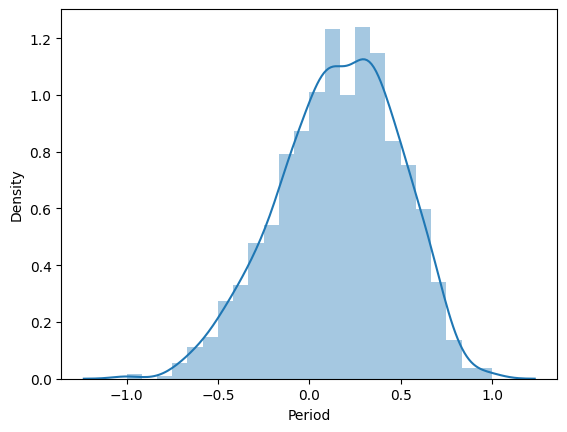

Environmental Innovation Score
-0.03141850786730999
-0.042587334578547506


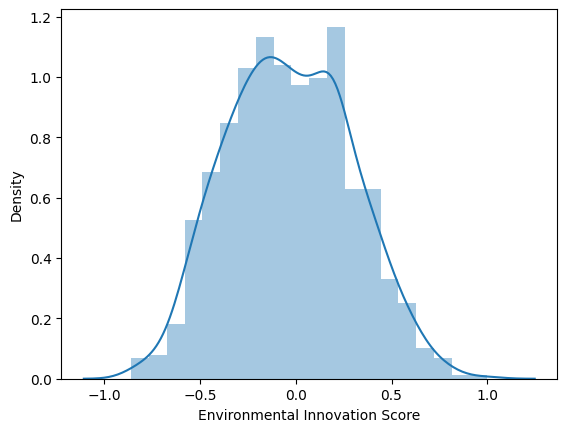

ESG Score
-0.1041093348931093
-0.11997724687257547


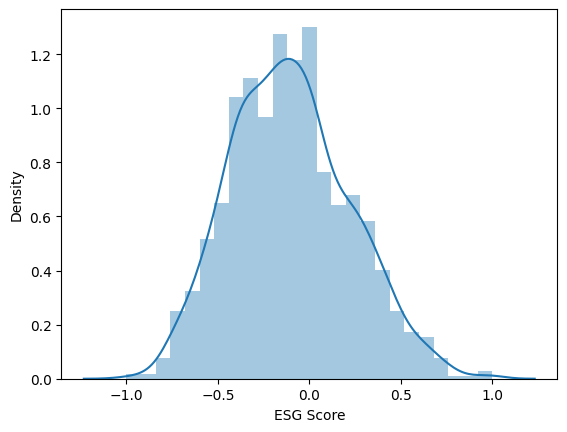

Human Rights Score
-0.07335548599279605
-0.09806696804944123


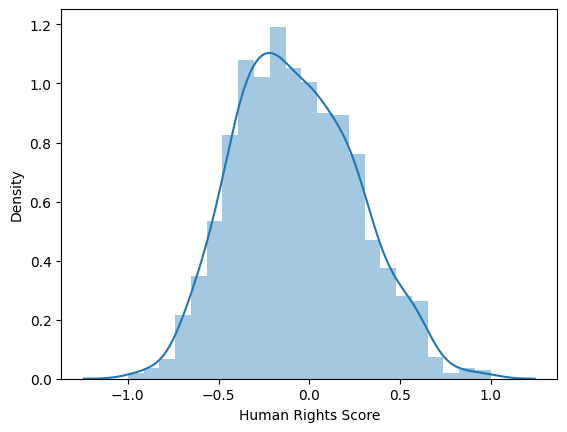

Community Score
-0.05115763849966235
-0.05898210347985078


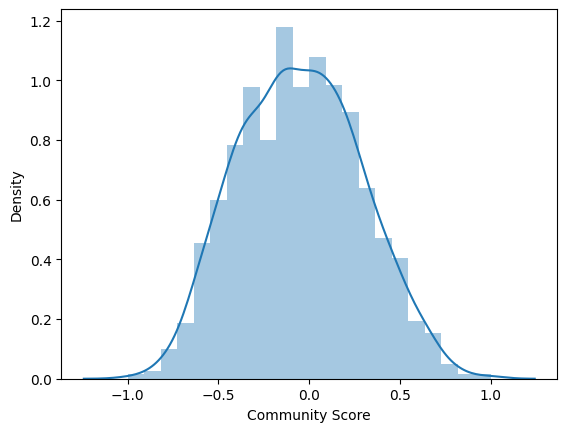

Management Score
-0.04306086298569106
-0.061434548814792475


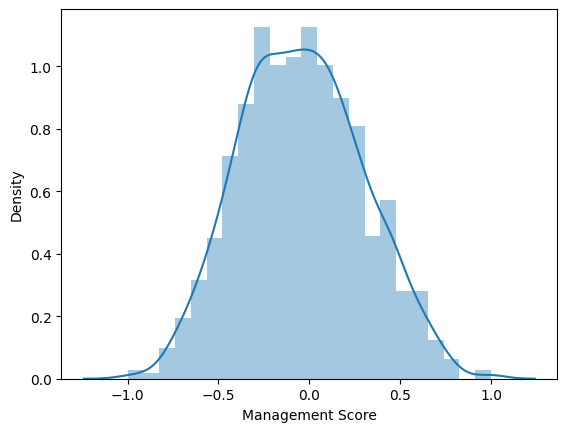

Governance Pillar Score
-0.06529665244666782
-0.08270719838123536


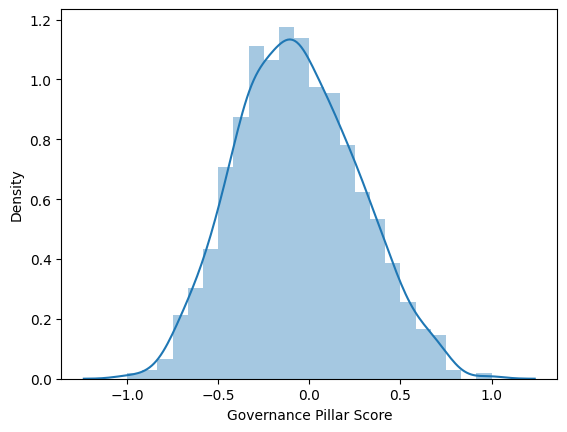

Social Pillar Score
-0.10000553662115677
-0.1214334384205813


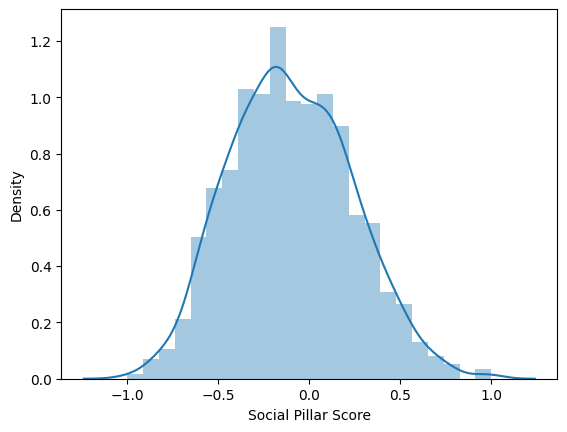

Environmental Pillar Score
-0.08350384270798566
-0.08783509677545913


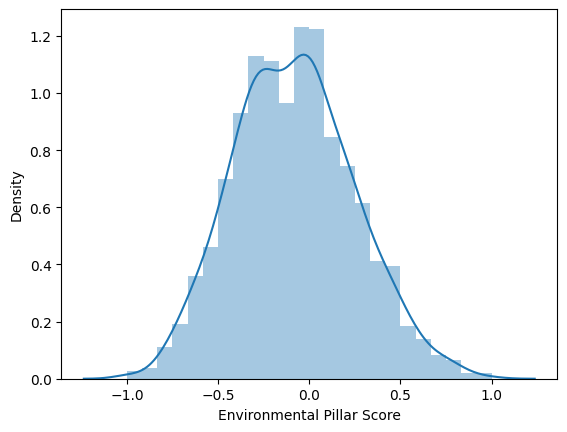

Resource Use Score
-0.07796801261075702
-0.09197462333913926


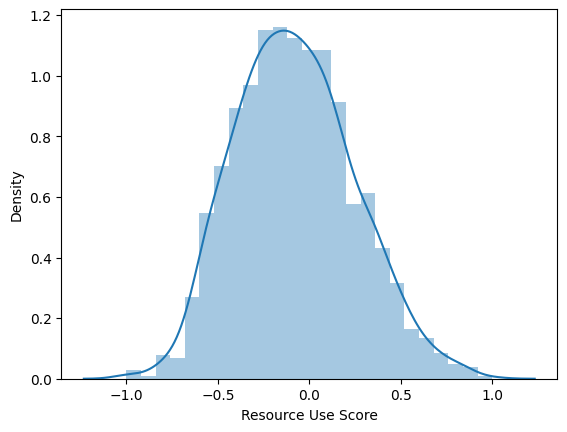

Emissions Score
-0.08531414169425873
-0.09808034337951826


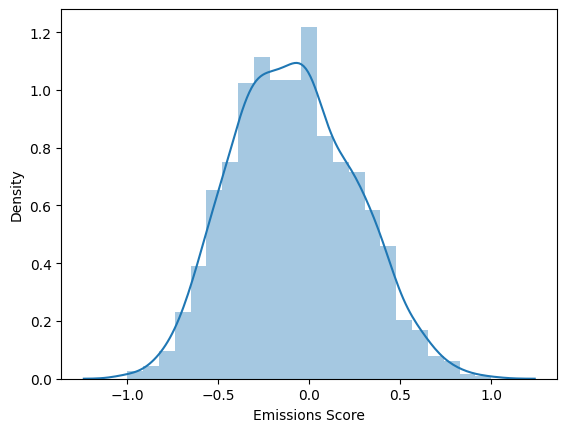

YTD Total Return D
-0.0016202900276234688
-0.003912269205327986


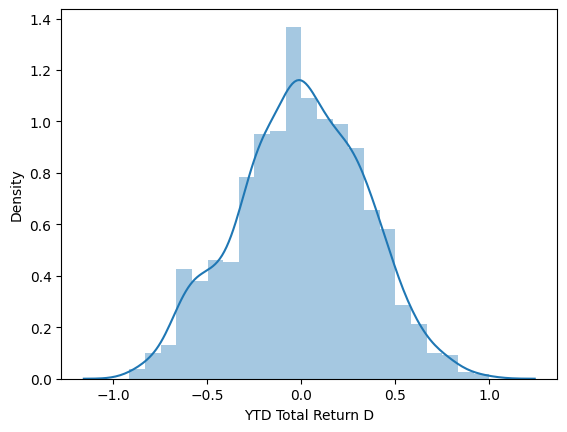

Workforce Score
-0.07705710289904483
-0.10175259440695503


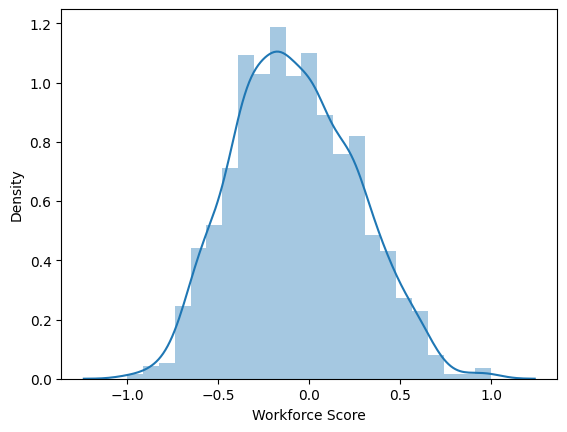

Product Responsibility Score
-0.06006415465932326
-0.07792839375916943


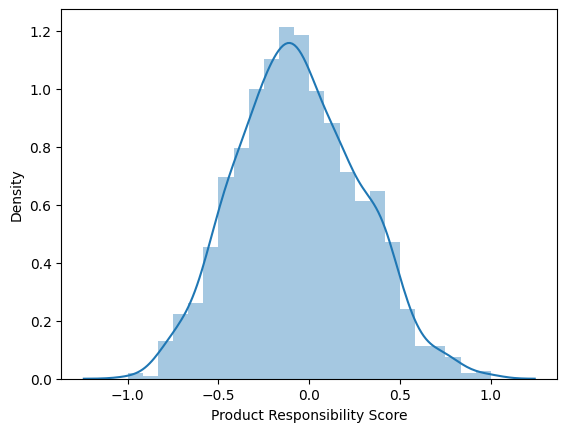

Shareholders Score
-0.04031420003069016
-0.05863811595442393


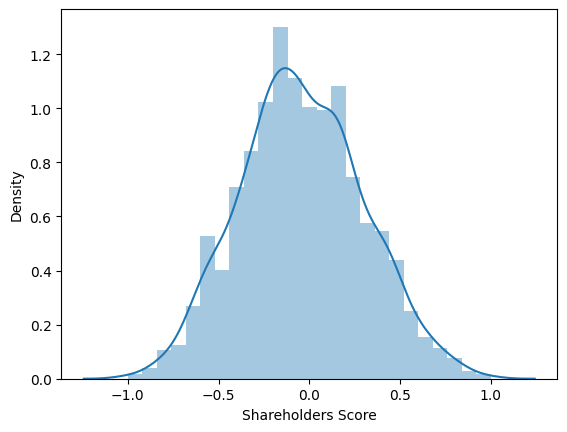

CSR Strategy Score
-0.08877787849578707
-0.10690587239916705


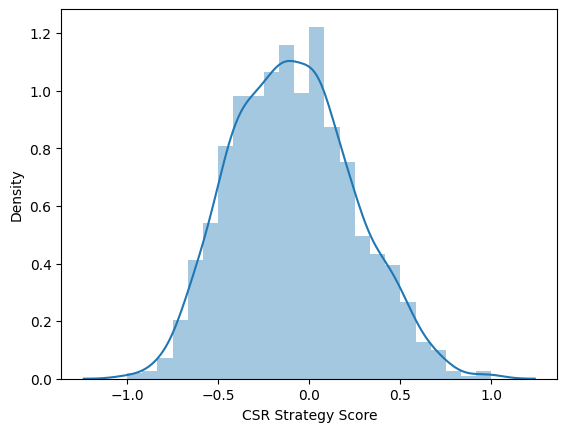

ESG Score NaNs
0.004055087987758226
0.0


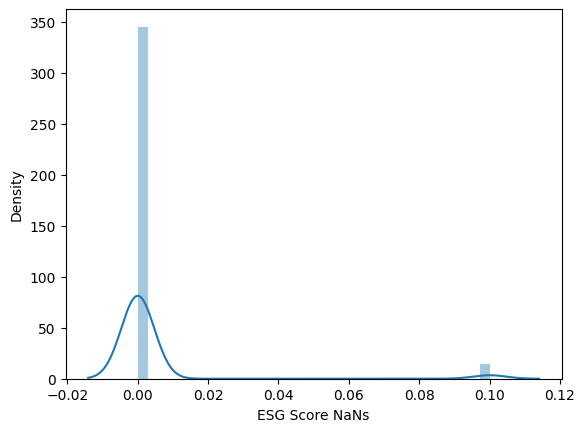

In [ ]:
#get for every column the mean of the correlation and the distplot
import seaborn as sns
import matplotlib.pyplot as plt
for col in df_corr_nan_free.columns:
    if col != "Company Name":
        print(col)
        print(df_corr_nan_free[col].mean())
        #get the median
        print(df_corr_nan_free[col].median())
        sns.distplot(df_corr_nan_free[col])
        plt.show()

<AxesSubplot: xlabel='ESG Score', ylabel='YTD Total Return FY'>

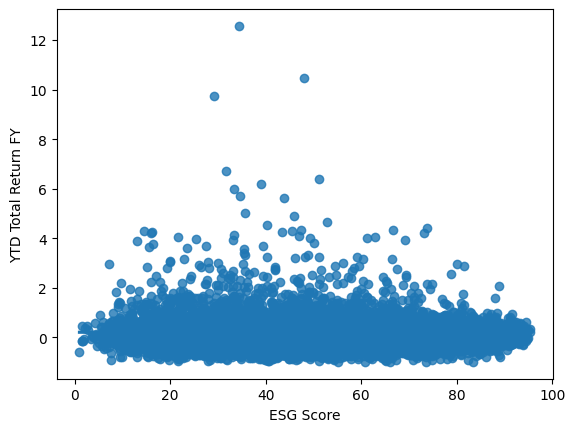

In [ ]:
#scatterplot between ESG Score and YTD Total Return FY
sns.regplot(x="ESG Score", y="YTD Total Return FY", data=df_data)

<AxesSubplot: >

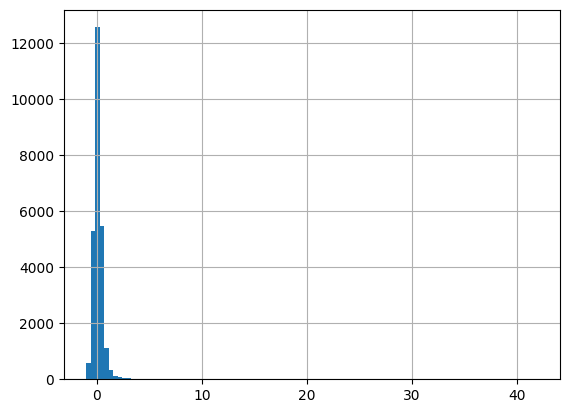

In [ ]:
#show only the Returns +-2
df_data["YTD Total Return FY"].hist(bins=100)

In [ ]:
df_data_clean.shape

(25227, 18)

<AxesSubplot: xlabel='ESG Score', ylabel='YTD Total Return FY'>

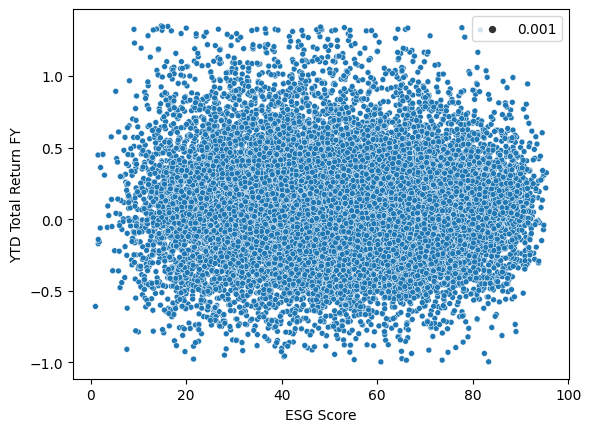

In [ ]:
sns.scatterplot(x="ESG Score", y="YTD Total Return FY", data=df_data_clean,size=0.001)

<AxesSubplot: xlabel='ESG Score', ylabel='YTD Total Return FY'>

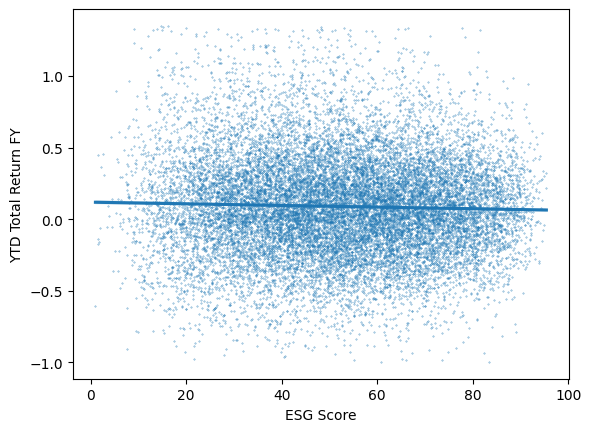

In [ ]:
sns.regplot(x="ESG Score", y="YTD Total Return FY", data=df_data_clean, scatter_kws={"s": 0.1})

In [ ]:
df_data_clean.corr()["YTD Total Return FY"]

Period                            0.151544
Environmental Innovation Score    0.013700
ESG Score                        -0.031778
Human Rights Score               -0.030696
Community Score                   0.010502
Management Score                 -0.028448
Governance Pillar Score          -0.039674
Social Pillar Score              -0.017032
Environmental Pillar Score       -0.027094
YTD Total Return FY               1.000000
Resource Use Score               -0.031555
Emissions Score                  -0.034721
YTD Total Return D               -0.022906
Workforce Score                  -0.028355
Product Responsibility Score     -0.012950
Shareholders Score               -0.026572
CSR Strategy Score               -0.045066
Name: YTD Total Return FY, dtype: float64

In [ ]:
#make a correlation for every period
#save them in a new dataframe
df_corr_periods = pd.DataFrame(columns=df_data_clean.columns)
for period in df_data_clean["Period"].unique():
    df_corr_periods.loc[period] = df_data_clean[df_data_clean["Period"] == period].corr()["YTD Total Return FY"]

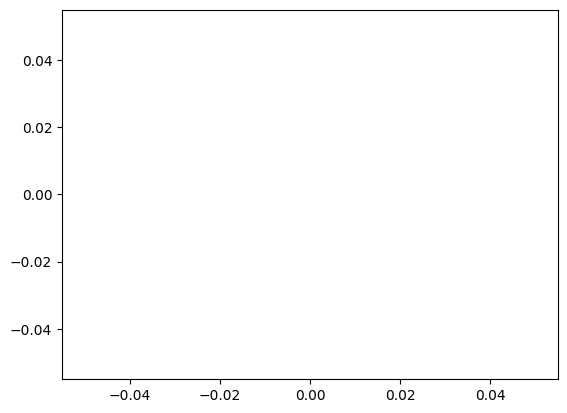

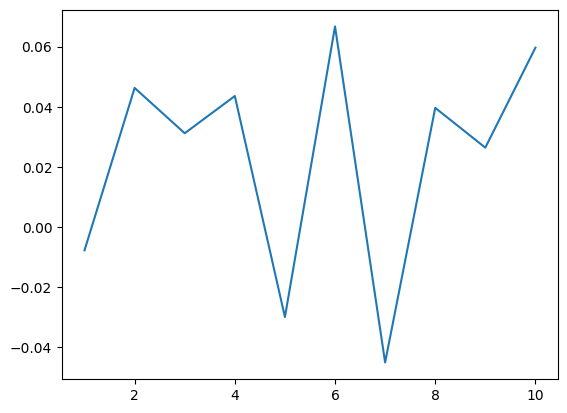

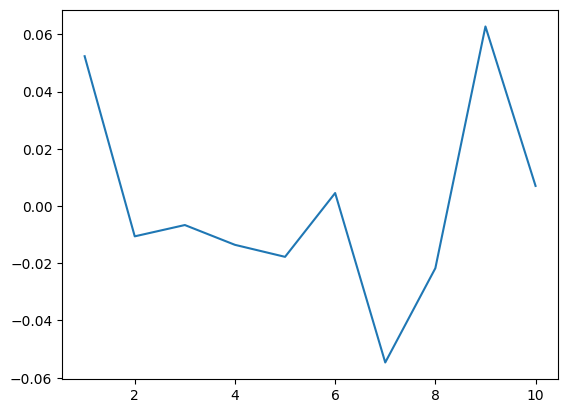

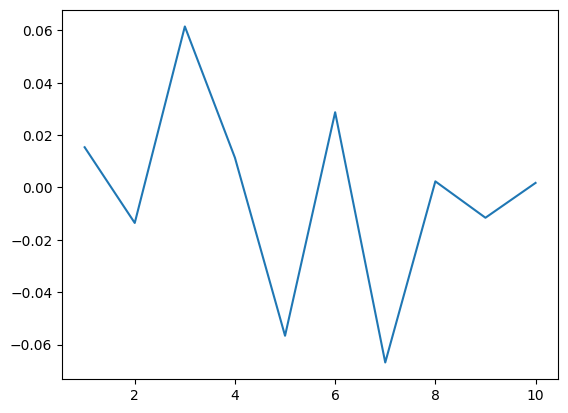

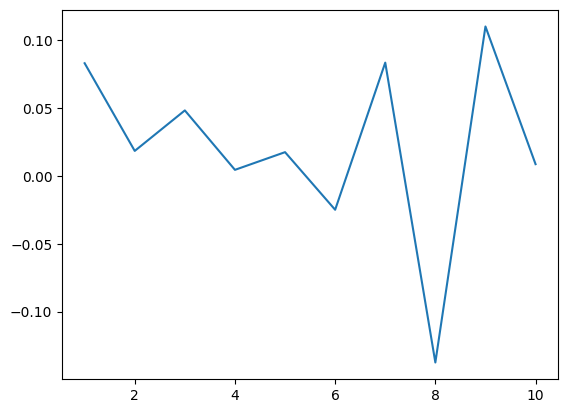

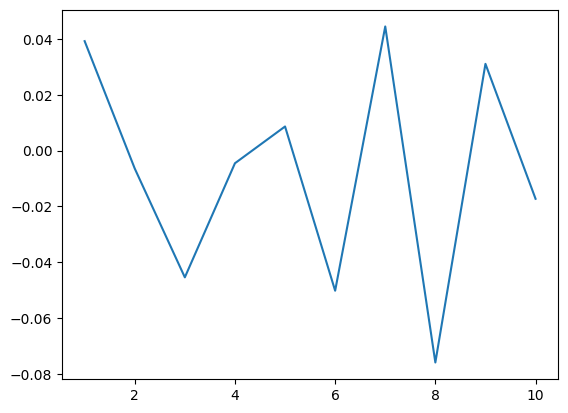

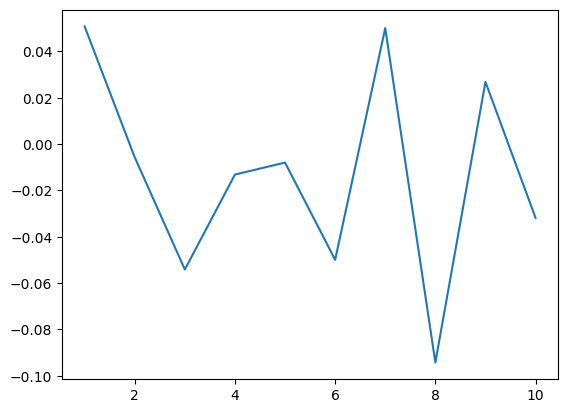

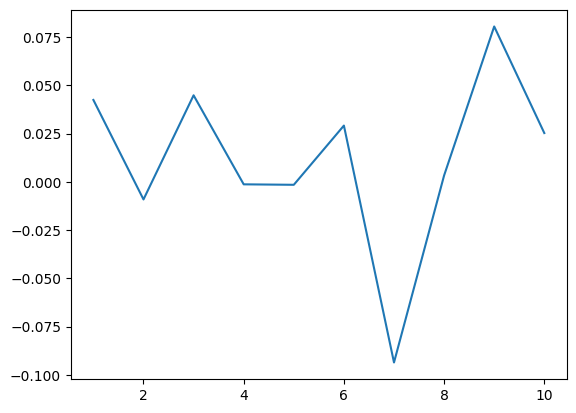

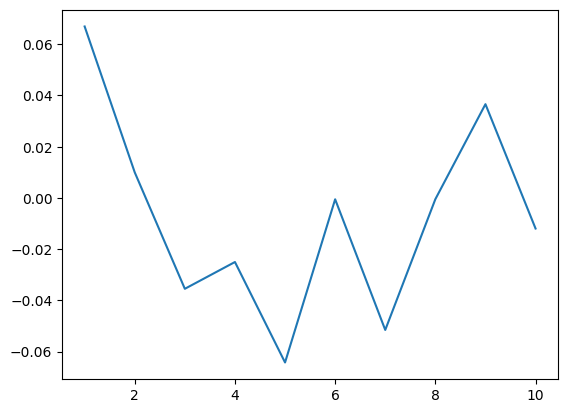

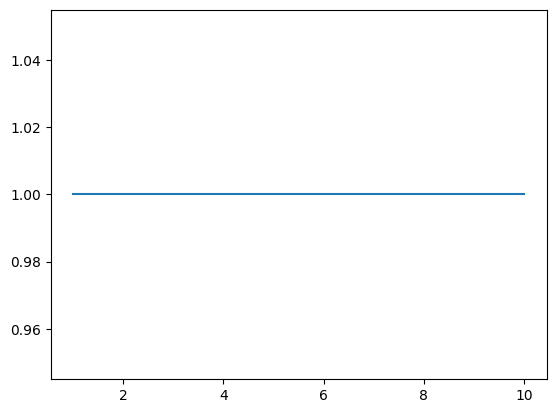

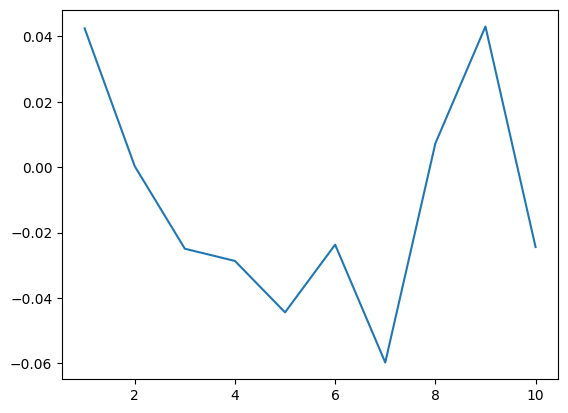

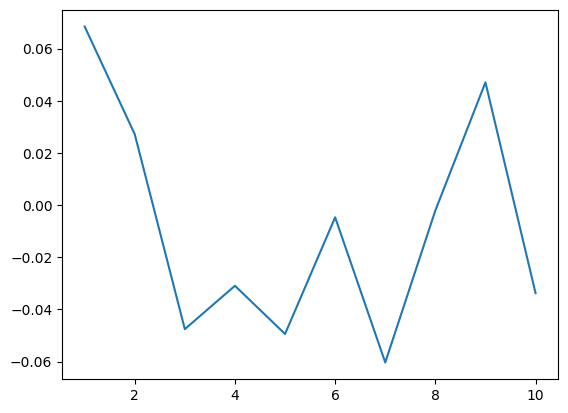

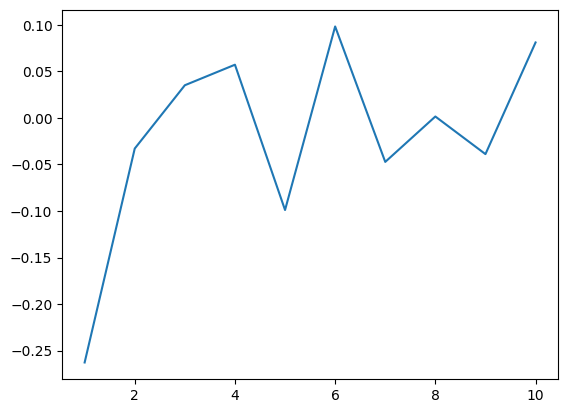

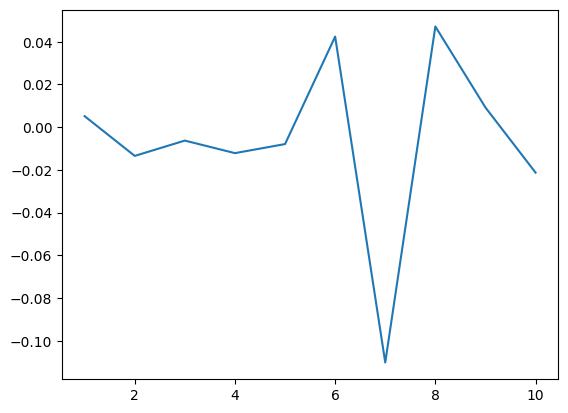

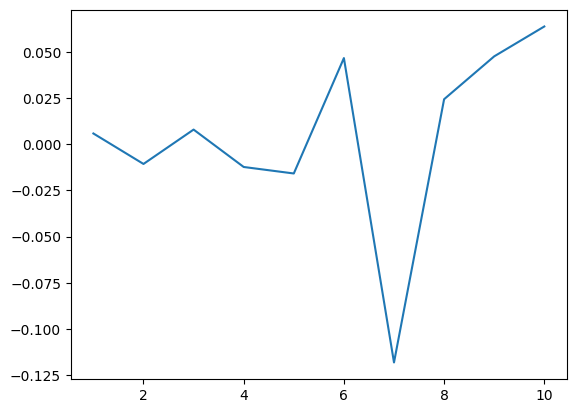

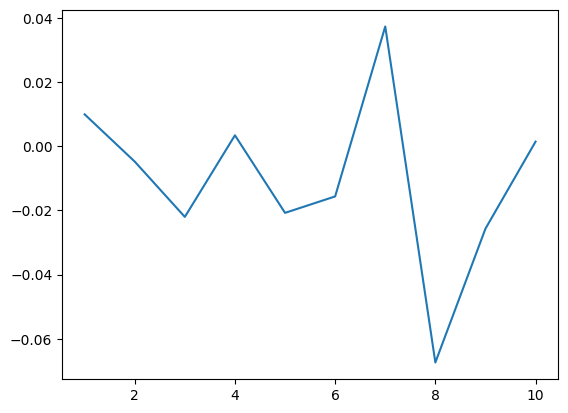

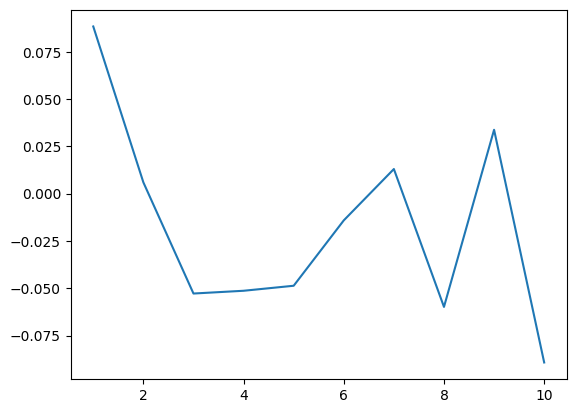

In [ ]:
#plot the correlation for every column over the periods
for col in df_corr_periods.columns:
    if col != "Company Name":
        plt.plot(df_corr_periods.index, df_corr_periods[col], label=col)
        plt.show()


Well, this does not look good

In [ ]:
#create a dict from df_all_comp where the company name is the key and the value is the Country of Headquarters
dict_country = dict(zip(df_all_comp["Company Name"], df_all_comp["Country of Headquarters"]))
#add the country to the df_data
df_data["Country"] = df_data["Company Name"].map(dict_country)
#add also to the df_corr_nan_free and df_data_clean
df_corr_nan_free["Country"] = df_corr_nan_free["Company Name"].map(dict_country)
df_data_clean["Country"] = df_data_clean["Company Name"].map(dict_country)

In [ ]:
#get the correltion for every country
df_corr_country = df_data_clean.groupby("Country").apply(compute_correlations)
df_corr_country


YTD Total Return FY         Period  Environmental Innovation Score  ESG Score  \
Country                                                                         
Australia                 0.073233                       -0.009768   0.011121   
Austria                   0.088834                        0.086468   0.009600   
Belgium                   0.256936                        0.009843  -0.112706   
Bermuda                   0.012047                        0.076660  -0.060654   
Canada                    0.000800                        0.052300  -0.001188   
Cyprus                   -0.044099                        0.056450  -0.053479   
Denmark                   0.282019                        0.033478  -0.026340   
Finland                   0.175053                        0.087282   0.107144   
France                    0.165689                        0.003760  -0.078686   
Germany                   0.202286                       -0.009613  -0.088343   
Gibraltar                 0.366176                             NaN  -0.470814   
Greece                   -0.036203                       -0.238064  -0.074382   
Guernsey                  0.062654                       -0.109099  -0.058775   
Iceland                   0.035133                       -0.333900  -0.082791   
Ireland; Republic of      0.208797                        0.173687   0.035199   
Isle of Man               0.408889                       -0.291547  -0.164468   
Italy                     0.178778                       -0.044543  -0.102862   
Jersey                    0.189201                       -0.249735  -0.599996   
Liechtenstein             0.476598                        0.682812   0.675977   
Luxembourg                0.198117                        0.033847   0.038437   
Malta                     0.166264                             NaN   0.166757   
Monaco                   -0.087758                             NaN  -0.146451   
Netherlands               0.193558                        0.118308   0.086623   
New Zealand               0.154051                        0.016555  -0.090836   
Norway                    0.179080                        0.149179   0.088473   
Portugal                  0.154023                       -0.026669  -0.022888   
Slovenia                 -0.078656                             NaN  -0.837902   
Spain                     0.191520                       -0.004931  -0.028667   
Sweden                    0.211208                        0.030606  -0.051999   
Switzerland               0.207656                        0.060860   0.000272   
United Kingdom            0.191895                        0.009925  -0.034062   
United States of America  0.149694                        0.002145  -0.036492   

YTD Total Return FY       Human Rights Score  Community Score  \
Country                                                         
Australia                          -0.007110         0.008358   
Austria                            -0.121968        -0.080159   
Belgium                            -0.113749        -0.141352   
Bermuda                            -0.064738         0.041588   
Canada                              0.000213        -0.027879   
Cyprus                             -0.081969        -0.064753   
Denmark                            -0.038317        -0.010002   
Finland                             0.065099         0.081943   
France                             -0.001924        -0.051100   
Germany                            -0.038398        -0.052207   
Gibraltar                          -0.432694        -0.135411   
Greece                              0.035452         0.061716   
Guernsey                           -0.150643        -0.091555   
Iceland                             0.021283        -0.323694   
Ireland; Republic of                0.031850         0.057612   
Isle of Man                        -0.344595        -0.278848   
Italy                              -0.093694        -0.054762   
Jersey    

In [ ]:
#scale the esg per period 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_data_clean_1 = df_data_clean.copy()
df_data_clean_1["ESG Score"] = scaler.fit_transform(df_data_clean["ESG Score"].values.reshape(-1,1))


In [ ]:
df_corr_country = df_data_clean.groupby("Country").apply(compute_correlations)
df_corr_country


YTD Total Return FY         Period  Environmental Innovation Score  ESG Score  \
Country                                                                         
Australia                 0.073233                       -0.009768   0.011121   
Austria                   0.088834                        0.086468   0.009600   
Belgium                   0.256936                        0.009843  -0.112706   
Bermuda                   0.012047                        0.076660  -0.060654   
Canada                    0.000800                        0.052300  -0.001188   
Cyprus                   -0.044099                        0.056450  -0.053479   
Denmark                   0.282019                        0.033478  -0.026340   
Finland                   0.175053                        0.087282   0.107144   
France                    0.165689                        0.003760  -0.078686   
Germany                   0.202286                       -0.009613  -0.088343   
Gibraltar                 0.366176                             NaN  -0.470814   
Greece                   -0.036203                       -0.238064  -0.074382   
Guernsey                  0.062654                       -0.109099  -0.058775   
Iceland                   0.035133                       -0.333900  -0.082791   
Ireland; Republic of      0.208797                        0.173687   0.035199   
Isle of Man               0.408889                       -0.291547  -0.164468   
Italy                     0.178778                       -0.044543  -0.102862   
Jersey                    0.189201                       -0.249735  -0.599996   
Liechtenstein             0.476598                        0.682812   0.675977   
Luxembourg                0.198117                        0.033847   0.038437   
Malta                     0.166264                             NaN   0.166757   
Monaco                   -0.087758                             NaN  -0.146451   
Netherlands               0.193558                        0.118308   0.086623   
New Zealand               0.154051                        0.016555  -0.090836   
Norway                    0.179080                        0.149179   0.088473   
Portugal                  0.154023                       -0.026669  -0.022888   
Slovenia                 -0.078656                             NaN  -0.837902   
Spain                     0.191520                       -0.004931  -0.028667   
Sweden                    0.211208                        0.030606  -0.051999   
Switzerland               0.207656                        0.060860   0.000272   
United Kingdom            0.191895                        0.009925  -0.034062   
United States of America  0.149694                        0.002145  -0.036492   

YTD Total Return FY       Human Rights Score  Community Score  \
Country                                                         
Australia                          -0.007110         0.008358   
Austria                            -0.121968        -0.080159   
Belgium                            -0.113749        -0.141352   
Bermuda                            -0.064738         0.041588   
Canada                              0.000213        -0.027879   
Cyprus                             -0.081969        -0.064753   
Denmark                            -0.038317        -0.010002   
Finland                             0.065099         0.081943   
France                             -0.001924        -0.051100   
Germany                            -0.038398        -0.052207   
Gibraltar                          -0.432694        -0.135411   
Greece                              0.035452         0.061716   
Guernsey                           -0.150643        -0.091555   
Iceland                             0.021283        -0.323694   
Ireland; Republic of                0.031850         0.057612   
Isle of Man                        -0.344595        -0.278848   
Italy                              -0.093694        -0.054762   
Jersey    

<AxesSubplot: xlabel='ESG Score Quantile', ylabel='YTD Total Return FY'>

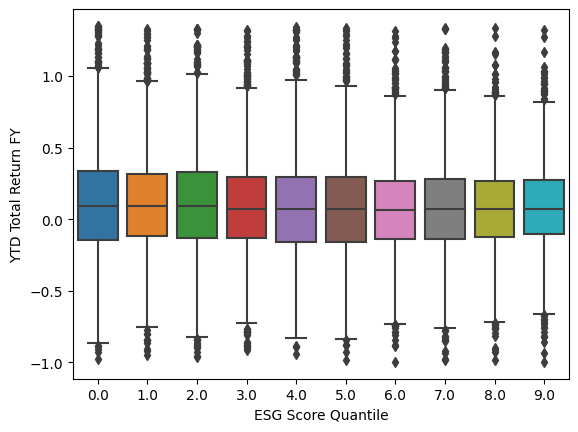

In [ ]:
#split the data in ten quantiles based on the ESG Score 
#than pake for every quantile a boxplot of the YTD Total Return FY 
df_data_clean_1["ESG Score Quantile"] = pd.qcut(df_data_clean_1["ESG Score"], 10, labels=False)
sns.boxplot(x="ESG Score Quantile", y="YTD Total Return FY", data=df_data_clean_1)

Period


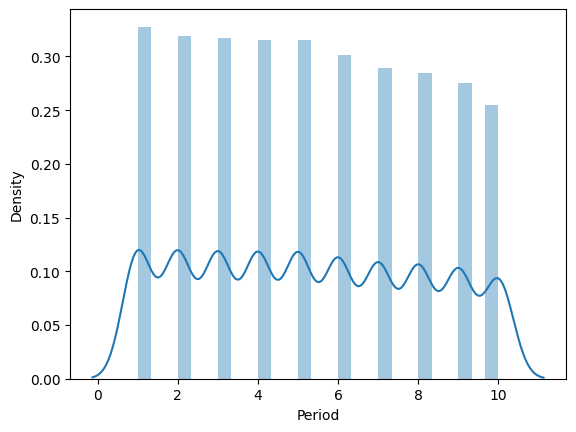

Environmental Innovation Score


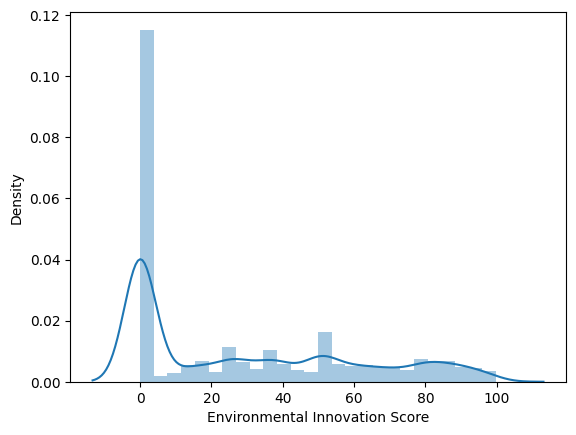

ESG Score


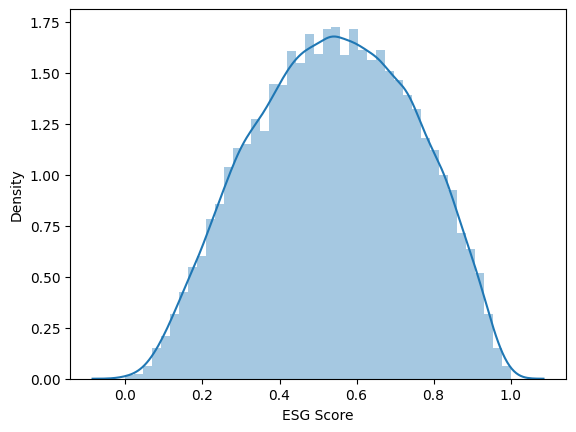

Human Rights Score


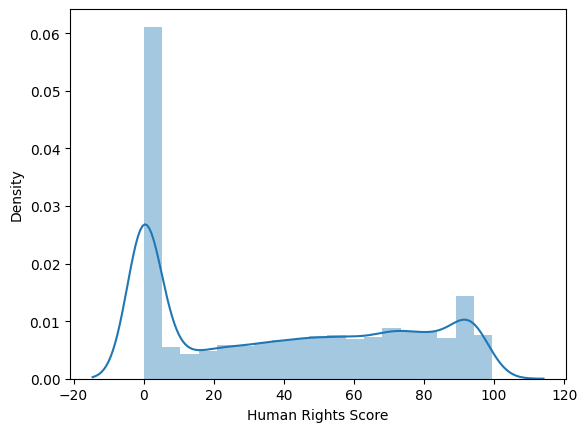

Community Score


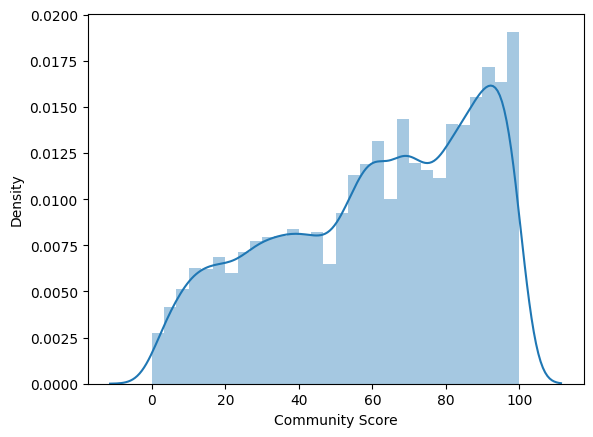

Management Score


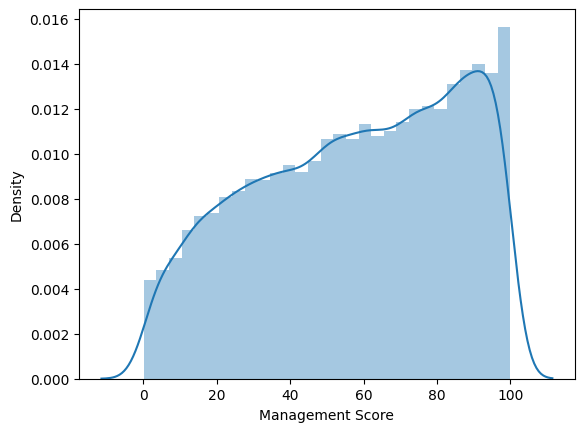

Governance Pillar Score


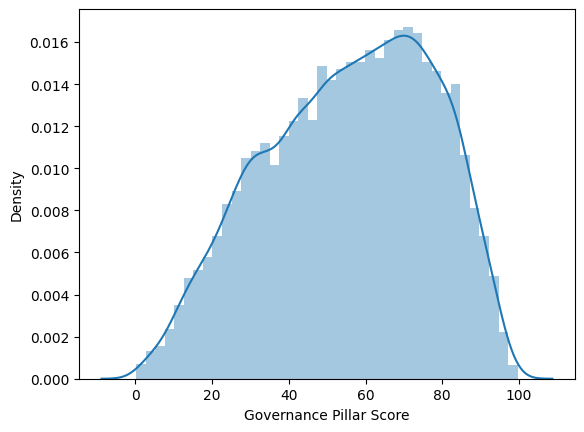

Social Pillar Score


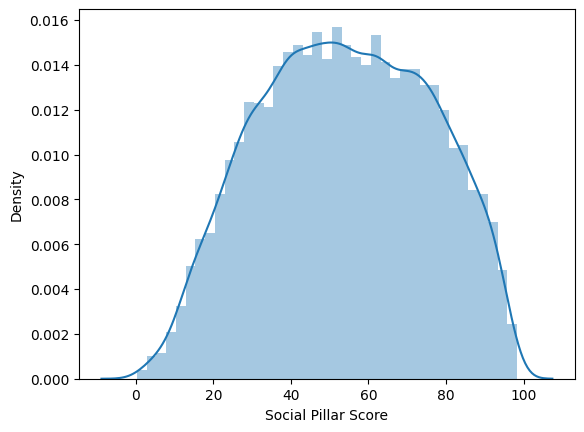

Environmental Pillar Score


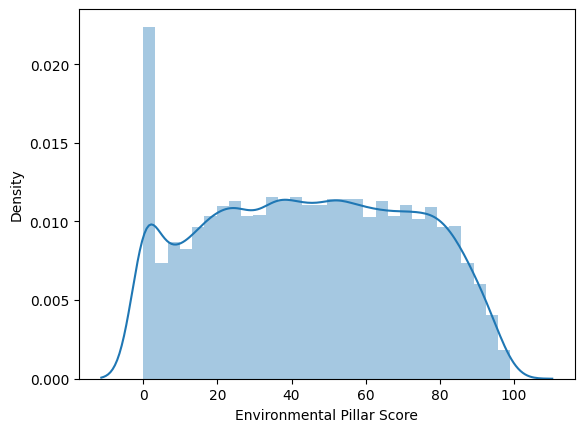

YTD Total Return FY


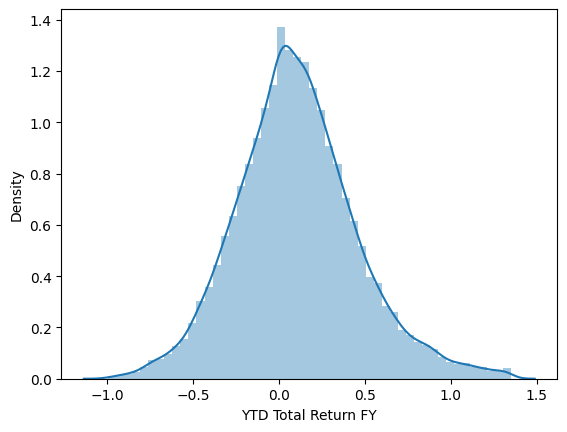

Resource Use Score


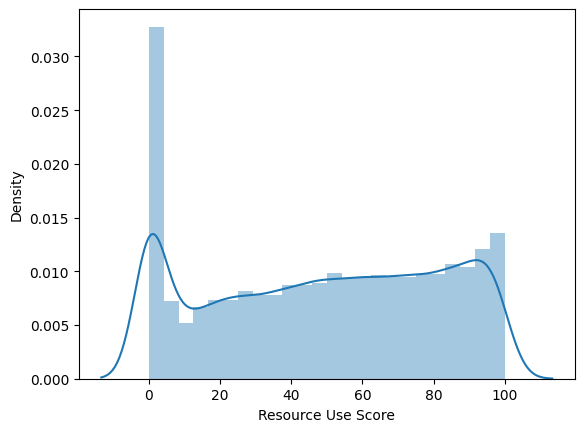

Emissions Score


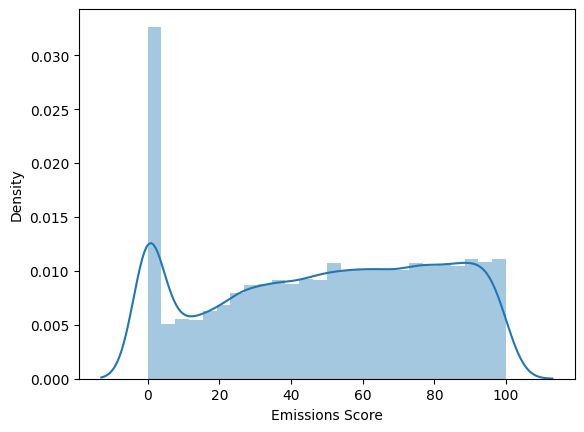

YTD Total Return D


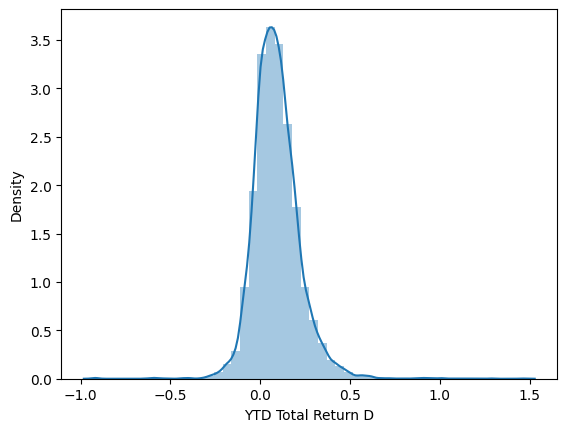

Workforce Score


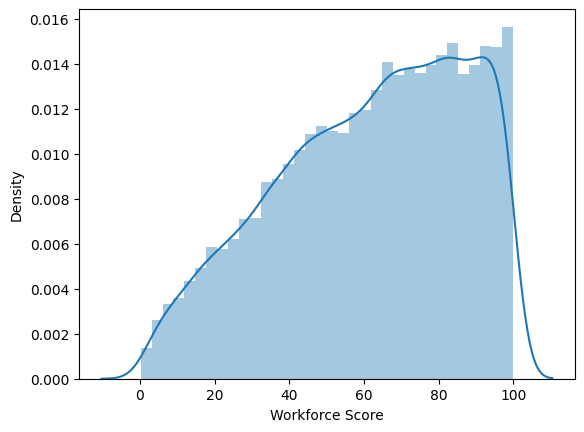

Product Responsibility Score


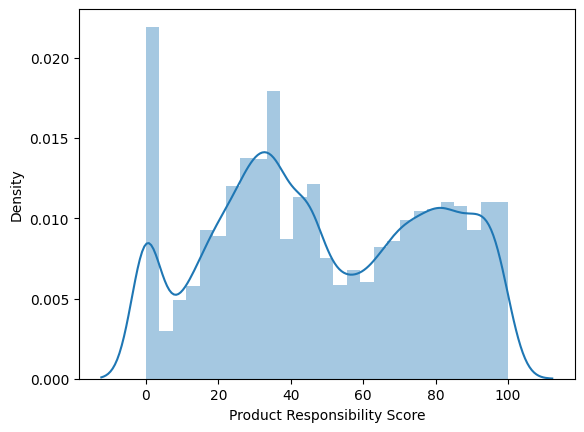

Shareholders Score


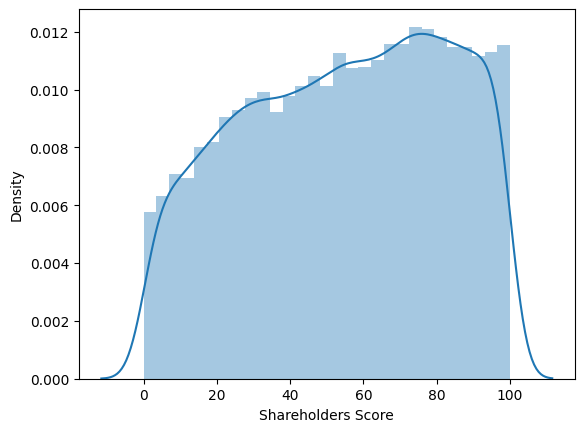

CSR Strategy Score


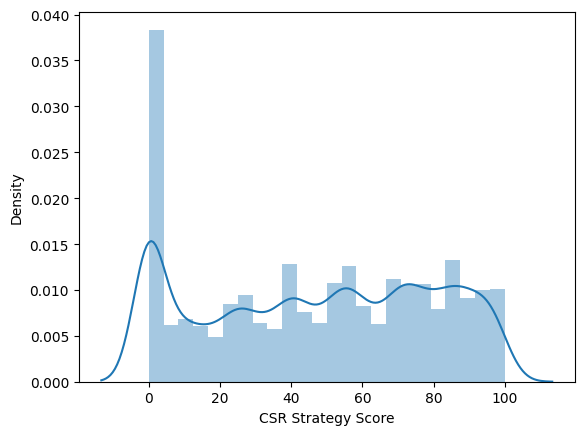

Country


ValueError: could not convert string to float: 'Germany'

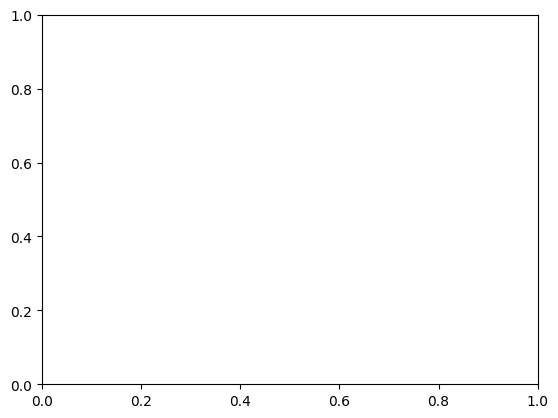

In [ ]:
#get the histplot of every column
for col in df_data_clean_1.columns:
    if col != "Company Name":
        print(col)
        sns.distplot(df_data_clean_1[col])
        plt.show()

In [ ]:
#multiply every value that is smaller than 1 with 100
for col in df_data_clean_1.columns:
    if col != "Company Name" and col != "Period" and col != "Country" and col != "ESG Score Quantile" and col != "YTD Total Return FY":
        df_data_clean_1[col] = df_data_clean_1[col].apply(lambda x: x*100 if x < 1 else x)

In [ ]:
df_data_clean_1

Company Name  Period  Environmental Innovation Score  ESG Score  \
0               1&1 AG     1.0                       11.009174  60.362673   
2775            1&1 AG     2.0                       11.111111  41.772272   
5550            1&1 AG     3.0                       12.376238  34.325577   
8325            1&1 AG     4.0                       13.297872  38.167510   
11100           1&1 AG     5.0                       14.606742  24.227235   
...                ...     ...                             ...        ...   
16363  thyssenkrupp AG     6.0                       50.000000  74.590251   
19138  thyssenkrupp AG     7.0                       50.000000  76.571187   
21913  thyssenkrupp AG     8.0                       50.000000  69.689746   
24688  thyssenkrupp AG     9.0                       51.250000  63.667817   
27463  thyssenkrupp AG    10.0                       51.219512  65.197474   

       Human Rights Score  Community Score  Management Score  \
0               41.304348        41.062802         68.995098   
2775            31.164384         3.886010         42.530488   
5550            21.755725        55.865922         33.589744   
8325            21.551724        58.479532         40.988372   
11100            0.000000        91.463415         10.267857   
...                   ...              ...               ...   
16363           81.250000        53.833333         37.765957   
19138           83.206107        57.374101         42.307692   
21913           80.603448        34.629630         38.505747   
24688           83.474576        28.339350         12.500000   
27463           85.398230        44.306050         12.352941   

       Governance Pillar Score  Social Pillar Score  \
0                    61.434942            63.265573   
2775                 39.766726            40.741167   
5550                 24.898093            37.017367   
8325                 29.551680            39.069083   
11100                 8.350857            23.344323   
...                        ...                  ...   
16363                55.248227            75.743903   
19138                58.895071            74.992038   
21913                45.226261            65.586501   
24688                31.208415            67.205045   
27463                21.383007            72.058578   

       Environmental Pillar Score  YTD Total Return FY  Resource Use Score  \
0                       39.727781            -0.515792           48.870056   
2775                    40.573744             0.177391           50.914634   
5550                    35.124143            -0.104690           52.040816   
8325                    41.530184            -0.484957           70.740741   
11100                   45.575620            -0.336353           72.314050   
...                           ...                  ...                 ...   
16363                   77.775657             0.076403           71.086957   
19138                   81.403363             0.247496           76.620370   
21913                   83.240006            -0.133171           78.125000   
24688                   75.020081             0.201809           62.676056   
27463                   80.427554            -0.003941           68.750000   

       Emissions Score  YTD Total Return D  Workforce Score  \
0            55.714286            6.810345        64.492754   
2775         56.012658            6.810345        46.891192   
5550         38.111888            5.517241        41.061453   
8325         37.022901            5.344828        48.245614   
11100        45.934959            5.603448        20.426829   
...                ...                 ...              ...   
16363        90.663900           26.284402        78.500000   
19138        93.049327           25.065649        77.158273   
21913        95.622120           25.065649        83.333333   
24688        93.018018           25.065649        88.162544   
27463        98.868778   

Period


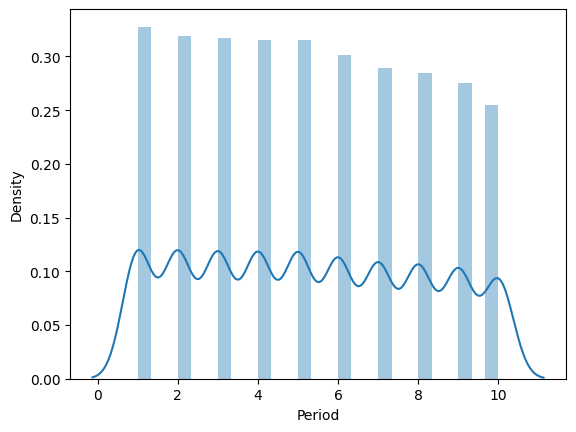

Environmental Innovation Score


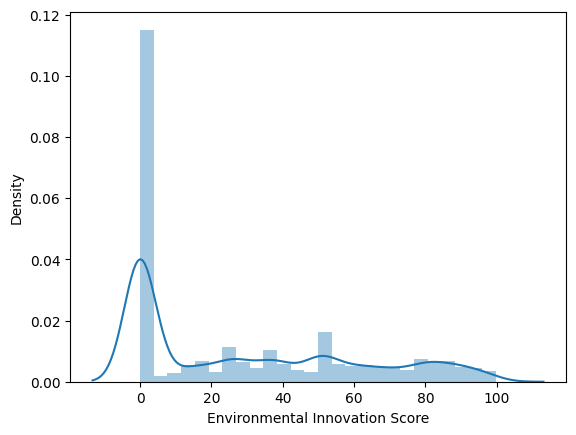

ESG Score


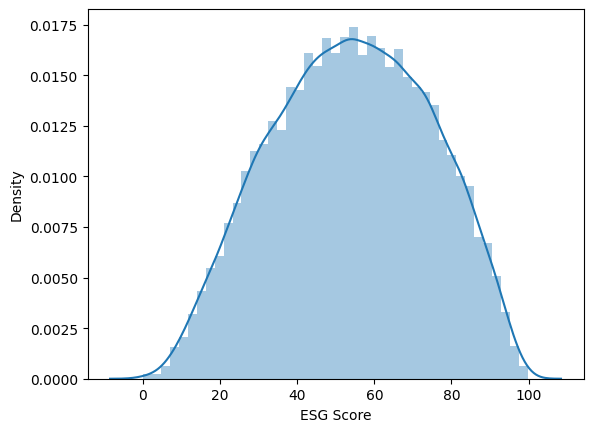

Human Rights Score


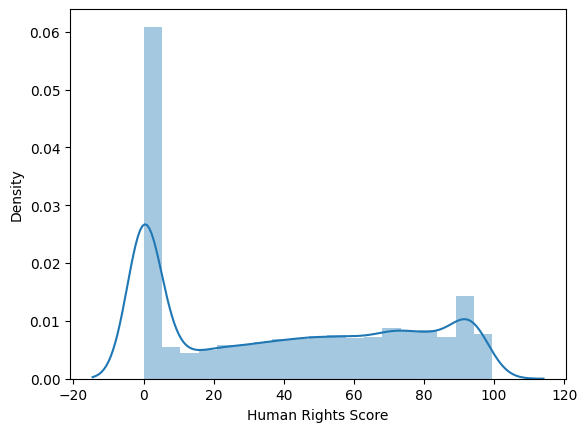

Community Score


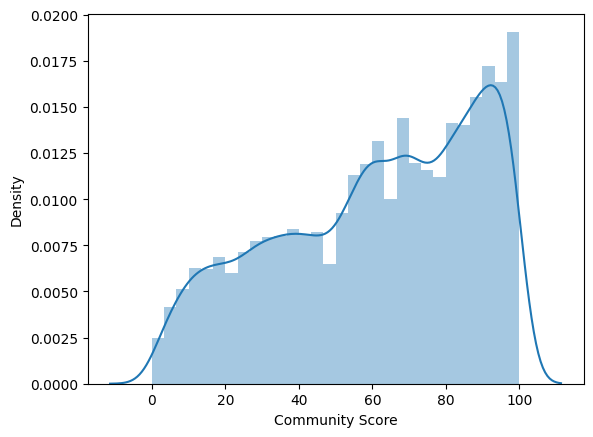

Management Score


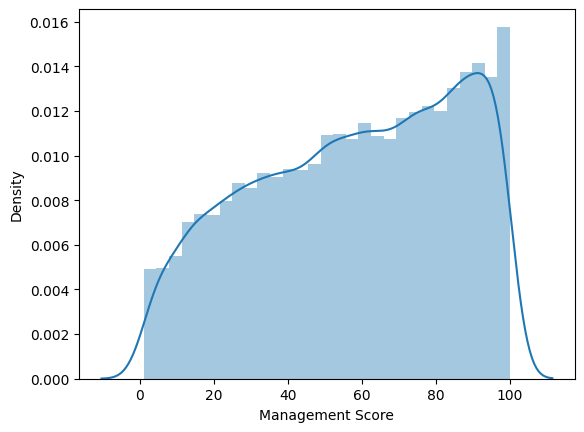

Governance Pillar Score


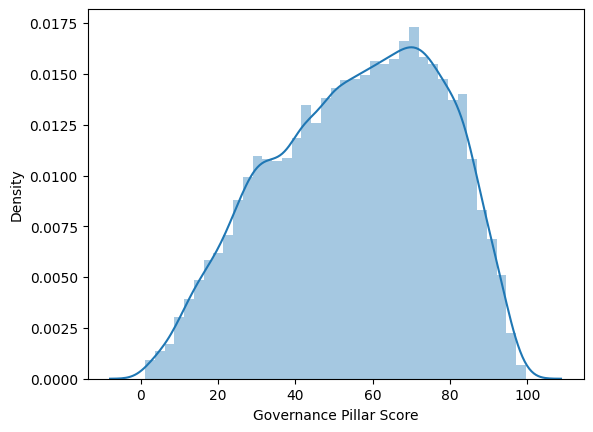

Social Pillar Score


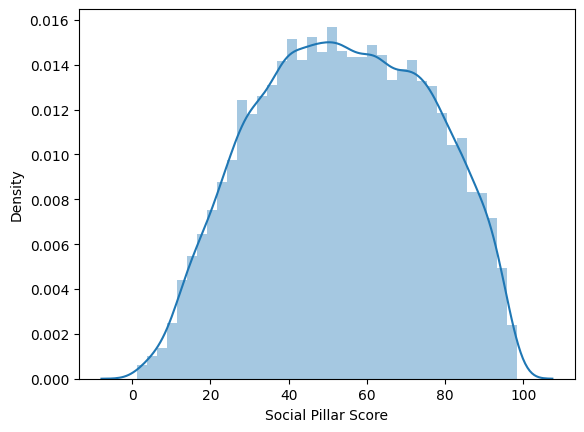

Environmental Pillar Score


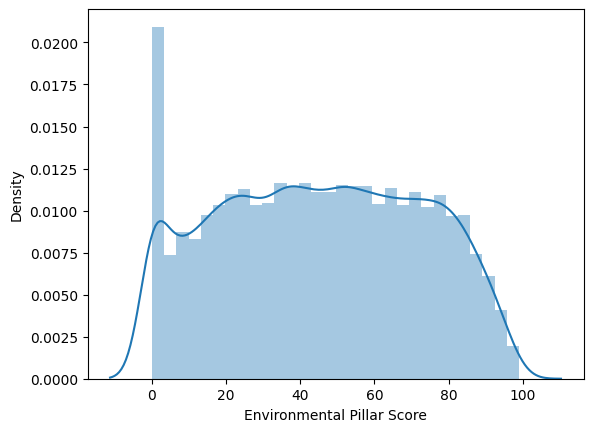

YTD Total Return FY


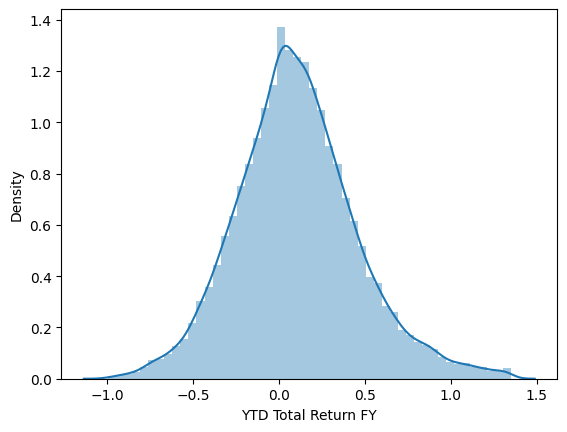

Resource Use Score


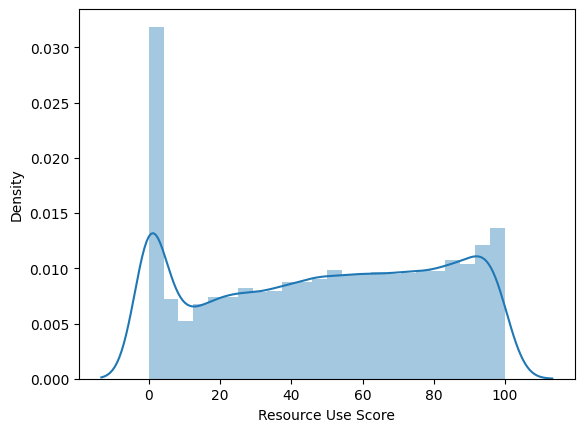

Emissions Score


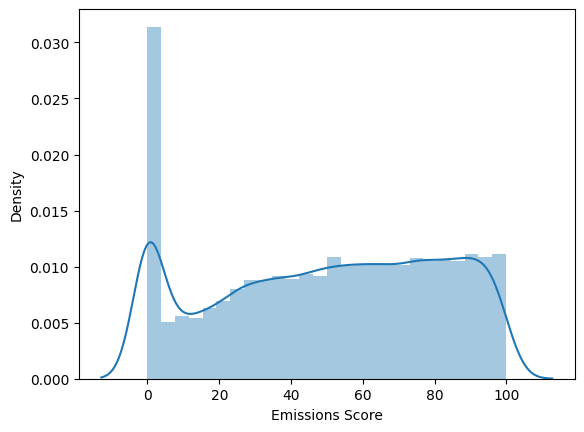

YTD Total Return D


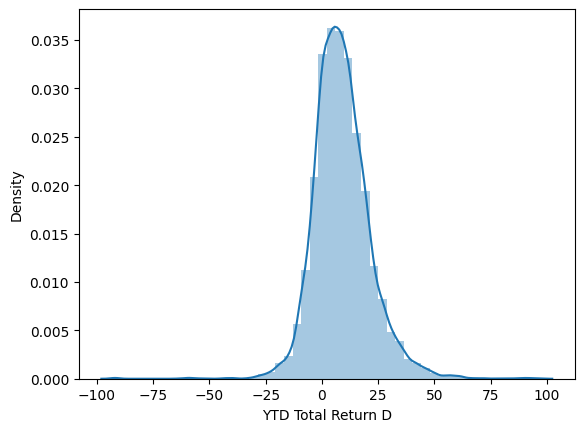

Workforce Score


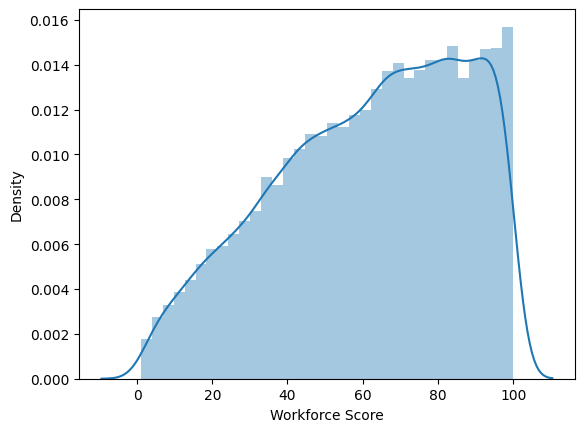

Product Responsibility Score


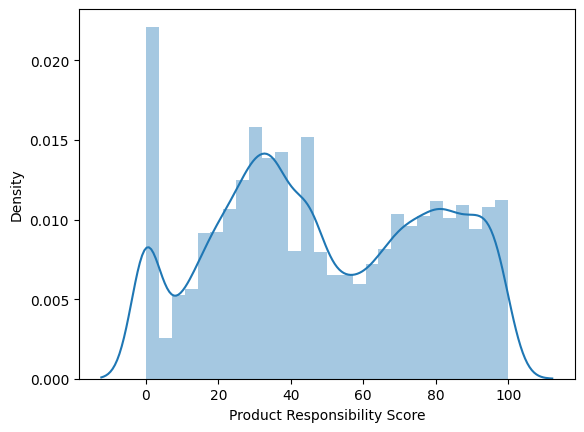

Shareholders Score


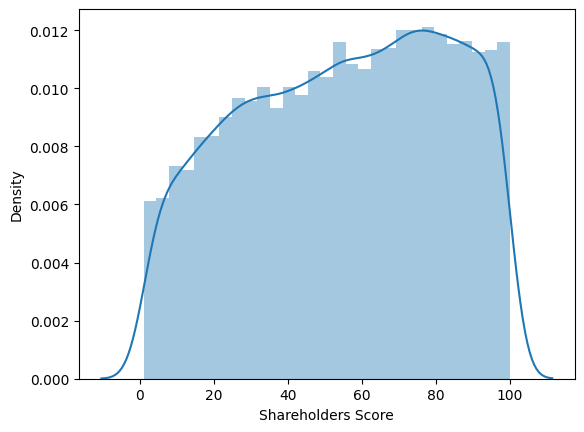

CSR Strategy Score


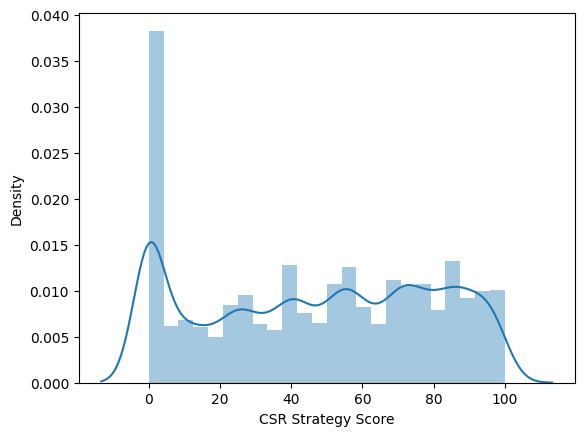

Country


ValueError: could not convert string to float: 'Germany'

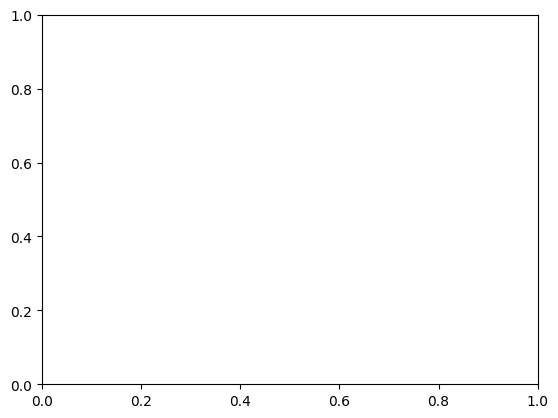

In [ ]:
#get the histplot of every column
for col in df_data_clean_1.columns:
    if col != "Company Name":
        print(col)
        sns.distplot(df_data_clean_1[col])
        plt.show()

In [ ]:
#calculate the correlation for every country, but to not include values below 10 for the columns
df_data_clean_1_1 = df_data_clean_1.copy()
for col in df_data_clean_1_1.columns:
    if col != "Company Name" and col != "Period" and col != "Country" and col != "ESG Score Quantile" and col != "YTD Total Return FY":
        df_data_clean_1_1 = df_data_clean_1_1[df_data_clean_1_1[col] > 10]
    
df_corr_country = df_data_clean_1_1.groupby("Country").apply(compute_correlations)
df_corr_country


YTD Total Return FY         Period  Environmental Innovation Score  ESG Score  \
Country                                                                         
Australia                 0.363073                        0.015566   0.117843   
Austria                   0.302374                        0.212310   0.013802   
Belgium                   0.352078                        0.113154  -0.037331   
Bermuda                   0.006388                        0.516385  -0.513194   
Canada                    0.080277                       -0.027456   0.150234   
Denmark                   0.086538                       -0.154396  -0.032273   
Finland                  -0.003663                        0.002741   0.281174   
France                    0.107578                        0.047384  -0.050965   
Germany                   0.241508                        0.110088   0.023049   
Greece                   -0.555335                       -0.077023   0.048637   
Guernsey                       NaN                             NaN        NaN   
Iceland                   1.000000                        1.000000   1.000000   
Ireland; Republic of      0.298742                        0.194534   0.078716   
Isle of Man               1.000000                        1.000000   1.000000   
Italy                     0.056116                       -0.118639  -0.195136   
Jersey                    0.397492                        0.181322  -0.065131   
Liechtenstein            -1.000000                        1.000000   1.000000   
Luxembourg               -0.252478                       -0.177656  -0.427928   
Netherlands               0.115755                        0.031182   0.058753   
New Zealand               0.686765                       -0.133148   0.056861   
Norway                    0.129246                        0.030968   0.029549   
Portugal                  1.000000                       -1.000000   1.000000   
Spain                     0.173234                        0.000658  -0.085903   
Sweden                    0.227245                        0.030331   0.064166   
Switzerland               0.303890                        0.051508   0.045199   
United Kingdom            0.204365                       -0.042704  -0.080195   
United States of America  0.223195                       -0.001376  -0.008385   

YTD Total Return FY       Human Rights Score  Community Score  \
Country                                                         
Australia                           0.011810         0.057703   
Austria                            -0.164160        -0.048978   
Belgium                             0.012417         0.044232   
Bermuda                            -0.374232         0.605268   
Canada                             -0.069849         0.111940   
Denmark                             0.212162         0.123012   
Finland                             0.164992         0.342446   
France                              0.082390         0.033590   
Germany                             0.070255         0.010294   
Greece                              0.037204         0.373376   
Guernsey                                 NaN              NaN   
Iceland                             1.000000         1.000000   
Ireland; Republic of                0.140215         0.002608   
Isle of Man                        -1.000000         1.000000   
Italy                              -0.259100        -0.087949   
Jersey                              0.116552         0.065733   
Liechtenstein                      -1.000000         1.000000   
Luxembourg                         -0.568142        -0.577929   
Netherlands                         0.107984        -0.031639   
New Zealand                         0.332337        -0.091169   
Norway                             -0.064340        -0.012802   
Portugal                            1.000000         1.000000   
Spain                               0.024614        -0.040435   
Sweden                   

In [ ]:
#get the correlation for every period
df_corr_periods = pd.DataFrame(columns=df_data_clean_1.columns)
for period in df_data_clean_1_1["Period"].unique():
    df_corr_periods.loc[period] = df_data_clean_1_1[df_data_clean_1_1["Period"] == period].corr()["YTD Total Return FY"]
df_corr_periods
#plot the correlation for every column over the periods

Company Name  Period  Environmental Innovation Score  ESG Score  \
1.0            NaN     NaN                        0.063525   0.171424   
2.0            NaN     NaN                        0.058396  -0.024376   
3.0            NaN     NaN                       -0.112038  -0.172264   
4.0            NaN     NaN                        0.043521  -0.031006   
5.0            NaN     NaN                       -0.045479  -0.000441   
6.0            NaN     NaN                        0.021853  -0.032603   
7.0            NaN     NaN                       -0.040287  -0.031777   
8.0            NaN     NaN                       -0.015590  -0.026345   
9.0            NaN     NaN                       -0.095725   0.024977   
10.0           NaN     NaN                        0.096861  -0.054732   

      Human Rights Score  Community Score  Management Score  \
1.0             0.136939         0.117414          0.045993   
2.0            -0.014063         0.059086         -0.077086   
3.0            -0.051316         0.023530         -0.063535   
4.0            -0.040648        -0.022945          0.035589   
5.0             0.023260         0.053905         -0.051041   
6.0            -0.130625         0.014626          0.026913   
7.0            -0.165657         0.053642          0.119918   
8.0            -0.068894        -0.016592         -0.082981   
9.0             0.144855         0.085952         -0.126433   
10.0           -0.046702         0.098953         -0.088703   

      Governance Pillar Score  Social Pillar Score  \
1.0                  0.051933             0.170858   
2.0                 -0.072192            -0.010306   
3.0                 -0.076674            -0.107208   
4.0                  0.011085            -0.050810   
5.0                 -0.074899             0.048348   
6.0                  0.035306            -0.105653   
7.0                  0.149596            -0.145749   
8.0                 -0.057271            -0.003698   
9.0                 -0.082048             0.176276   
10.0                -0.063466            -0.049655   

      Environmental Pillar Score  YTD Total Return FY  Resource Use Score  \
1.0                     0.170465                  1.0            0.160289   
2.0                     0.042233                  1.0           -0.009275   
3.0                    -0.200113                  1.0           -0.155731   
4.0                    -0.012562                  1.0            0.021205   
5.0                    -0.021974                  1.0           -0.035094   
6.0                    -0.041374                  1.0           -0.029889   
7.0                    -0.120306                  1.0           -0.083631   
8.0                    -0.016108                  1.0            0.032454   
9.0                     0.012796                  1.0            0.031642   
10.0                   -0.021539                  1.0           -0.073001   

      Emissions Score  YTD Total Return D  Workforce Score  \
1.0          0.125389           -0.157473         0.053160   
2.0          0.031173           -0.162700        -0.028902   
3.0         -0.132120            0.005500        -0.183842   
4.0         -0.004724           -0.071100         0.039448   
5.0          0.100151           -0.274456         0.042476   
6.0          0.027721           -0.189342        -0.010418   
7.0         -0.113847           -0.241581        -0.132617   
8.0          0.074634           -0.183144         0.074755   
9.0          0.077259           -0.135177         0.216999   
10.0         0.025232           -0.129178        -0.042868   

      Product Responsibility Score  Shareholders Score  CSR Strategy Score  \
1.0                       0.116599           -0.000327            0.088122   
2.0                      -0.051816           -0.020662            0.002112   
3.0                      -0.057009            0.003926           -0.118143   
4.0                       0.013319           -0.070285           -0.02

In [ ]:
#get the correlation for every company
df_corr_company = pd.DataFrame(columns=df_data_clean_1_1.columns)
for company in df_data_clean_1_1["Company Name"].unique():
    #if less than 5 values are available, than skip
    if df_data_clean_1_1[df_data_clean_1_1["Company Name"] == company].shape[0] < 5:
        continue
    df_corr_company.loc[company] = df_data_clean_1_1[df_data_clean_1_1["Company Name"] == company].corr()["YTD Total Return FY"]
df_corr_company


Company Name    Period  \
3i Group PLC                        NaN  0.234157   
ABM Industries Inc                  NaN -0.467222   
ASM International NV                NaN -0.166596   
ASOS PLC                            NaN  0.476007   
Abrdn PLC                           NaN  0.301789   
...                                 ...       ...   
Westport Fuel Systems Inc           NaN -0.239159   
Williams-Sonoma Inc                 NaN  0.121101   
Xerox Holdings Corp                 NaN  0.465032   
Zalando SE                          NaN  0.220999   
thyssenkrupp AG                     NaN  0.473724   

                           Environmental Innovation Score  ESG Score  \
3i Group PLC                                     0.173256  -0.170191   
ABM Industries Inc                               0.090479   0.119702   
ASM International NV                             0.451046  -0.509571   
ASOS PLC                                        -0.052848   0.347624   
Abrdn PLC                                       -0.286795   0.058862   
...                                                   ...        ...   
Westport Fuel Systems Inc                       -0.425332  -0.318148   
Williams-Sonoma Inc                             -0.135865  -0.448303   
Xerox Holdings Corp                              0.104277   0.222748   
Zalando SE                                       0.294978   0.180642   
thyssenkrupp AG                                  0.434571  -0.221767   

                           Human Rights Score  Community Score  \
3i Group PLC                         0.191241         0.314070   
ABM Industries Inc                   0.034041         0.212989   
ASM International NV                -0.238380         0.168677   
ASOS PLC                             0.068154         0.544421   
Abrdn PLC                           -0.582147        -0.478384   
...                                       ...              ...   
Westport Fuel Systems Inc            0.824533        -0.344589   
Williams-Sonoma Inc                 -0.187324         0.096702   
Xerox Holdings Corp                 -0.387924        -0.367083   
Zalando SE                           0.464652        -0.345392   
thyssenkrupp AG                      0.036935        -0.284489   

                           Management Score  Governance Pillar Score  \
3i Group PLC                      -0.277191                -0.268579   
ABM Industries Inc                -0.253004                -0.311437   
ASM International NV              -0.705902                -0.588626   
ASOS PLC                          -0.299242                -0.413756   
Abrdn PLC                          0.544988                 0.375357   
...                                     ...                      ...   
Westport Fuel Systems Inc         -0.702064                -0.432291   
Williams-Sonoma Inc               -0.691617                -0.825464   
Xerox Holdings Corp                0.415064                 0.391370   
Zalando SE                         0.006024                -0.070106   
thyssenkrupp AG                   -0.318331                -0.288809   

                           Social Pillar Score  Environmental Pillar Score  \
3i Group PLC                          0.417385                   -0.621635   
ABM Industries Inc                    0.107999                    0.308397   
ASM International NV                 -0.355220                    0.124608   
ASOS PLC                             -0.011378                    0.702391   
Abrdn PLC                            -0.497371                   -0.202363   
...                                        ...                         ...   
Westport Fuel Systems Inc             0.598561                   -0.718711   
Williams-Sonoma Inc                  -0.014036                    0.035961   
Xerox Holdings Corp                  -0.275552                    0.066456   
Zalando SE                            0.546581                    0.030752   
thyssenkr

In [ ]:
df_corr_company.shape

(242, 20)

Period
mean:  0.18096841513936932
median:  0.22343613510109972


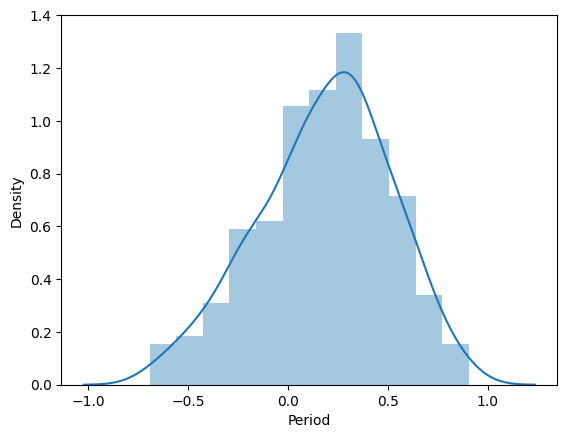

Environmental Innovation Score
mean:  0.004857784649240583
median:  0.060155637475752734


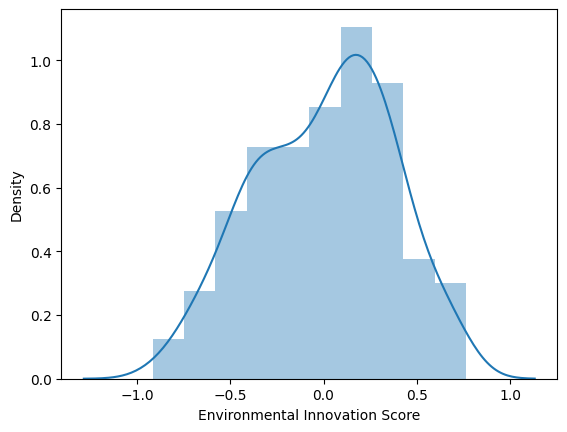

ESG Score
mean:  -0.10316372492147524
median:  -0.09740923108542732


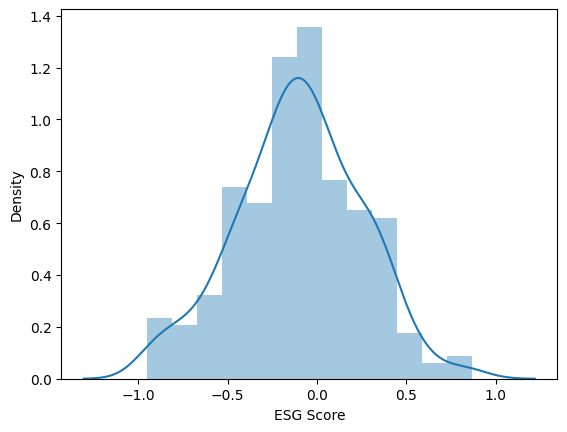

Human Rights Score
mean:  -0.04970831986284907
median:  -0.07343181994770634


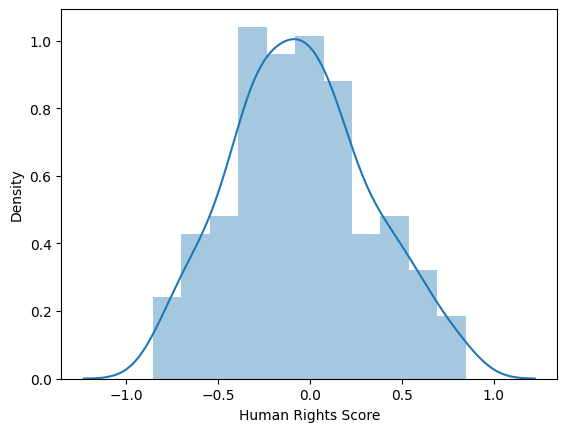

Community Score
mean:  -0.056915083953470086
median:  -0.09104778927918758


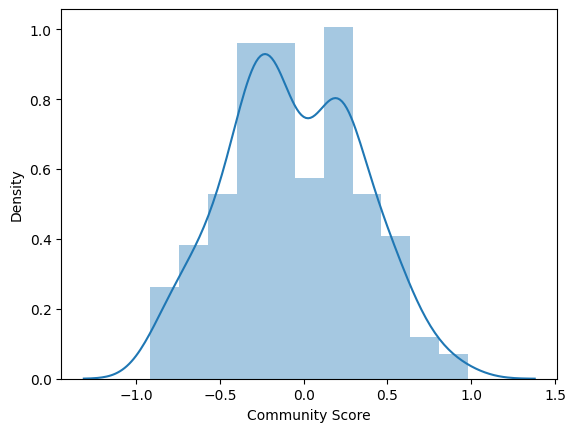

Management Score
mean:  -0.03586392640392587
median:  -0.04248949904165768


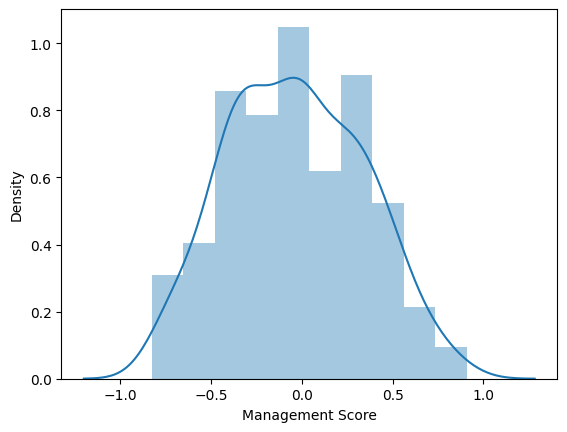

Governance Pillar Score
mean:  -0.05626425986772319
median:  -0.0678810203610878


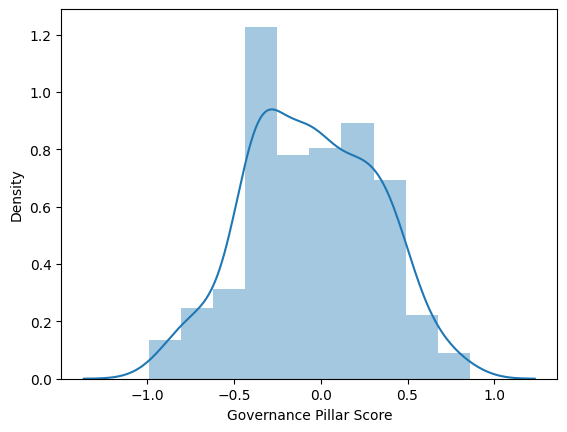

Social Pillar Score
mean:  -0.08875932822893562
median:  -0.0921569015585432


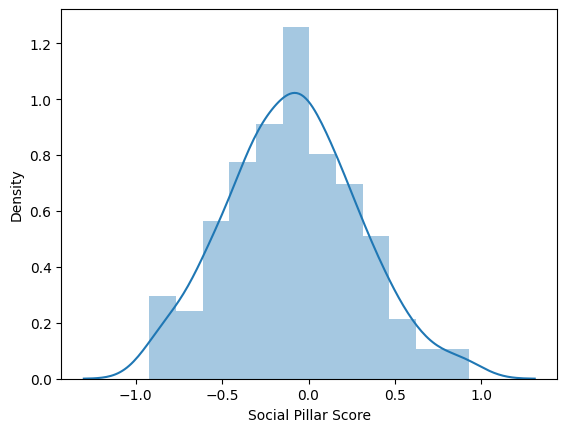

Environmental Pillar Score
mean:  -0.09902181613793996
median:  -0.11392077779196227


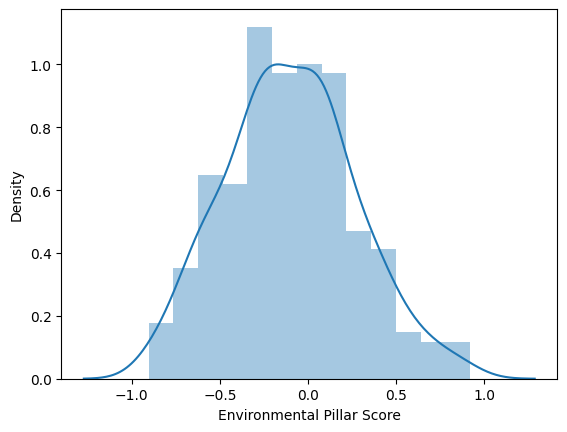

YTD Total Return FY
mean:  1.0
median:  1.0


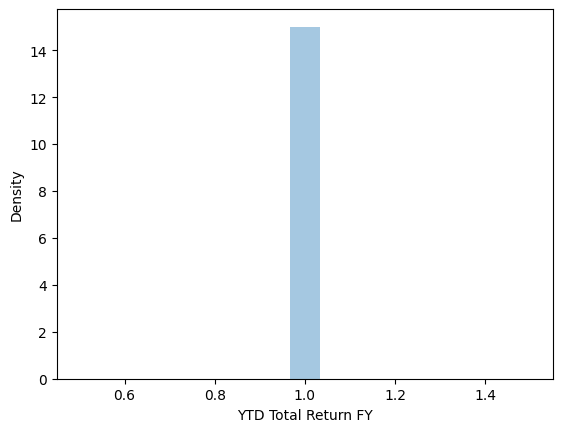

Resource Use Score
mean:  -0.05706816460501441
median:  -0.10592171392679324


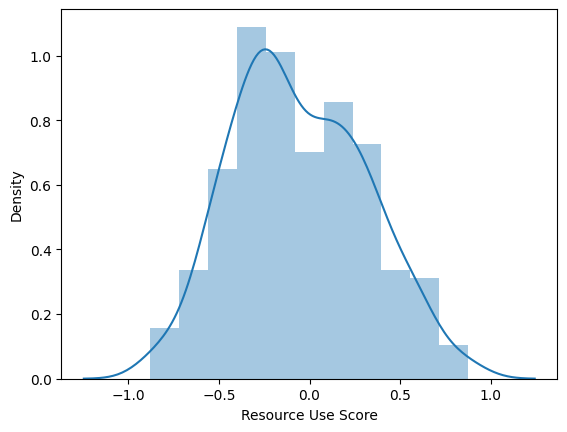

Emissions Score
mean:  -0.07842478410811247
median:  -0.11169690226905002


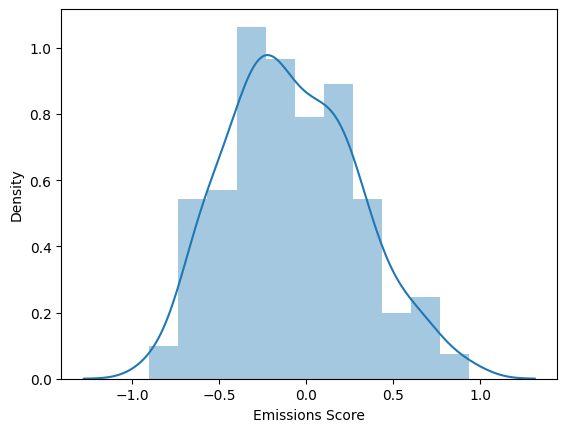

YTD Total Return D
mean:  0.0779302451268332
median:  0.0949324607069899


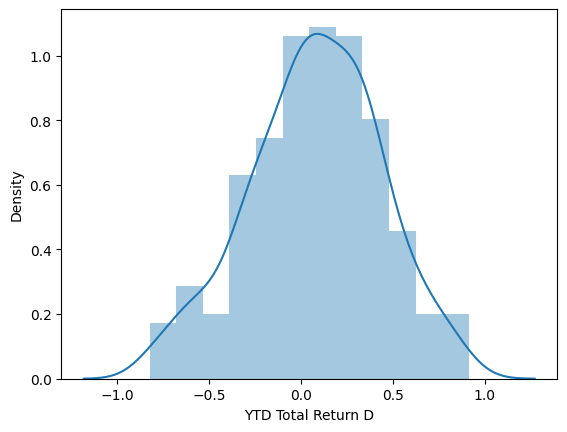

Workforce Score
mean:  -0.04940051021469163
median:  -0.07947224909754108


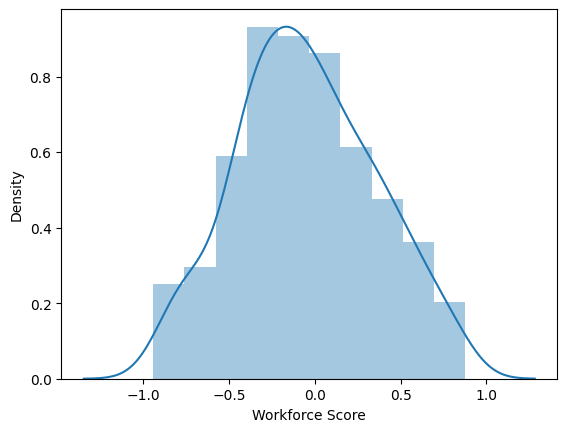

Product Responsibility Score
mean:  -0.05260504080736637
median:  -0.0814373010045849


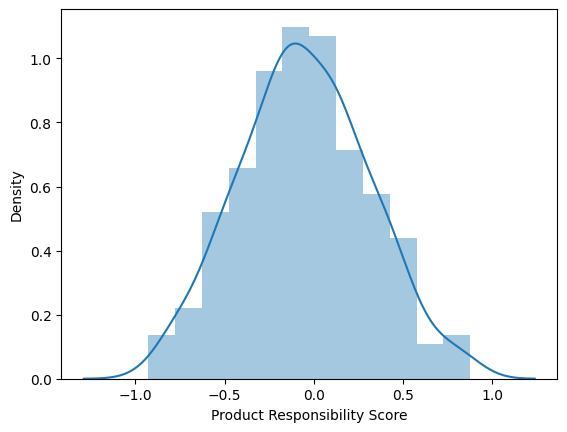

Shareholders Score
mean:  -0.07321323303026535
median:  -0.07491330678477051


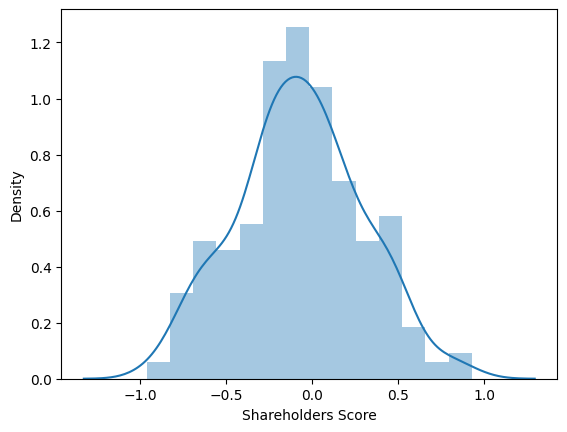

CSR Strategy Score
mean:  -0.07121067889874523
median:  -0.12204080720558286


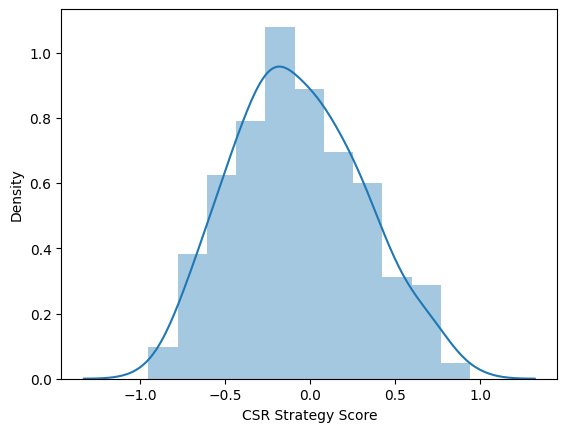

Country
mean:  nan
median:  nan


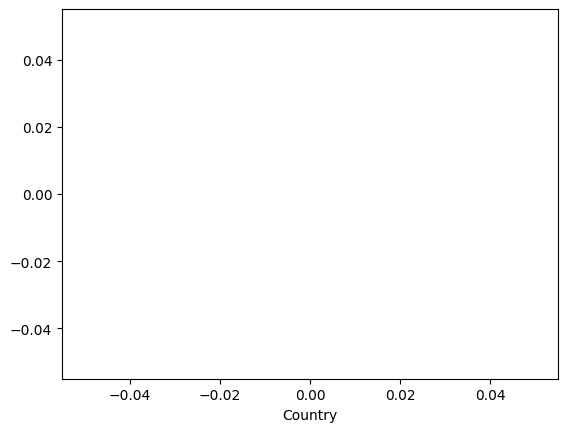

ESG Score Quantile
mean:  -0.10602251872211937
median:  -0.12417127696705464


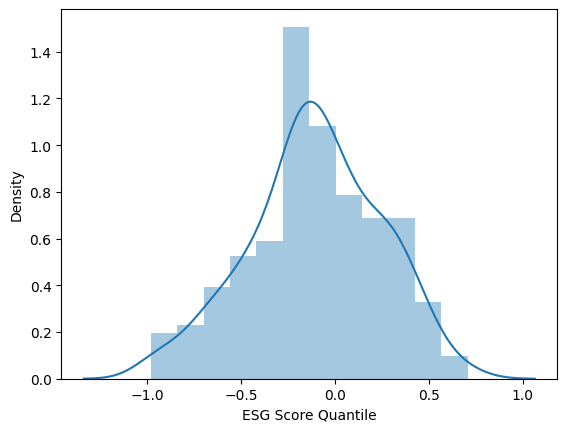

In [ ]:
#distribution of the correlation for every column
for col in df_corr_company.columns:
    if col != "Company Name":
        #print mean and median
        print(col)
        print("mean: ", df_corr_company[col].mean())
        print("median: ", df_corr_company[col].median())
        sns.distplot(df_corr_company[col])
        plt.show()
        


<AxesSubplot: xlabel='ESG Score Quantile', ylabel='YTD Total Return FY'>

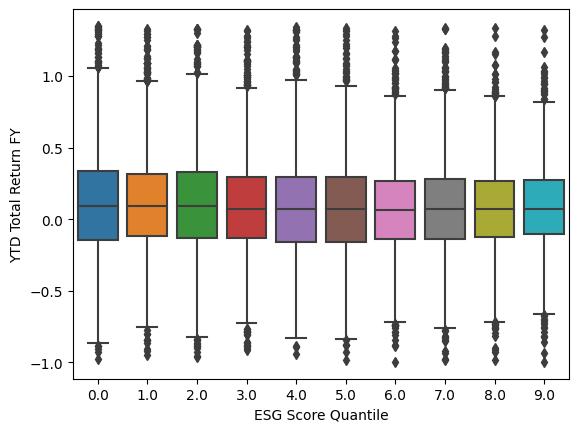

In [ ]:
#split the data in ten quantiles based on the ESG Score 
#than pake for every quantile a boxplot of the YTD Total Return FY 
df_data_clean_1["ESG Score Quantile"] = pd.qcut(df_data_clean_1["ESG Score"], 10, labels=False)
sns.boxplot(x="ESG Score Quantile", y="YTD Total Return FY", data=df_data_clean_1)